In [1]:
.libPaths('/gpfs/projects/datascience/shared/R/Data4ML')

# Unsupervised ML

Two broad categories dimetionality reduction and clustering we will explore some of these concepts with our normal penguins dataset.

In [2]:
?penguins

No documentation for 'penguins' in specified packages and libraries:
you could try '??penguins'

In [3]:
library('Rtsne')
library('uwot')
library(palmerpenguins)



Loading required package: Matrix



# Dimensionality reduction

**Why do you want to do it?**
* Too many variables to easily analyze
* Too many variables to easily plot

**What are we doing** 
We want to take our data set with too many variables and create a new representation of that data that only uses a few variables. 
Unlike supervised learning there is no **true** answer for what counts as a good representation of our data. What are some of the things we might want to caputure
* Keep information that is **important**
* Maintain distances between data points, so points that are close together in high dimensions are also close together in low dimensions
* Useful if our representations if variables are indepedent of each other

There are a few common ways to do this are

1. PCA - Creates well defined linear representations orded by importance, where importance is defined as how much of the datasets variance can be explained. 
    * This method gives you vectors in order of importance, but what if you want to put a much information into a specific number of dimentions 2 or 3 numbers 
2. TSNE - non-linear method that is very common 
3. UMAP - non-linear method that is a bit faster than TSNE






# Writing a Plot Function 

**Suggestion** If you have to do it more than twice automate it!

You've used functions through-out the workshop. You can save yourself a lot of time by writing your own.

Syntax:
```R
my_function<-function(argument1,argument2){ # open bracket starts the function
# Your code to do something
print(argument1) 
print(argument2)

} #Close bracket finishes the function
```


In [4]:
#This code creates your function
my_function<-function(argument1,argument2){ # open bracket starts the function
print(argument1) 
print(argument2)
} 

In [5]:
#This code runs your function

my_function('Hello','World')

my_function('hello','world')



[1] "Hello"
[1] "World"
[1] "hello"
[1] "world"


# Exercise write a function to print the sum of two numbers

In [6]:
"Solution"
my_function<-function(argument1,argument2){ # open bracket starts the function
print(argument1+argument2)
      }

my_function(1,2)
my_function(2,3)


[1] "Solution"

[1] 3
[1] 5


In [7]:
# Make our plots fit better in Jupyter
options(repr.plot.width=20,repr.plot.height=10)

#Get Clean data
penguins_clean<-na.omit(penguins)

#Use only numeric features for tests
train_data<-penguins_clean[,c('bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g')]


penguins_clean$flipper_length_mm


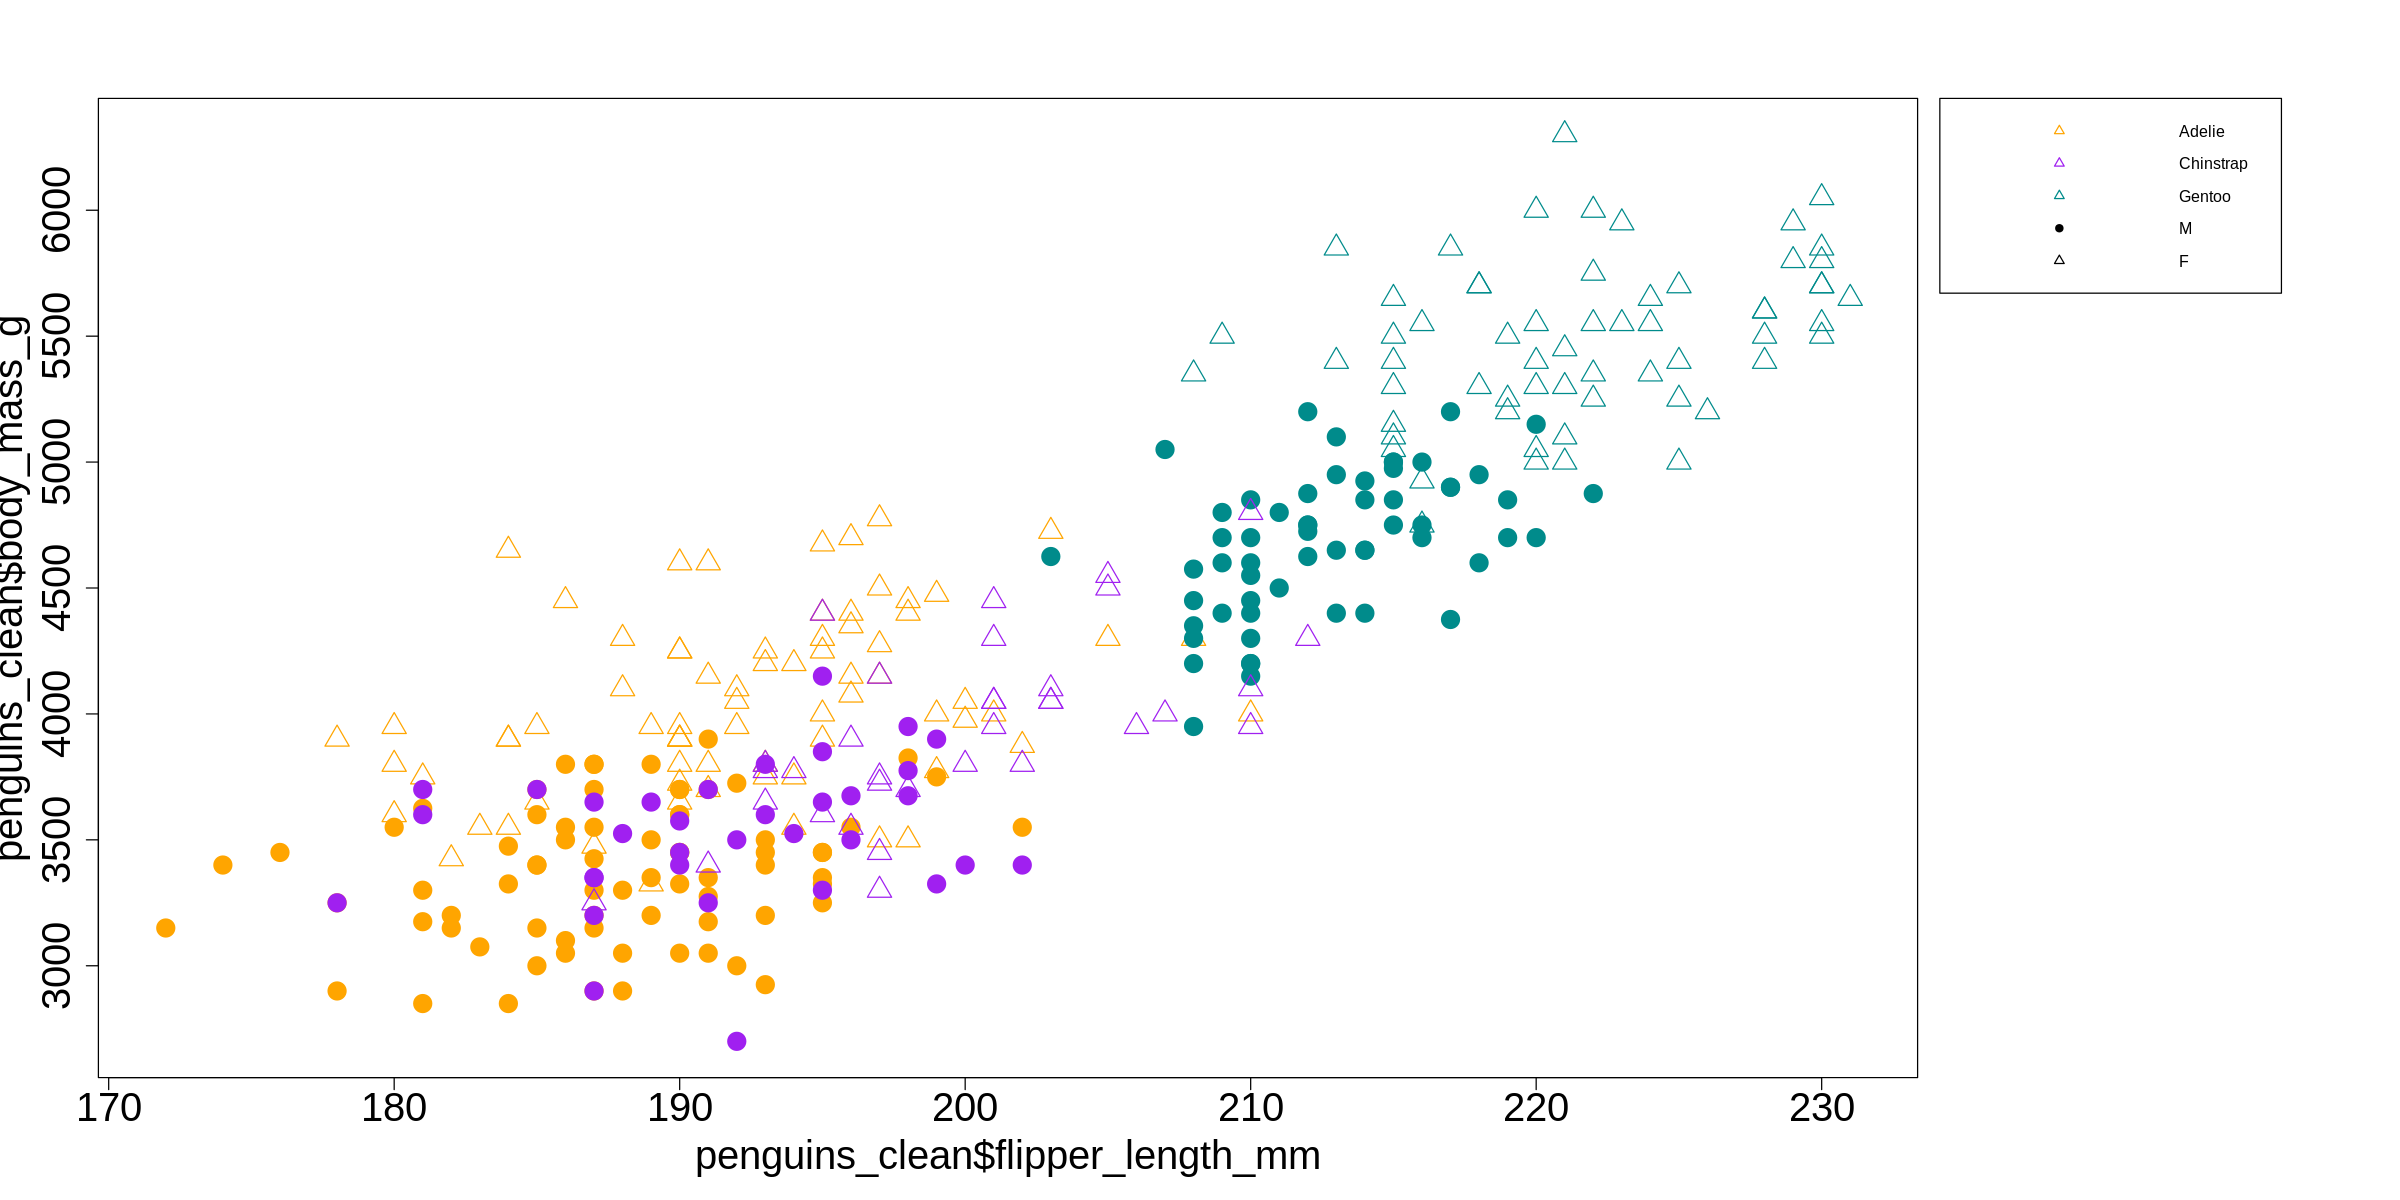

In [8]:


plot_penguins <- function(x,y,z=NULL) {
print(substitute(x))
#Color points by species
if(is.null(z)){
    z= penguins_clean$species
    legend= c("Adelie", "Chinstrap", "Gentoo","M","F")
    }
else{
    legend=c(1:max(as.numeric(z)),"M","F")
    print(legend)
    }
#Select shape by sex
sh_label=penguins_clean$sex
#Set color choices
colors<-c(c("orange", "purple", "darkcyan"),sample(colors()))
shapes<-c(19,2)
#Plot
par(mar=c(5.1,4.1,4.1,20.1),xpd=TRUE)

plot(x,y,col=colors[factor(z)],
        xlab=deparse(substitute(x)),
       ylab=deparse(substitute(y)), 
     pch=shapes[factor(sh_label)],cex=2,cex.axis=2,cex.lab=2)

#add legend
legend("topright",inset=c(-0.2,0.0), legend = legend,      
       pch = c(rep(shapes[2],length(legend)-2),shapes),
               col = c(colors[1:(length(legend)-2)],c('black','black')),cex=0.8,text.width=1.5)
    
#p<-ggplot(data = penguins_clean,aes(x = x,y = y, color=species,shape=sex)) +
#                      geom_point(aes(color=bill_depth_mm))    
#print(p)   
}



#plot_penguins(penguins_clean$flipper_length_mm,penguins_clean$body_mass_g)
plot_penguins(penguins_clean$flipper_length_mm,penguins_clean$body_mass_g)



# Principal Component Analysis 

Run PCA and make a Scree Plot. A scree plot is just the amount of varience explained by each PC. Your looking for a Knee to decided how many vectors to keep.

![example scree](https://miro.medium.com/max/1210/1*Nx8nLPdHmAtgWopOLa76Bg.png)



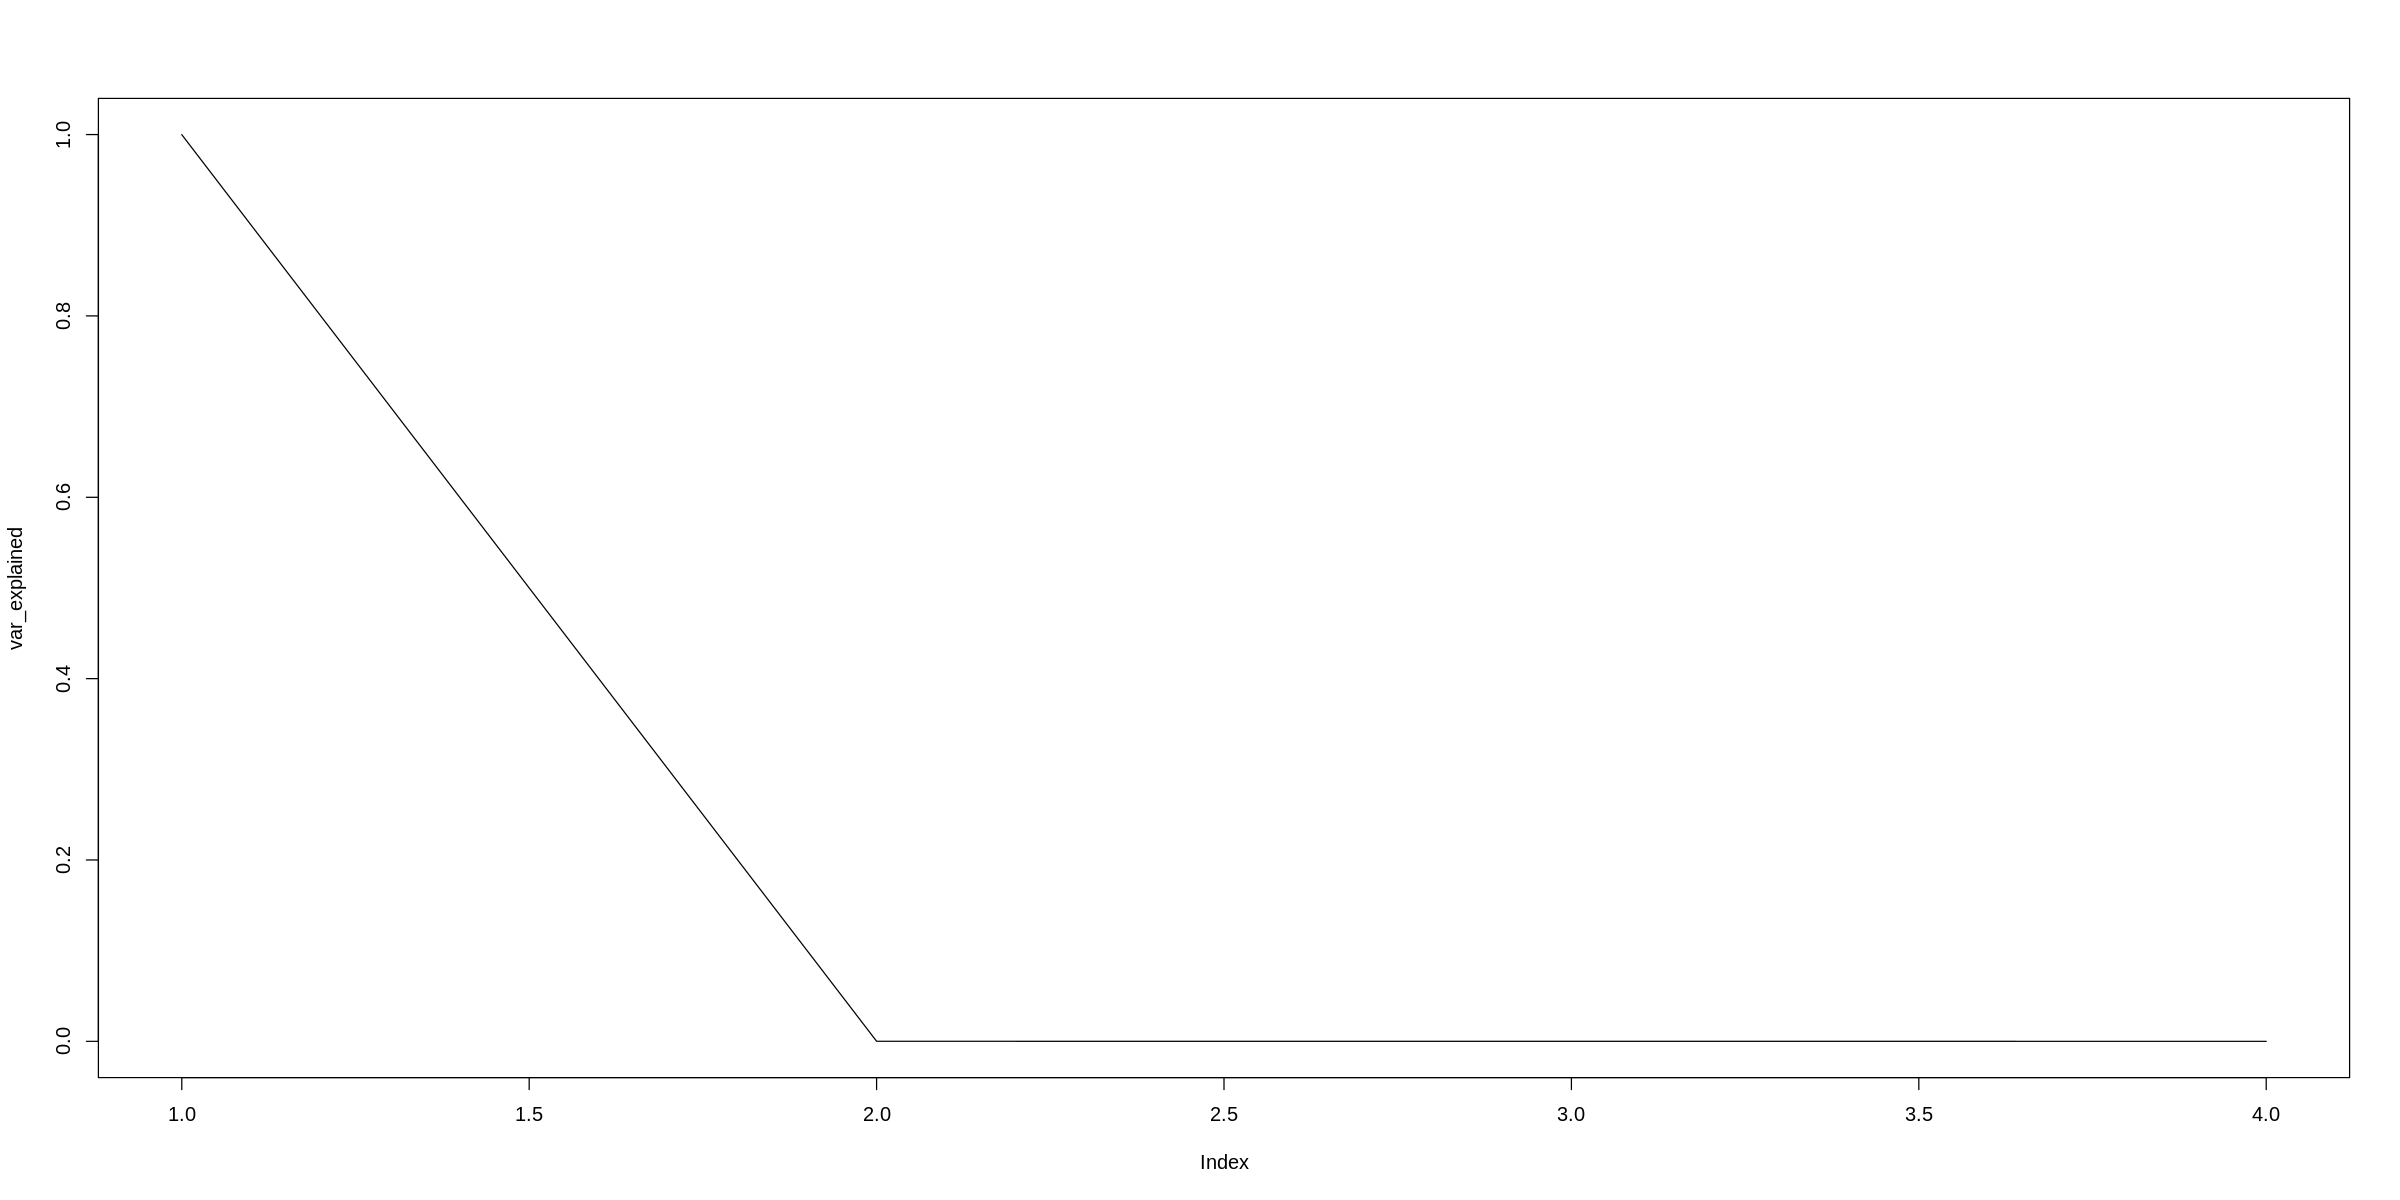

In [9]:
pca_out=prcomp(train_data)

penguins_clean$pca_1<-pca_out$x[,1]
penguins_clean$pca_2<-pca_out$x[,2]

#calculate total variance explained by each principal component
var_explained = pca_out$sdev^2 / sum(pca_out$sdev^2)

#create scree plot
plot(var_explained,type='l')



# Question does this make sense?

In [10]:

#This Calculates the Standard Deviation of each column
apply(train_data,2,sd)

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
         5.468668          1.969235         14.015765        805.215802

In [11]:
?scale


scale                   package:base                   R Documentation

_S_c_a_l_i_n_g _a_n_d _C_e_n_t_e_r_i_n_g _o_f _M_a_t_r_i_x-_l_i_k_e _O_b_j_e_c_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     'scale' is generic function whose default method centers and/or
     scales the columns of a numeric matrix.

_U_s_a_g_e:

     scale(x, center = TRUE, scale = TRUE)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric matrix(like object).

  center: either a logical value or numeric-alike vector of length
          equal to the number of columns of 'x', where 'numeric-alike'
          means that 'as.numeric(.)' will be applied successfully if
          'is.numeric(.)' is not true.

   scale: either a logical value or a numeric-alike vector of length
          equal to the number of columns of 'x'.

_D_e_t_a_i_l_s:

     The value of 'center' determines how column centering is
     performed.  If 'center' is a numeric-alike vector with length
     equal to the number of columns of 'x', then each column of 'x' has
     the corresponding value from 'center' subtracted from it.  If
     'center' is 'TRUE' then centering is done by subtracting the
     column means (omitting 'NA's) of 'x' from their corresponding
     columns, and if 'center' is 'FALSE', no centering is done.

     The value of 'scale' determines how column scaling is performed
     (after centering).  If 'scale' is a numeric-alike vector with
     length equal to the number of columns of 'x', then each column of
     'x' is divided by the corresponding value from 'scale'.  If
     'scale' is 'TRUE' then scaling is done by dividing the (centered)
     columns of 'x' by their standard deviations if 'center' is 'TRUE',
     and the root mean square otherwise.  If 'scale' is 'FALSE', no
     scaling is done.

     The root-mean-square for a (possibly centered) column is defined
     as sqrt(sum(x^2)/(n-1)), where x is a vector of the non-missing
     values and n is the number of non-missing values.  In the case
     'center = TRUE', this is the same as the standard deviation, but
     in general it is not.  (To scale by the standard deviations
     without centering, use 'scale(x, center = FALSE, scale = apply(x,
     2, sd, na.rm = TRUE))'.)

_V_a_l_u_e:

     For 'scale.default', the centered, scaled matrix.  The numeric
     centering and scalings used (if any) are returned as attributes
     '"scaled:center"' and '"scaled:scale"'

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_S_e_e _A_l_s_o:

     'sweep' which allows centering (and scaling) with arbitrary
     statistics.

     For working with the scale of a plot, see 'par'.

_E_x_a_m_p_l_e_s:

     require(stats)
     x <- matrix(1:10, ncol = 2)
     (centered.x <- scale(x, scale = FALSE))
     cov(centered.scaled.x <- scale(x)) # all 1

In [12]:

apply(scale(train_data),2,sd)

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
                1                 1                 1                 1

Standard deviations (1, .., p=4):
[1] 1.6569115 0.8821095 0.6071594 0.3284579

Rotation (n x k) = (4 x 4):
                         PC1         PC2        PC3        PC4
bill_length_mm     0.4537532 -0.60019490 -0.6424951  0.1451695
bill_depth_mm     -0.3990472 -0.79616951  0.4258004 -0.1599044
flipper_length_mm  0.5768250 -0.00578817  0.2360952 -0.7819837
body_mass_g        0.5496747 -0.07646366  0.5917374  0.5846861

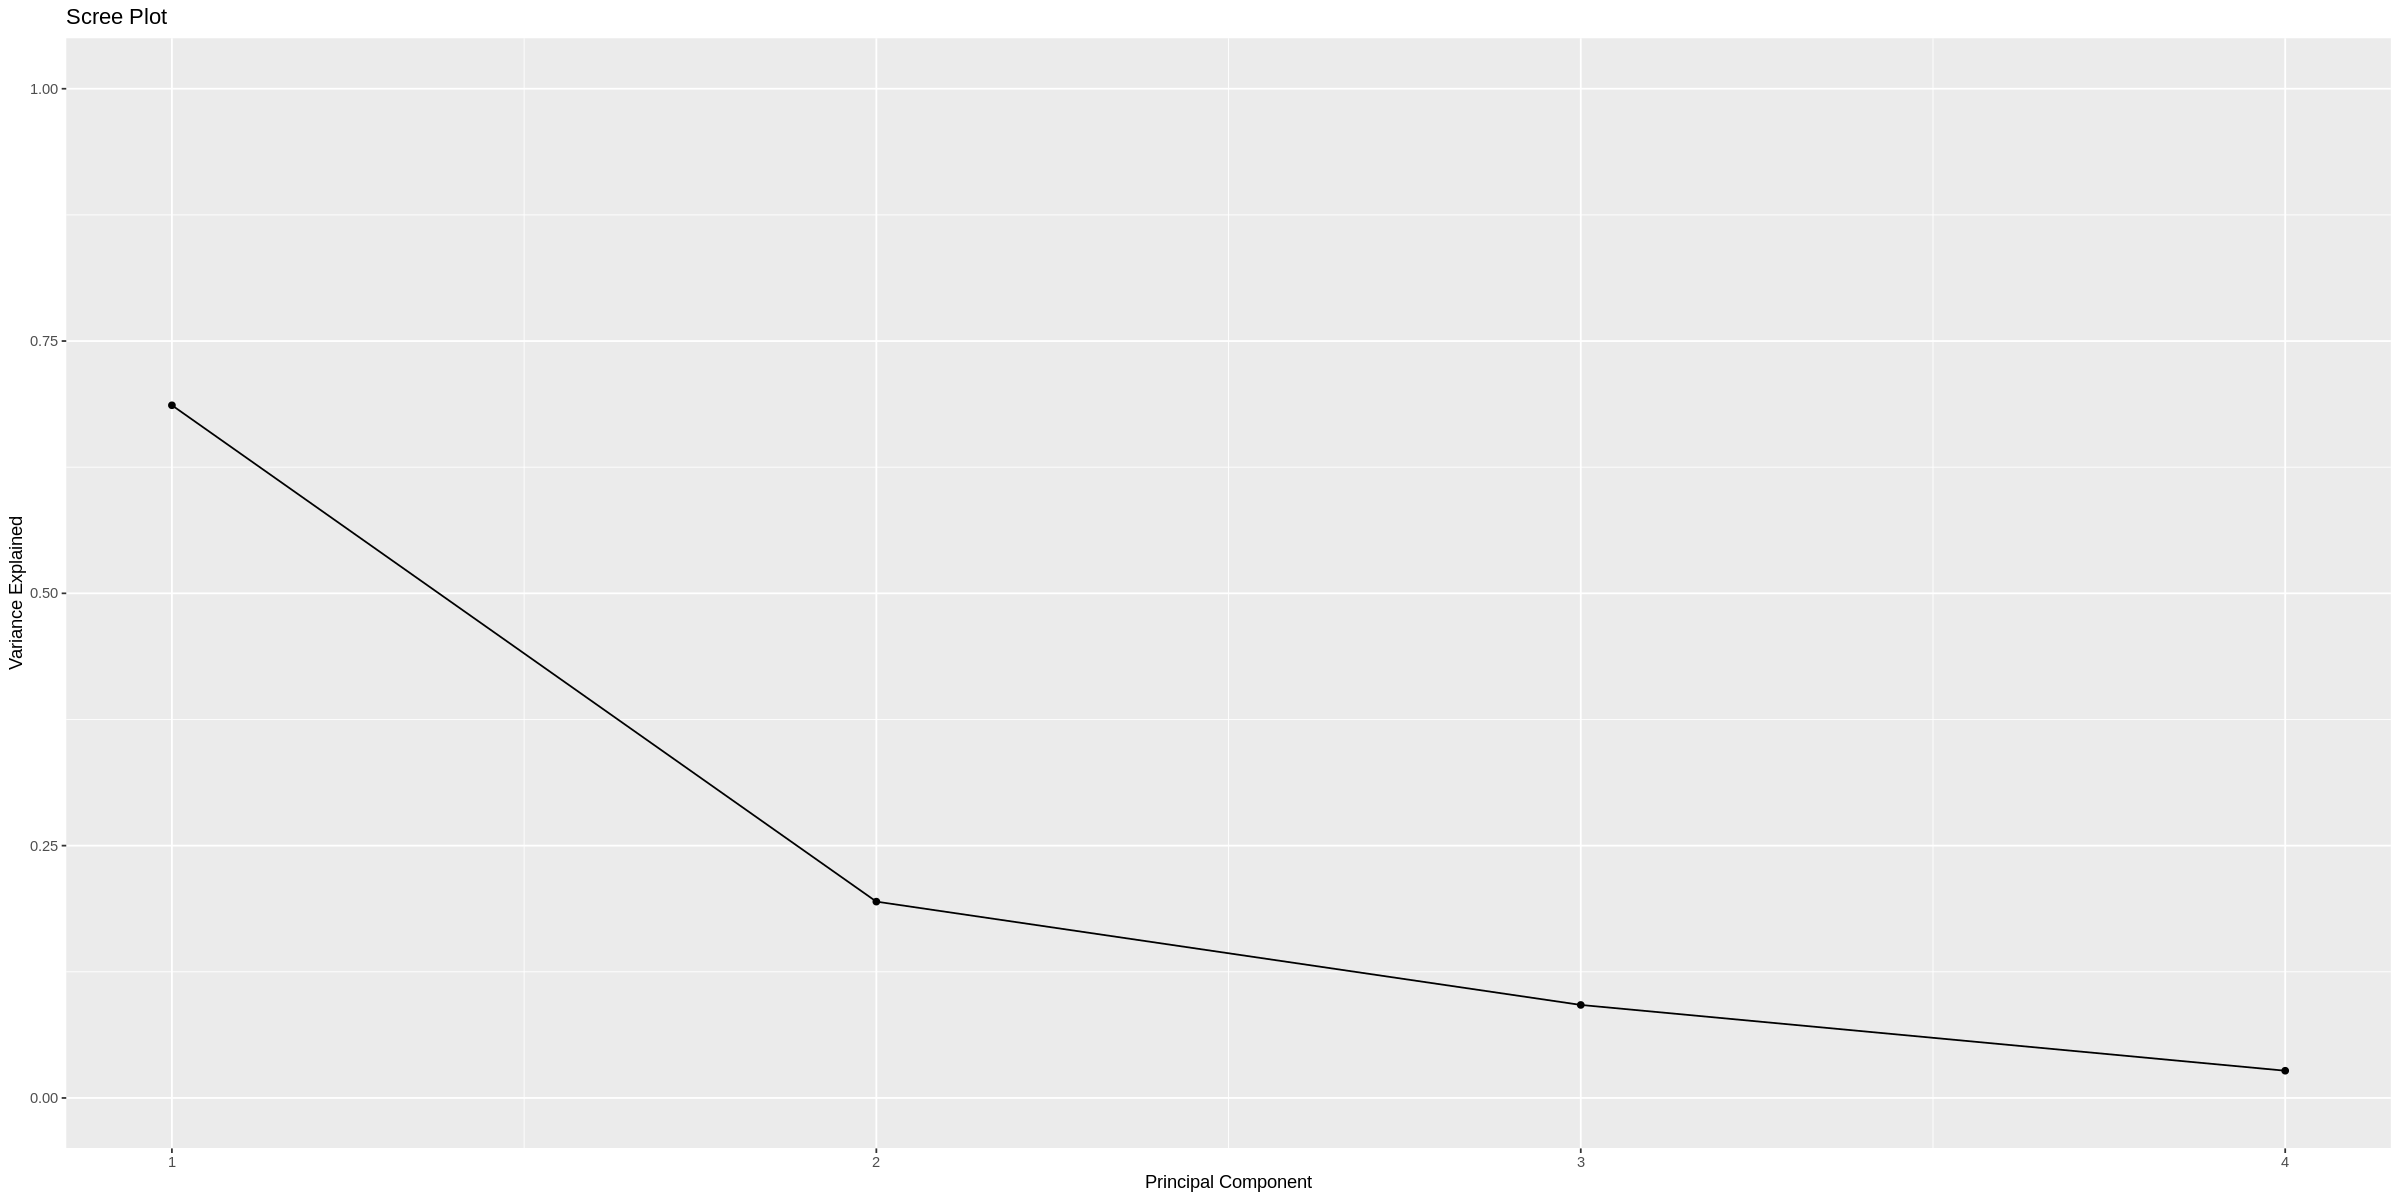

In [13]:
#This way 
#pca_out=prcomp(scale(train_data))
#OR This way
pca_out=prcomp(train_data,scale=TRUE)

pca_out
penguins_clean$pca_1<-pca_out$x[,1]
penguins_clean$pca_2<-pca_out$x[,2]

#calculate total variance explained by each principal component
var_explained = pca_out$sdev^2 / sum(pca_out$sdev^2)



#create scree plot
library(ggplot2)

qplot(c(1:4), var_explained) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

penguins_clean$pca_1


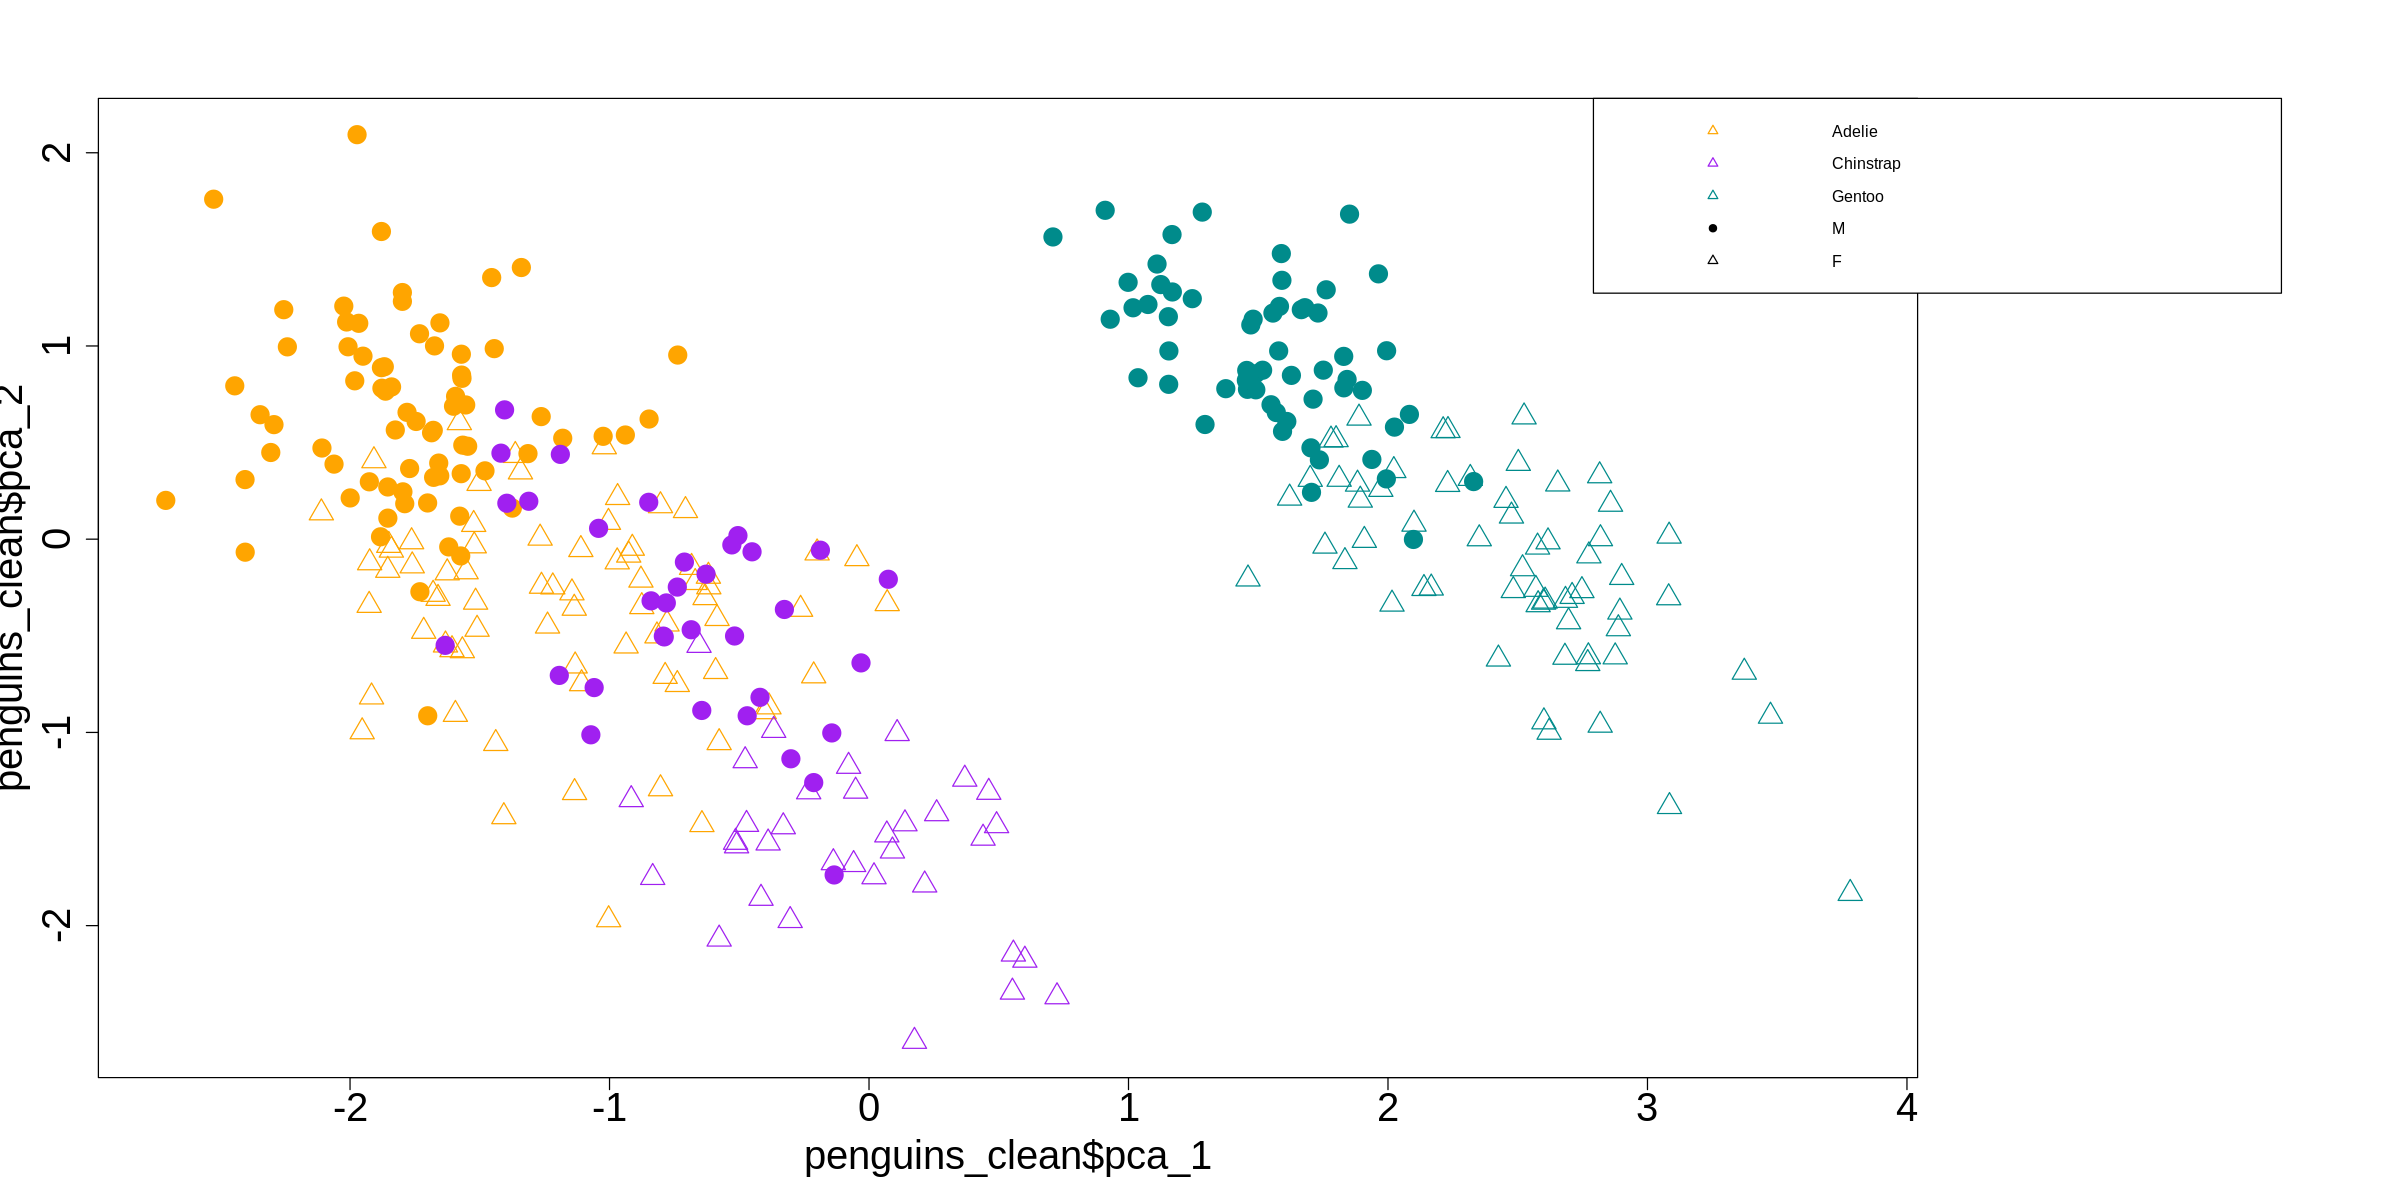

In [14]:
plot_penguins(penguins_clean$pca_1,penguins_clean$pca_2)



# TSNE

In [15]:
library('Rtsne')

penguins_clean$tsne_1


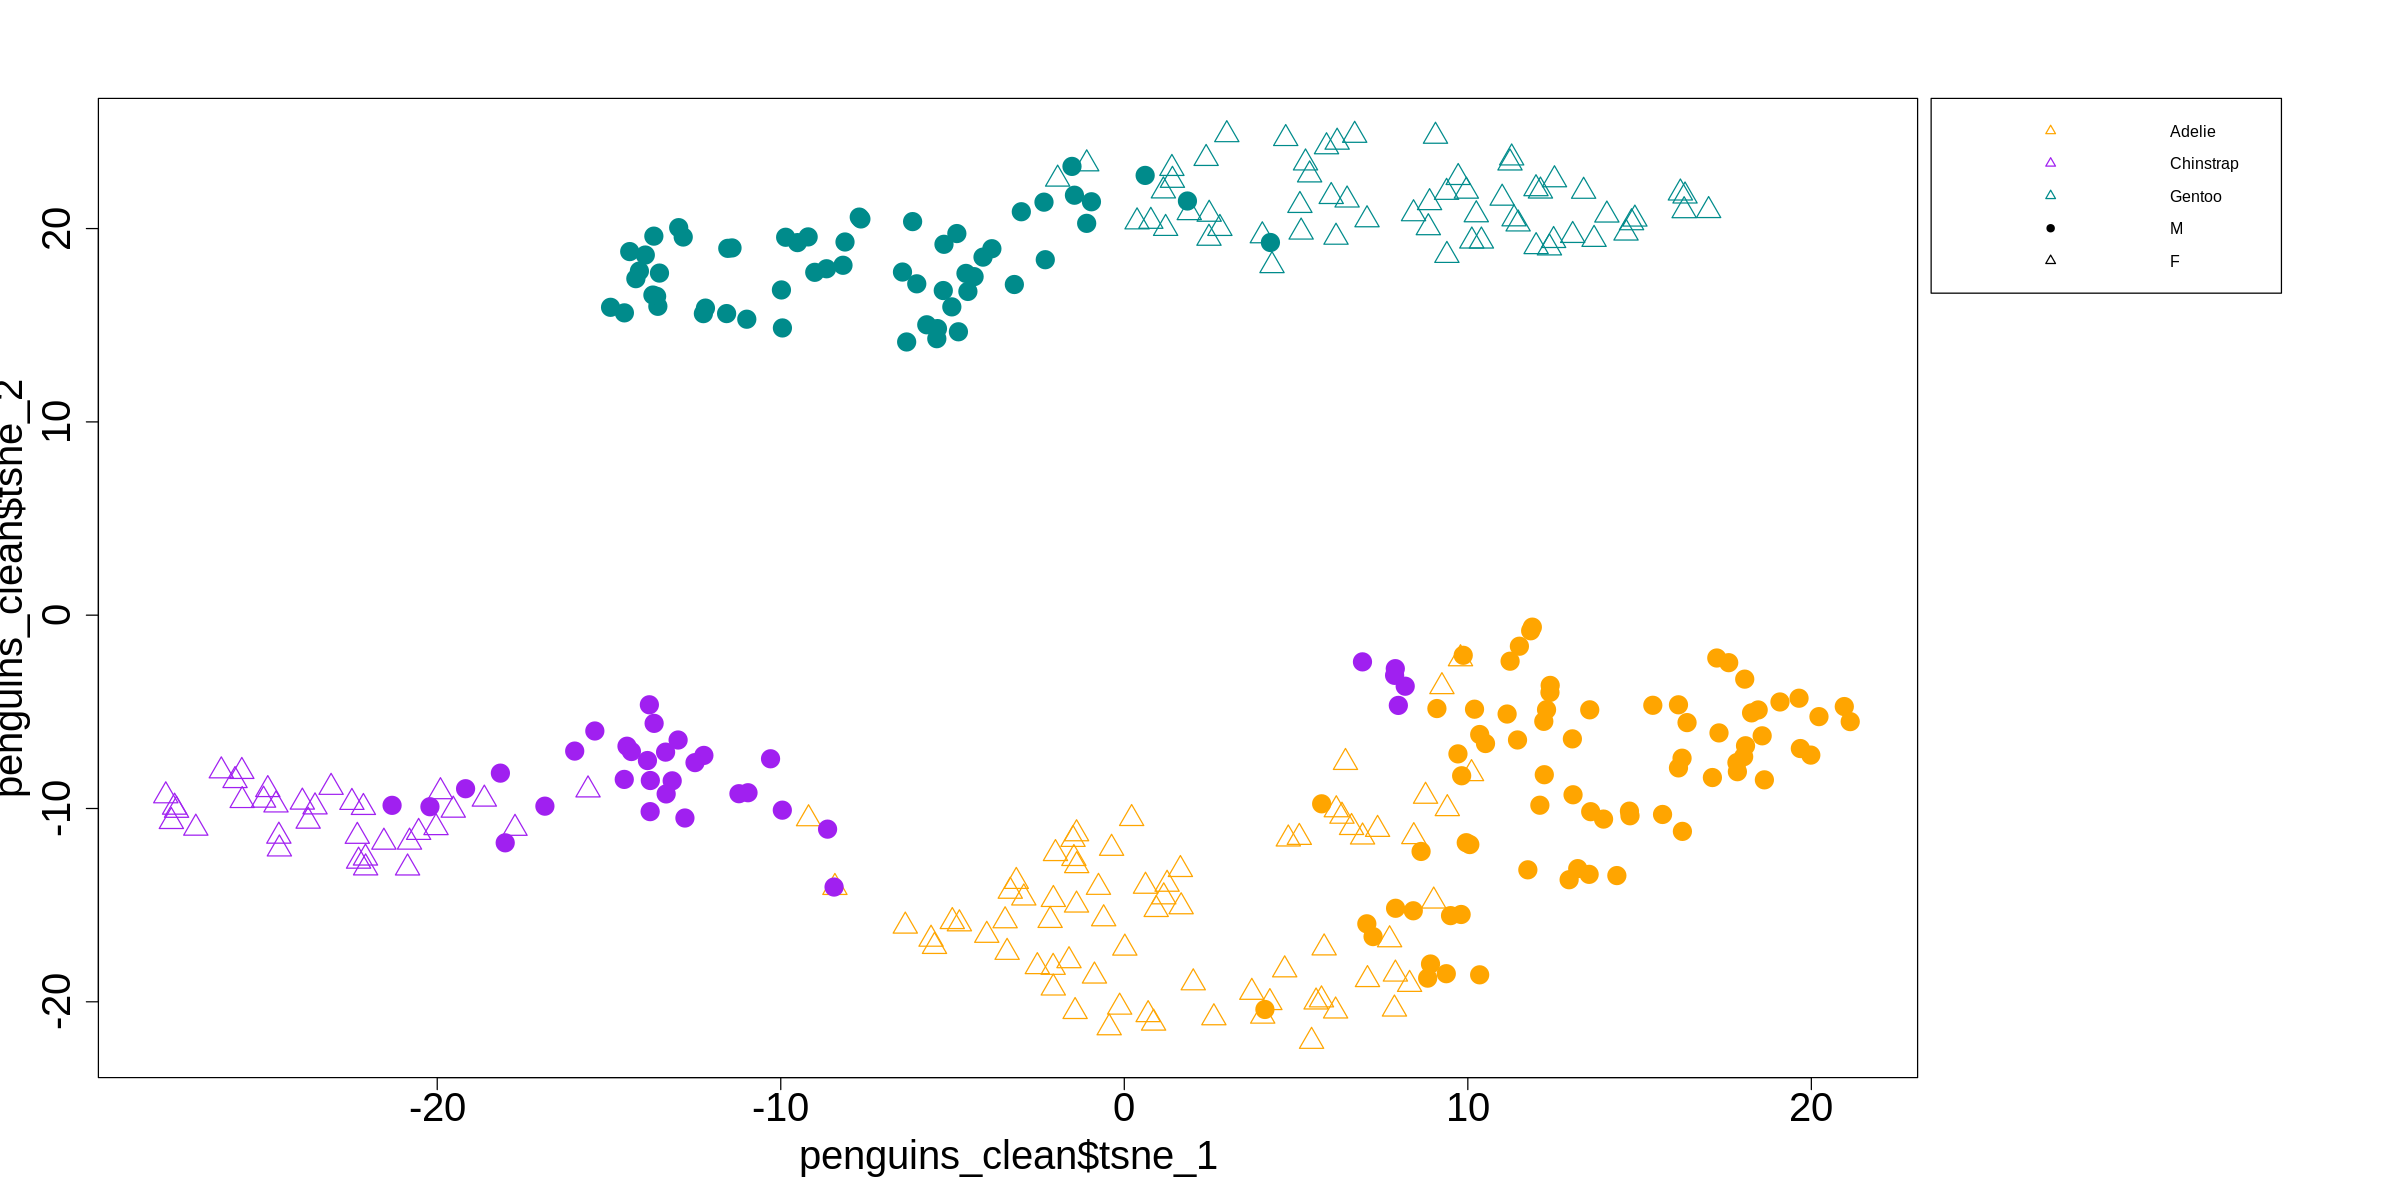

In [16]:

#tsne_out<-Rtsne(train_data,perplexity=5,max_iter=500,theta=0,normalize=TRUE)
tsne_out<-Rtsne(scale(train_data),perplexity=15,normalize=TRUE)

penguins_clean$tsne_1<-tsne_out$Y[,1]
penguins_clean$tsne_2<-tsne_out$Y[,2]


#colnames(penguins)
plot_penguins(penguins_clean$tsne_1,penguins_clean$tsne_2)


# Try a few different values of perplexity and try un-scaled


# UMAP

In [17]:
umap_out=umap(scale(train_data),n_neighbors=15)

penguins_clean$umap_1<-umap_out[,1]
penguins_clean$umap_2<-umap_out[,2]

penguins_clean$umap_1


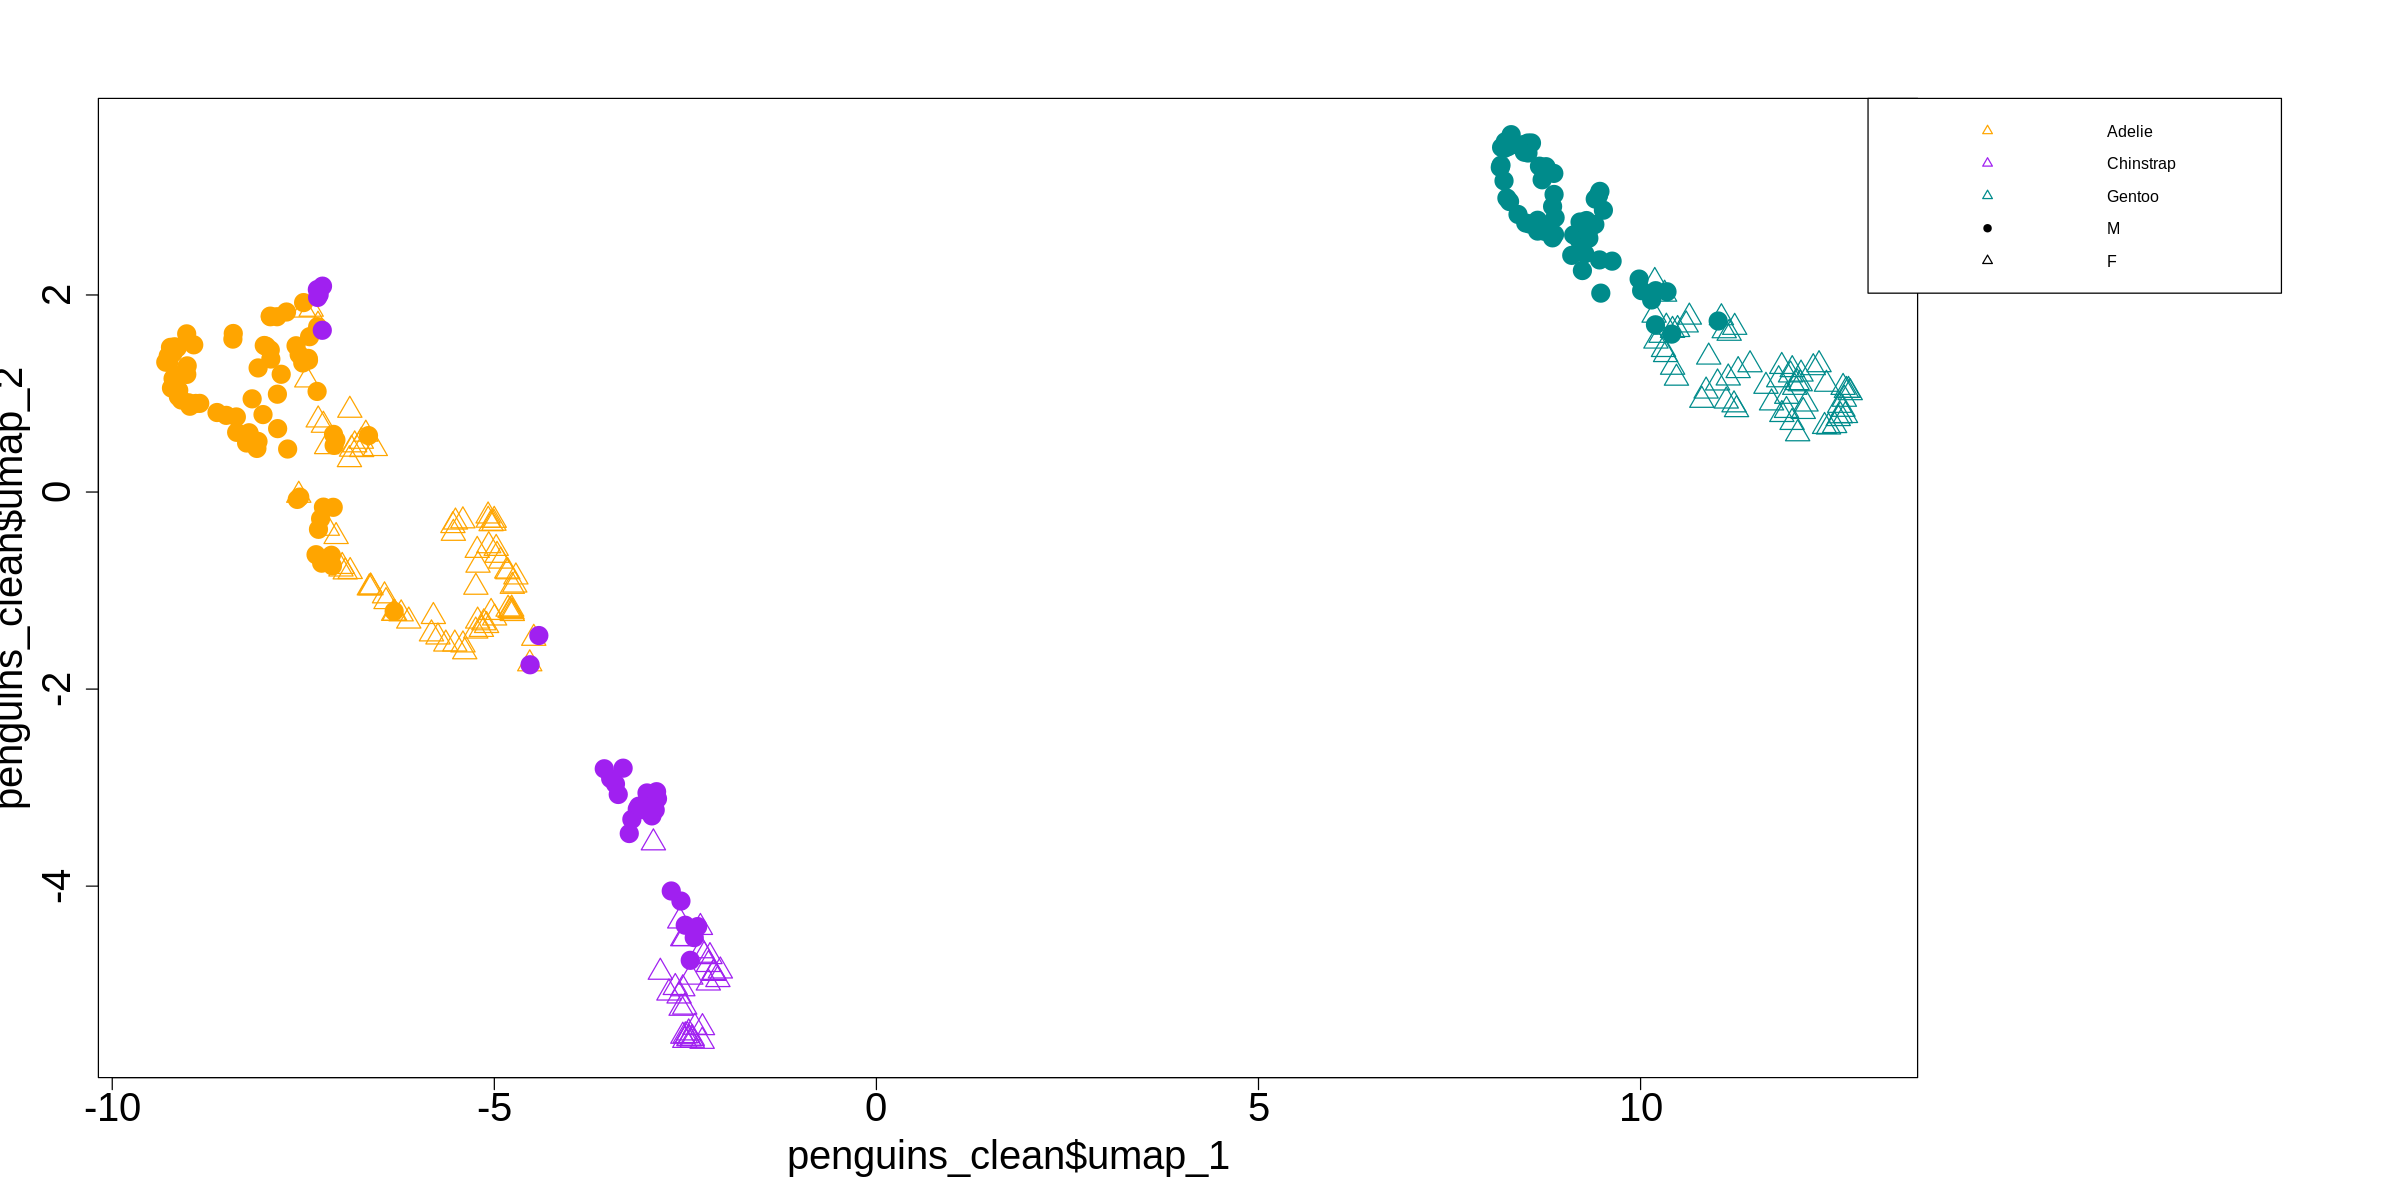

In [18]:
plot_penguins(penguins_clean$umap_1,penguins_clean$umap_2)




# Question kinds of question would this data be useful in answering?

# Clustering

Kmeans clustering!




In [19]:
k_means_out=kmeans(train_data,3)
penguins_clean$km3=k_means_out$cluster



penguins_clean$body_mass_g
[1] "1" "2" "3" "M" "F"
penguins_clean$body_mass_g


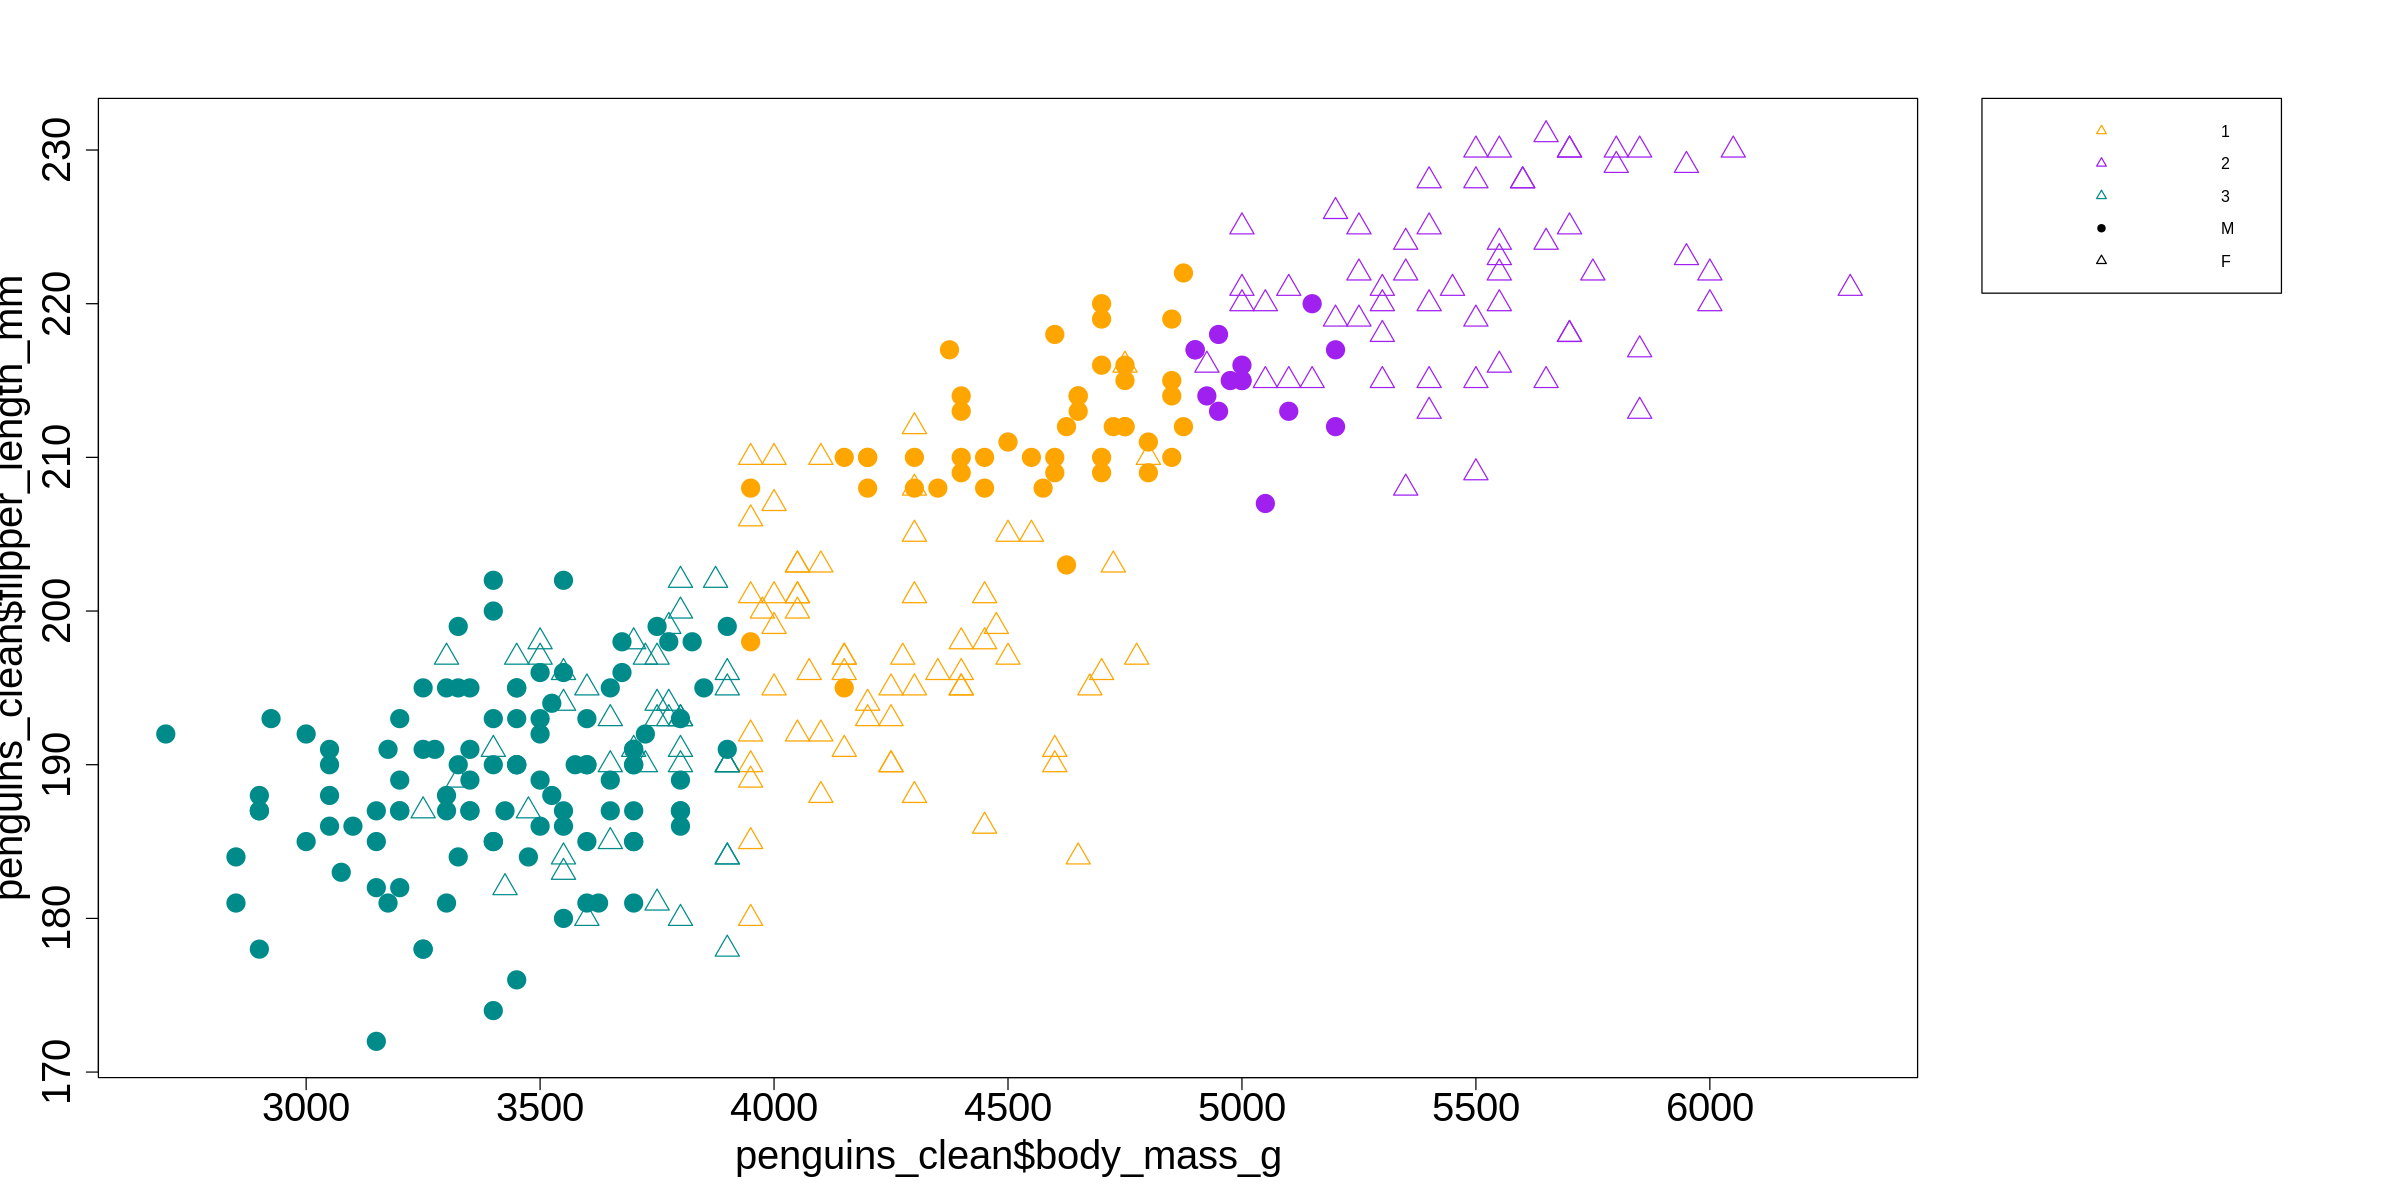

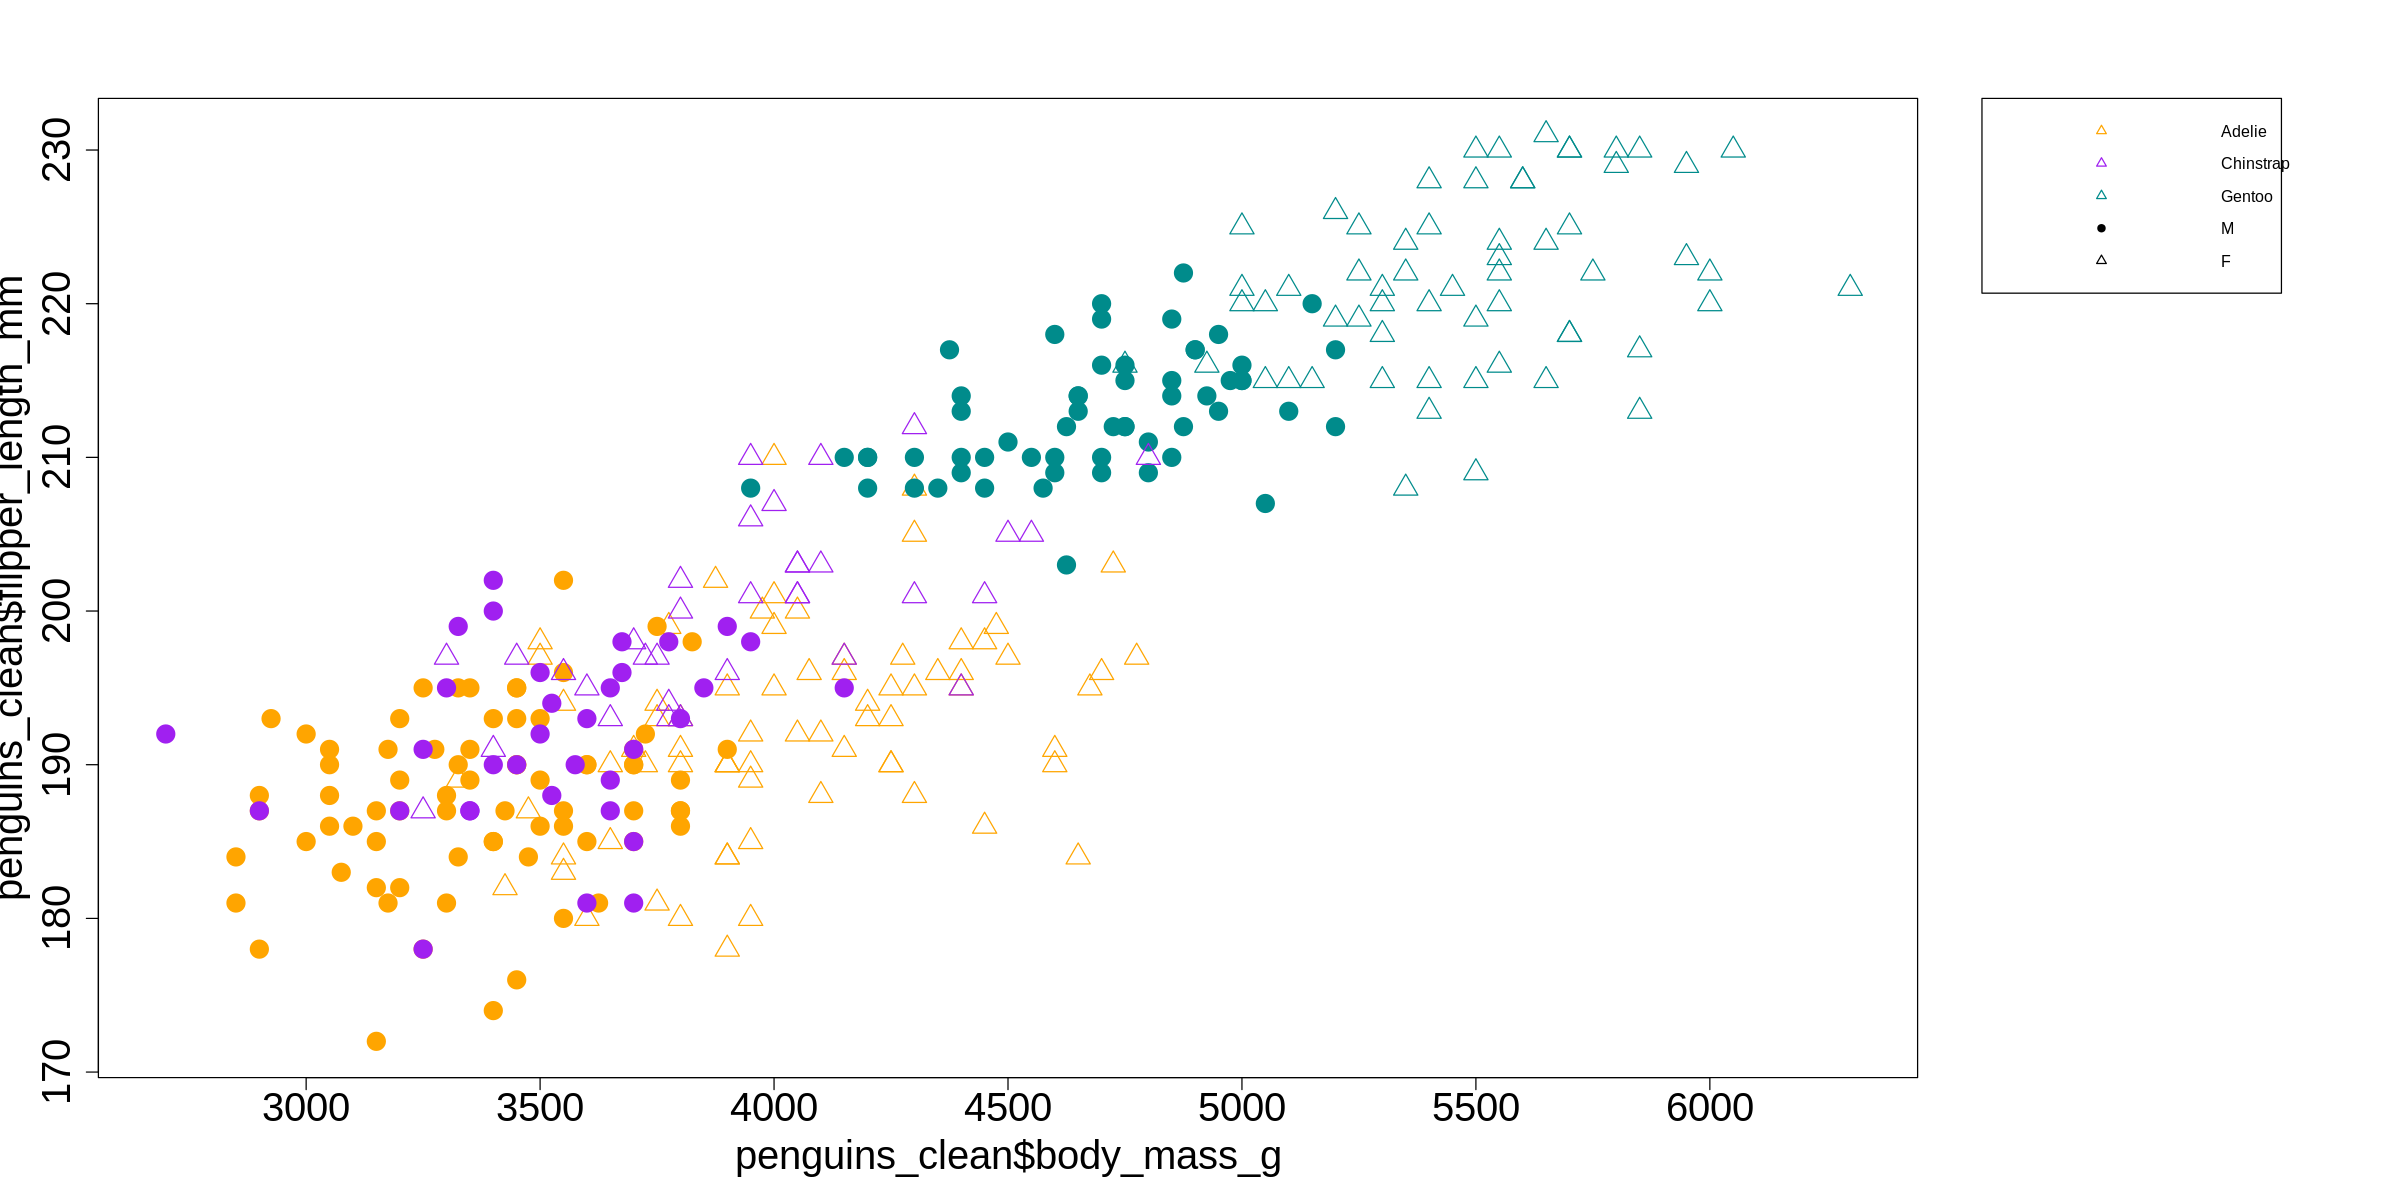

In [20]:
plot_penguins(penguins_clean$body_mass_g,penguins_clean$flipper_length_mm,z=penguins_clean$km3)

plot_penguins(penguins_clean$body_mass_g,penguins_clean$flipper_length_mm)




# We have the same problems with scale clustering is dominated by body mass

penguins_clean$body_mass_g
[1] "1" "2" "3" "M" "F"
penguins_clean$body_mass_g
[1] "1" "2" "3" "M" "F"


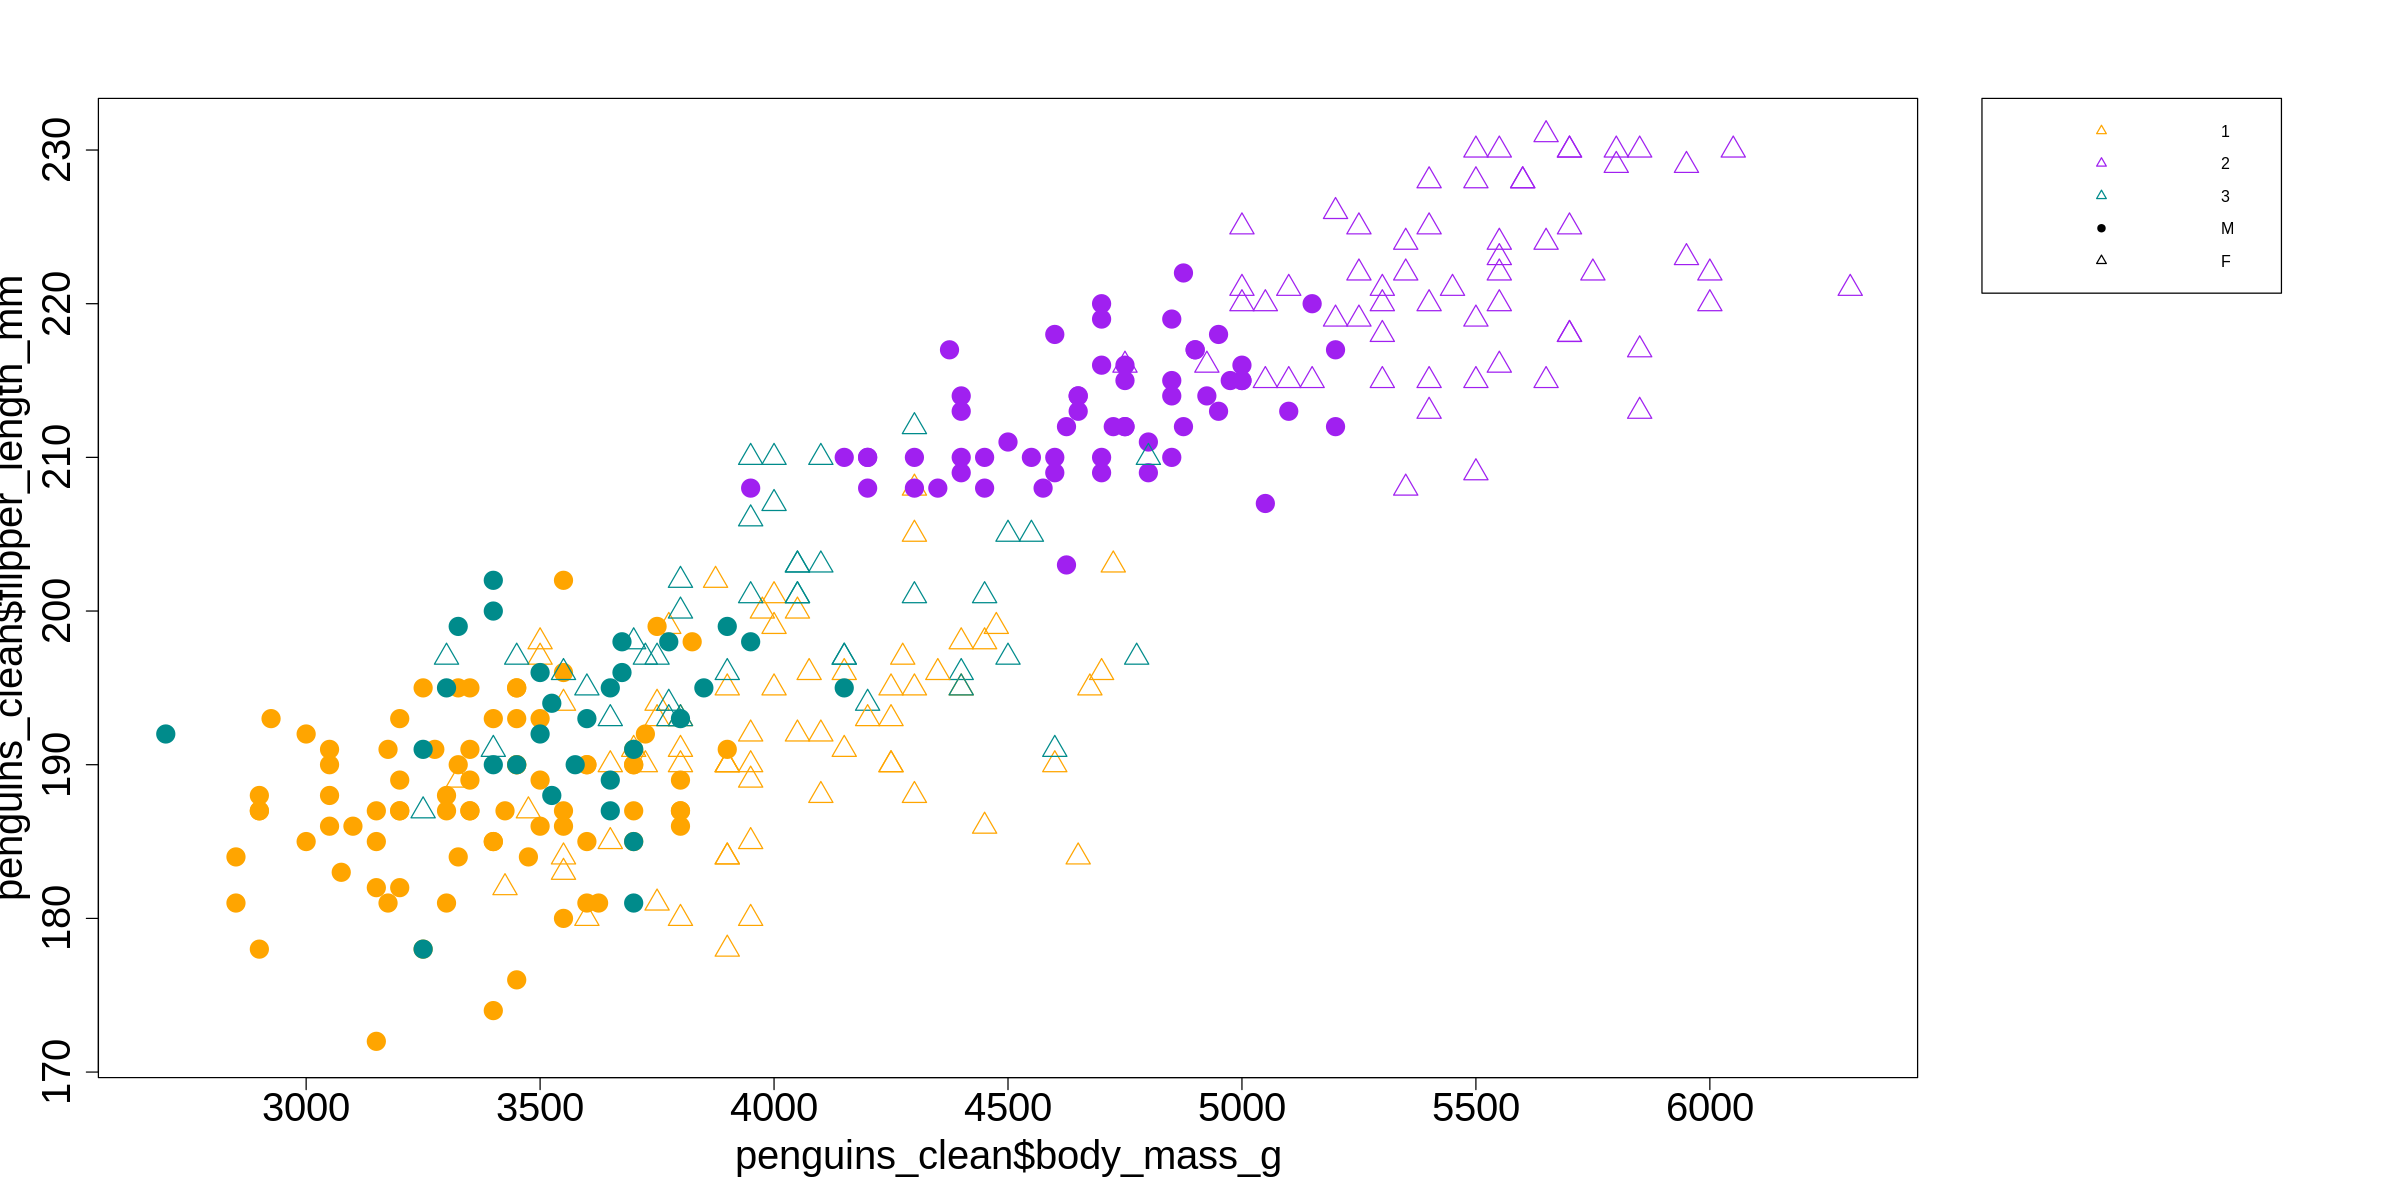

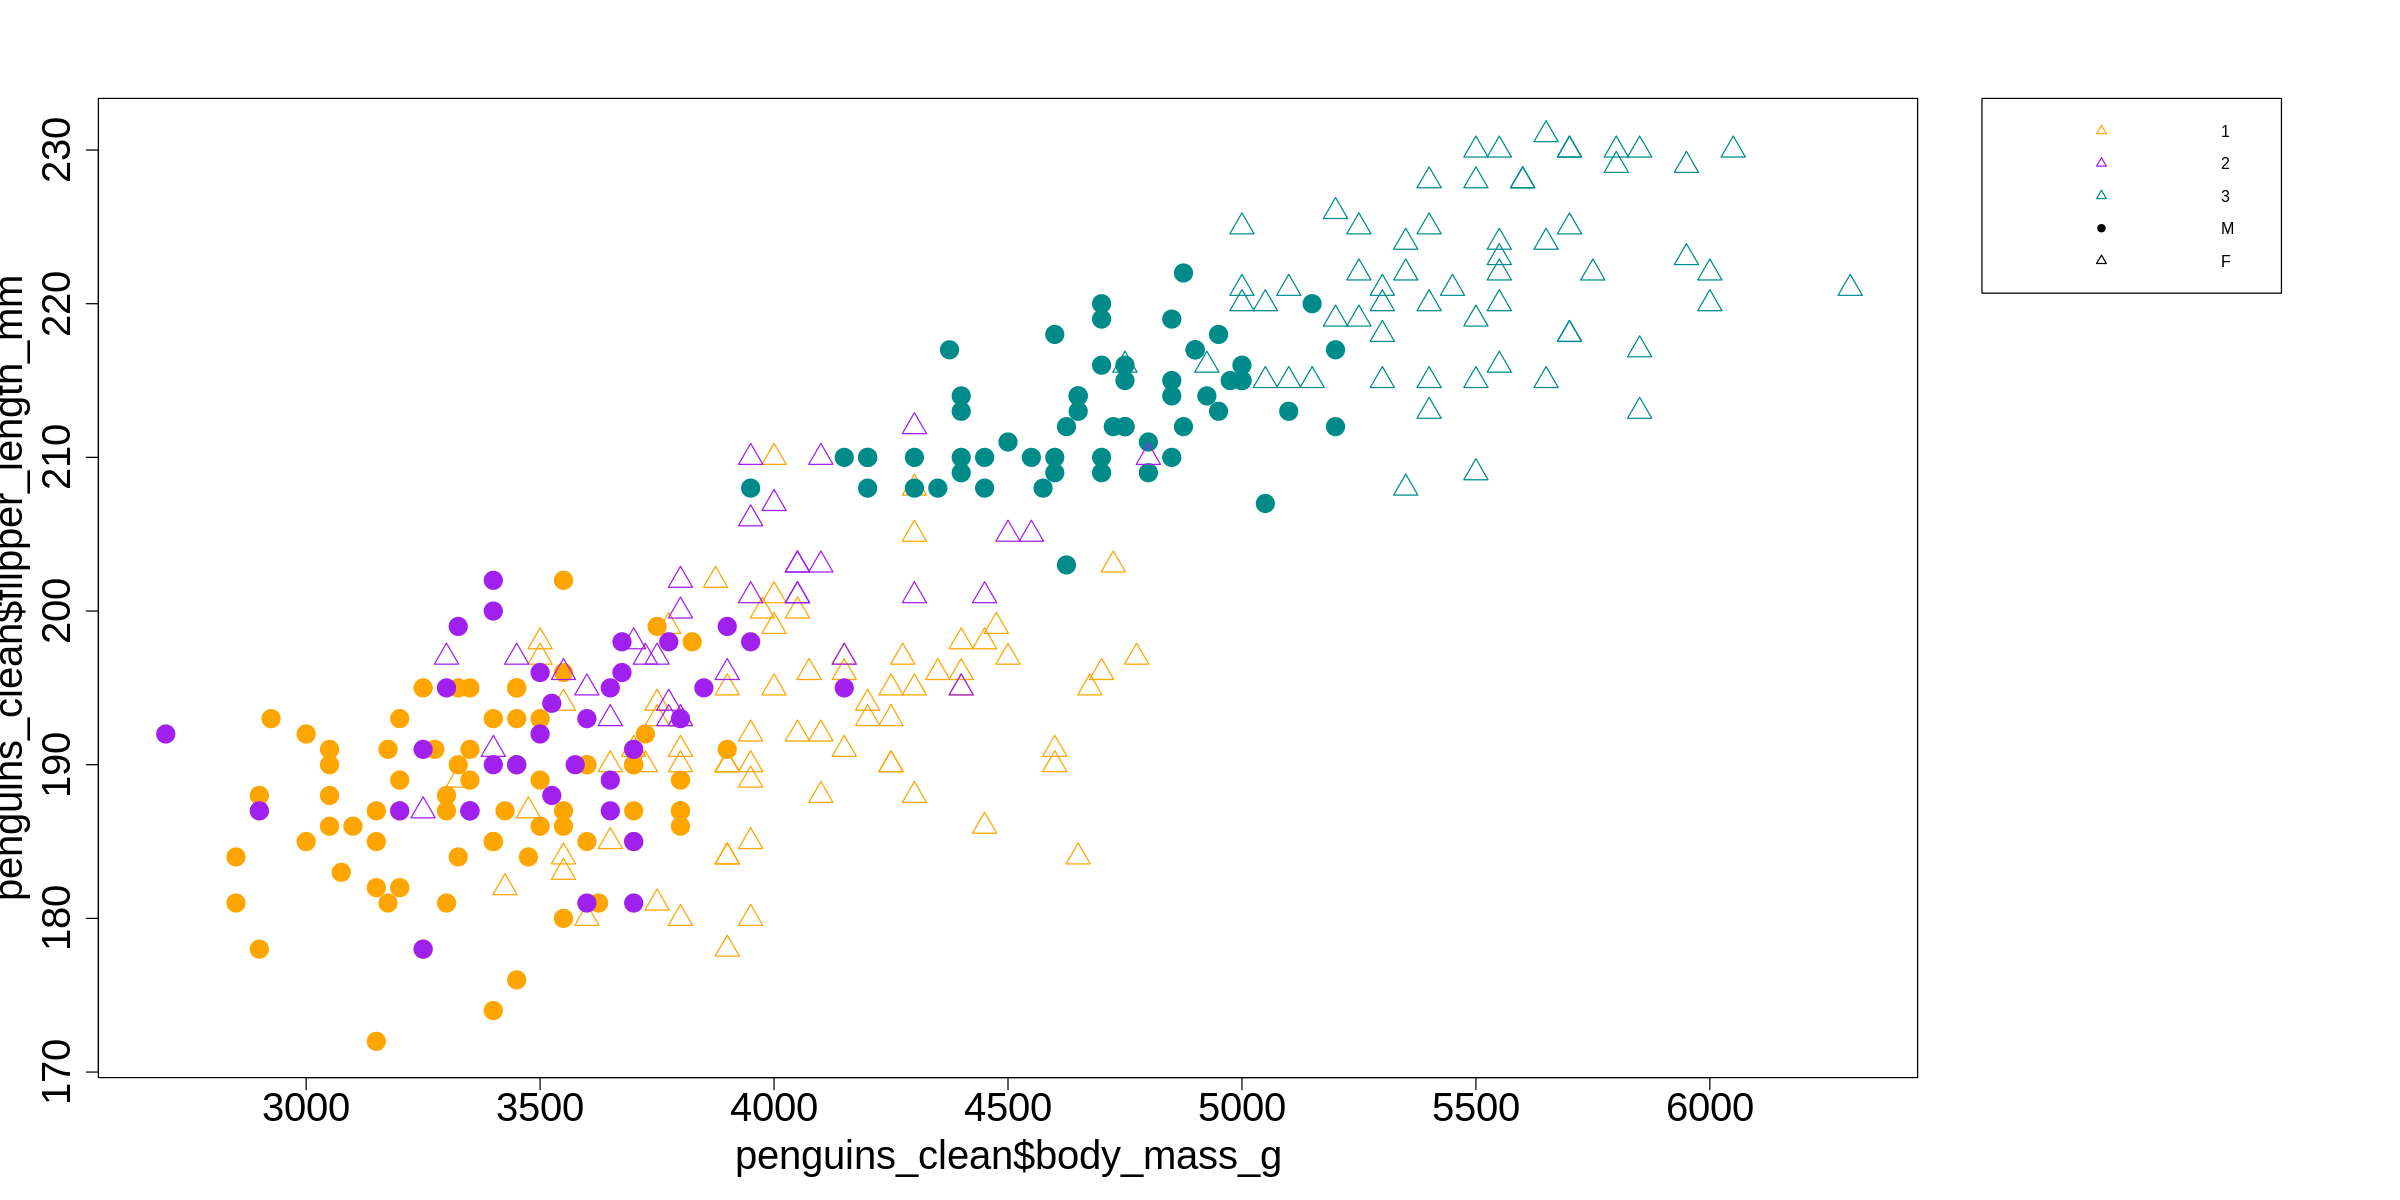

In [21]:
k_means_out=kmeans(scale(train_data),3)
penguins_clean$km3_scale=k_means_out$cluster
plot_penguins(penguins_clean$body_mass_g,penguins_clean$flipper_length_mm,z=penguins_clean$km3_scale)
plot_penguins(penguins_clean$body_mass_g,penguins_clean$flipper_length_mm,z=penguins_clean$species)



In [22]:
# How many clusters
k_means_1=kmeans(scale(train_data),1)
k_means_2=kmeans(scale(train_data),2)
k_means_3=kmeans(scale(train_data),3)
k_means_4=kmeans(scale(train_data),4)
k_means_5=kmeans(scale(train_data),5)
k_means_6=kmeans(scale(train_data),6)
k_means_7=kmeans(scale(train_data),7)
k_means_8=kmeans(scale(train_data),8)
k_means_9=kmeans(scale(train_data),9)
k_means_10=kmeans(scale(train_data),10)





In [23]:
data=c(k_means_1$tot.withinss,
k_means_2$tot.withinss,
k_means_3$tot.withinss,
k_means_4$tot.withinss,
k_means_5$tot.withinss,
k_means_6$tot.withinss,
k_means_7$tot.withinss,
k_means_8$tot.withinss,
k_means_9$tot.withinss,
k_means_10$tot.withinss       
      )



# We can look at a similar 'scree' plot for Kmeans

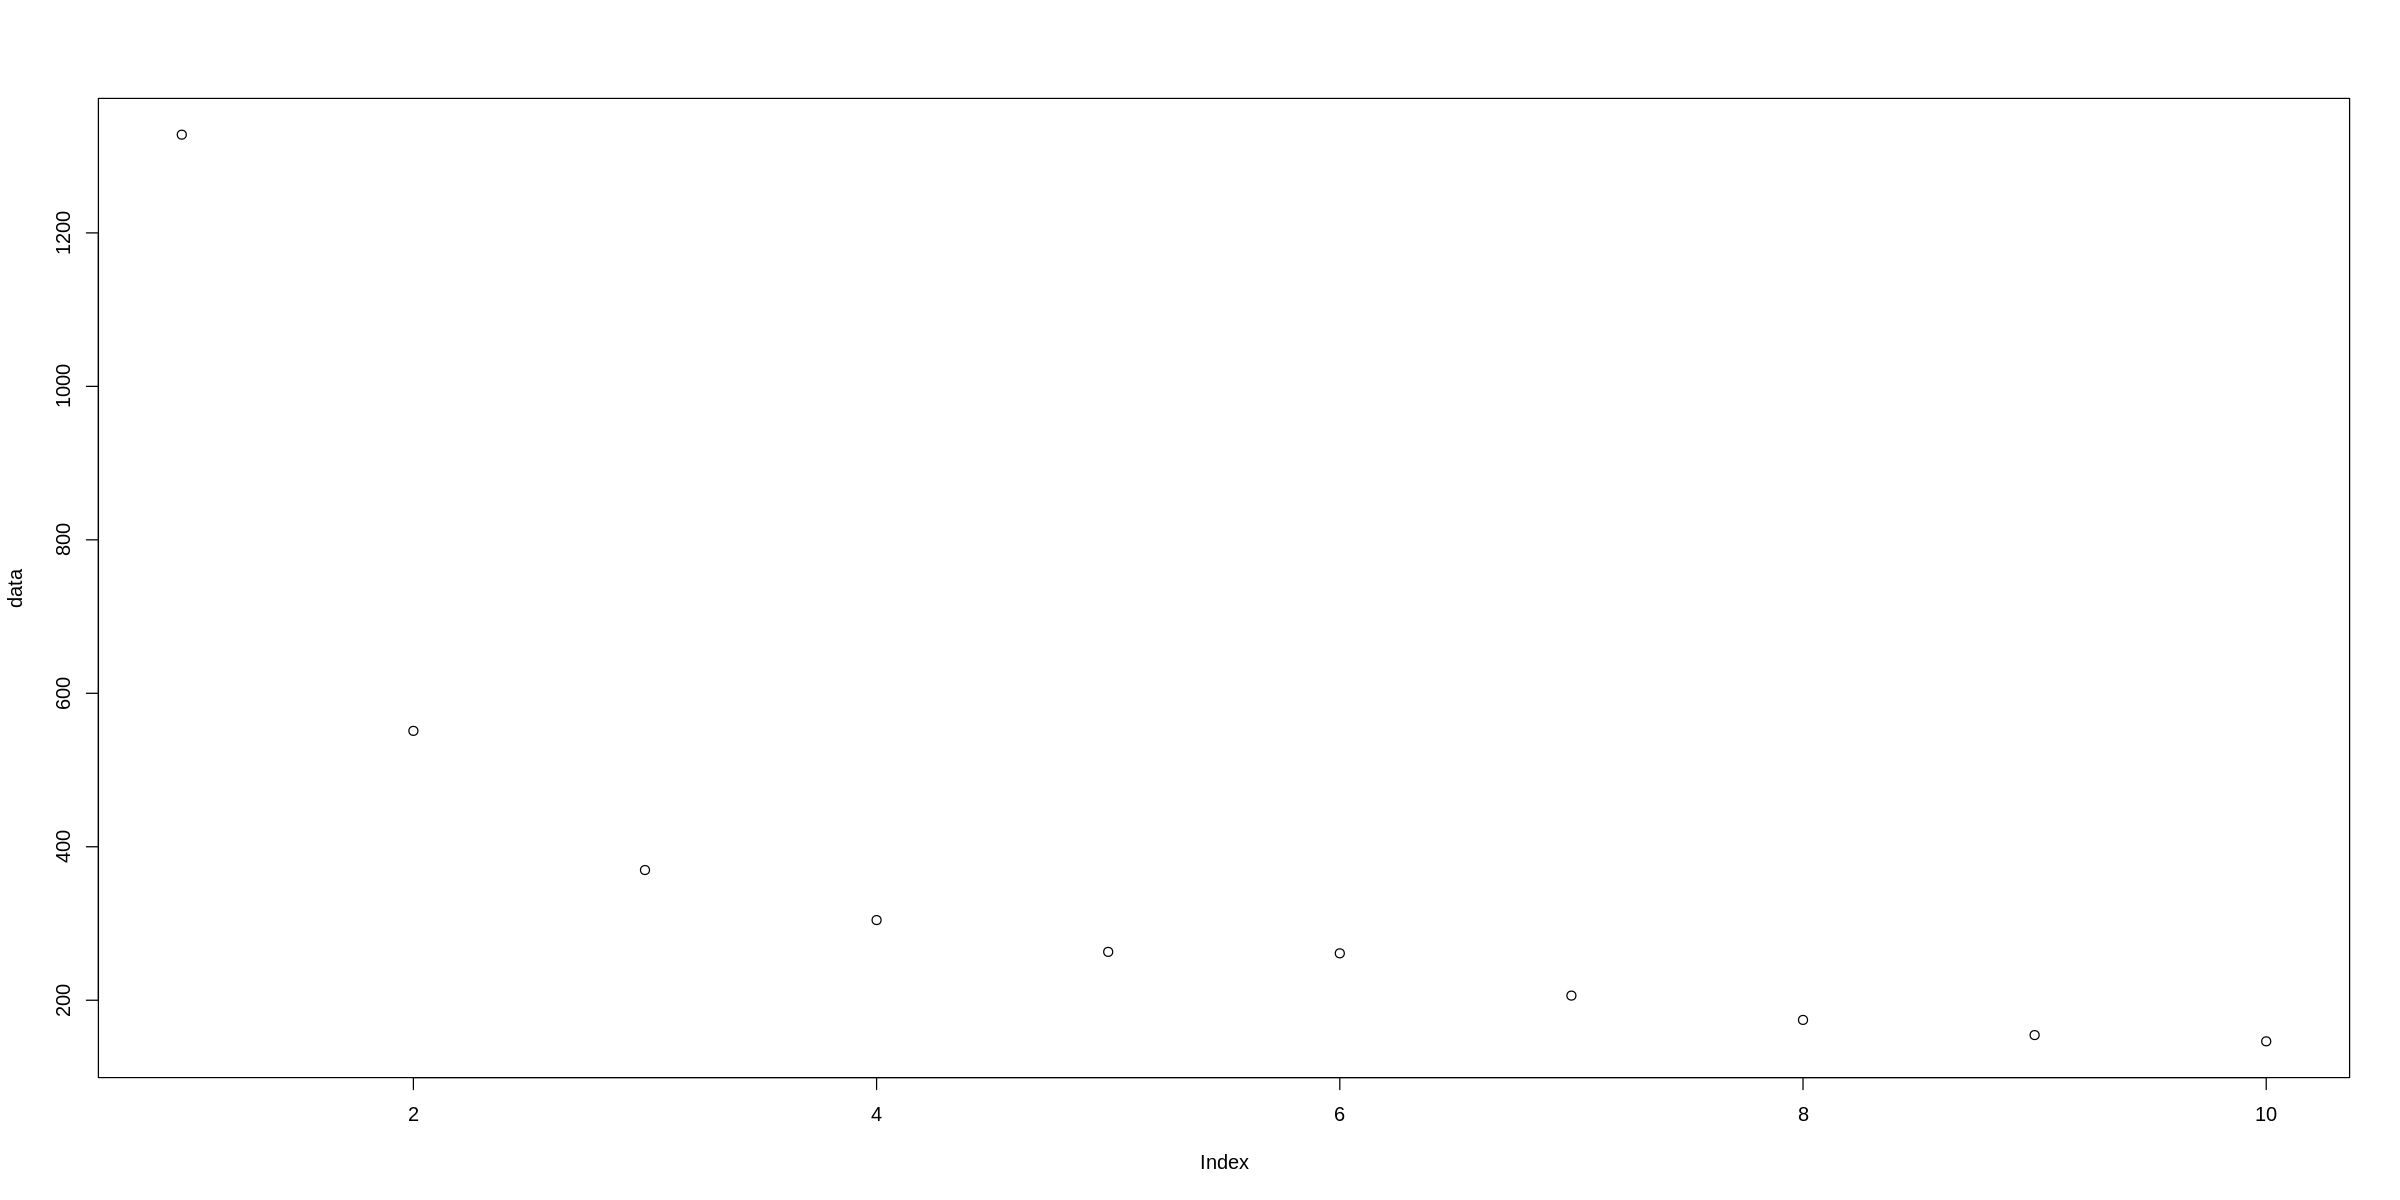

In [24]:
plot(data)

# Writing a for loop to save time

What if we wanted to do this 100 times or 1000 times. If you have to do it more than twice automate it!

```R
for (i in 1:50)
{
print(i) # Anything you want here
}
```

The above **for loop** is short hand for 
```
i=1
print(i)
i=2
print(i)
...
i=50
print(i)
```

In [25]:
for (i in 1:50)
{
print(i) 
}


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50


# Exercise Redo the above k-means plot using a for loop

[1] "Solution"

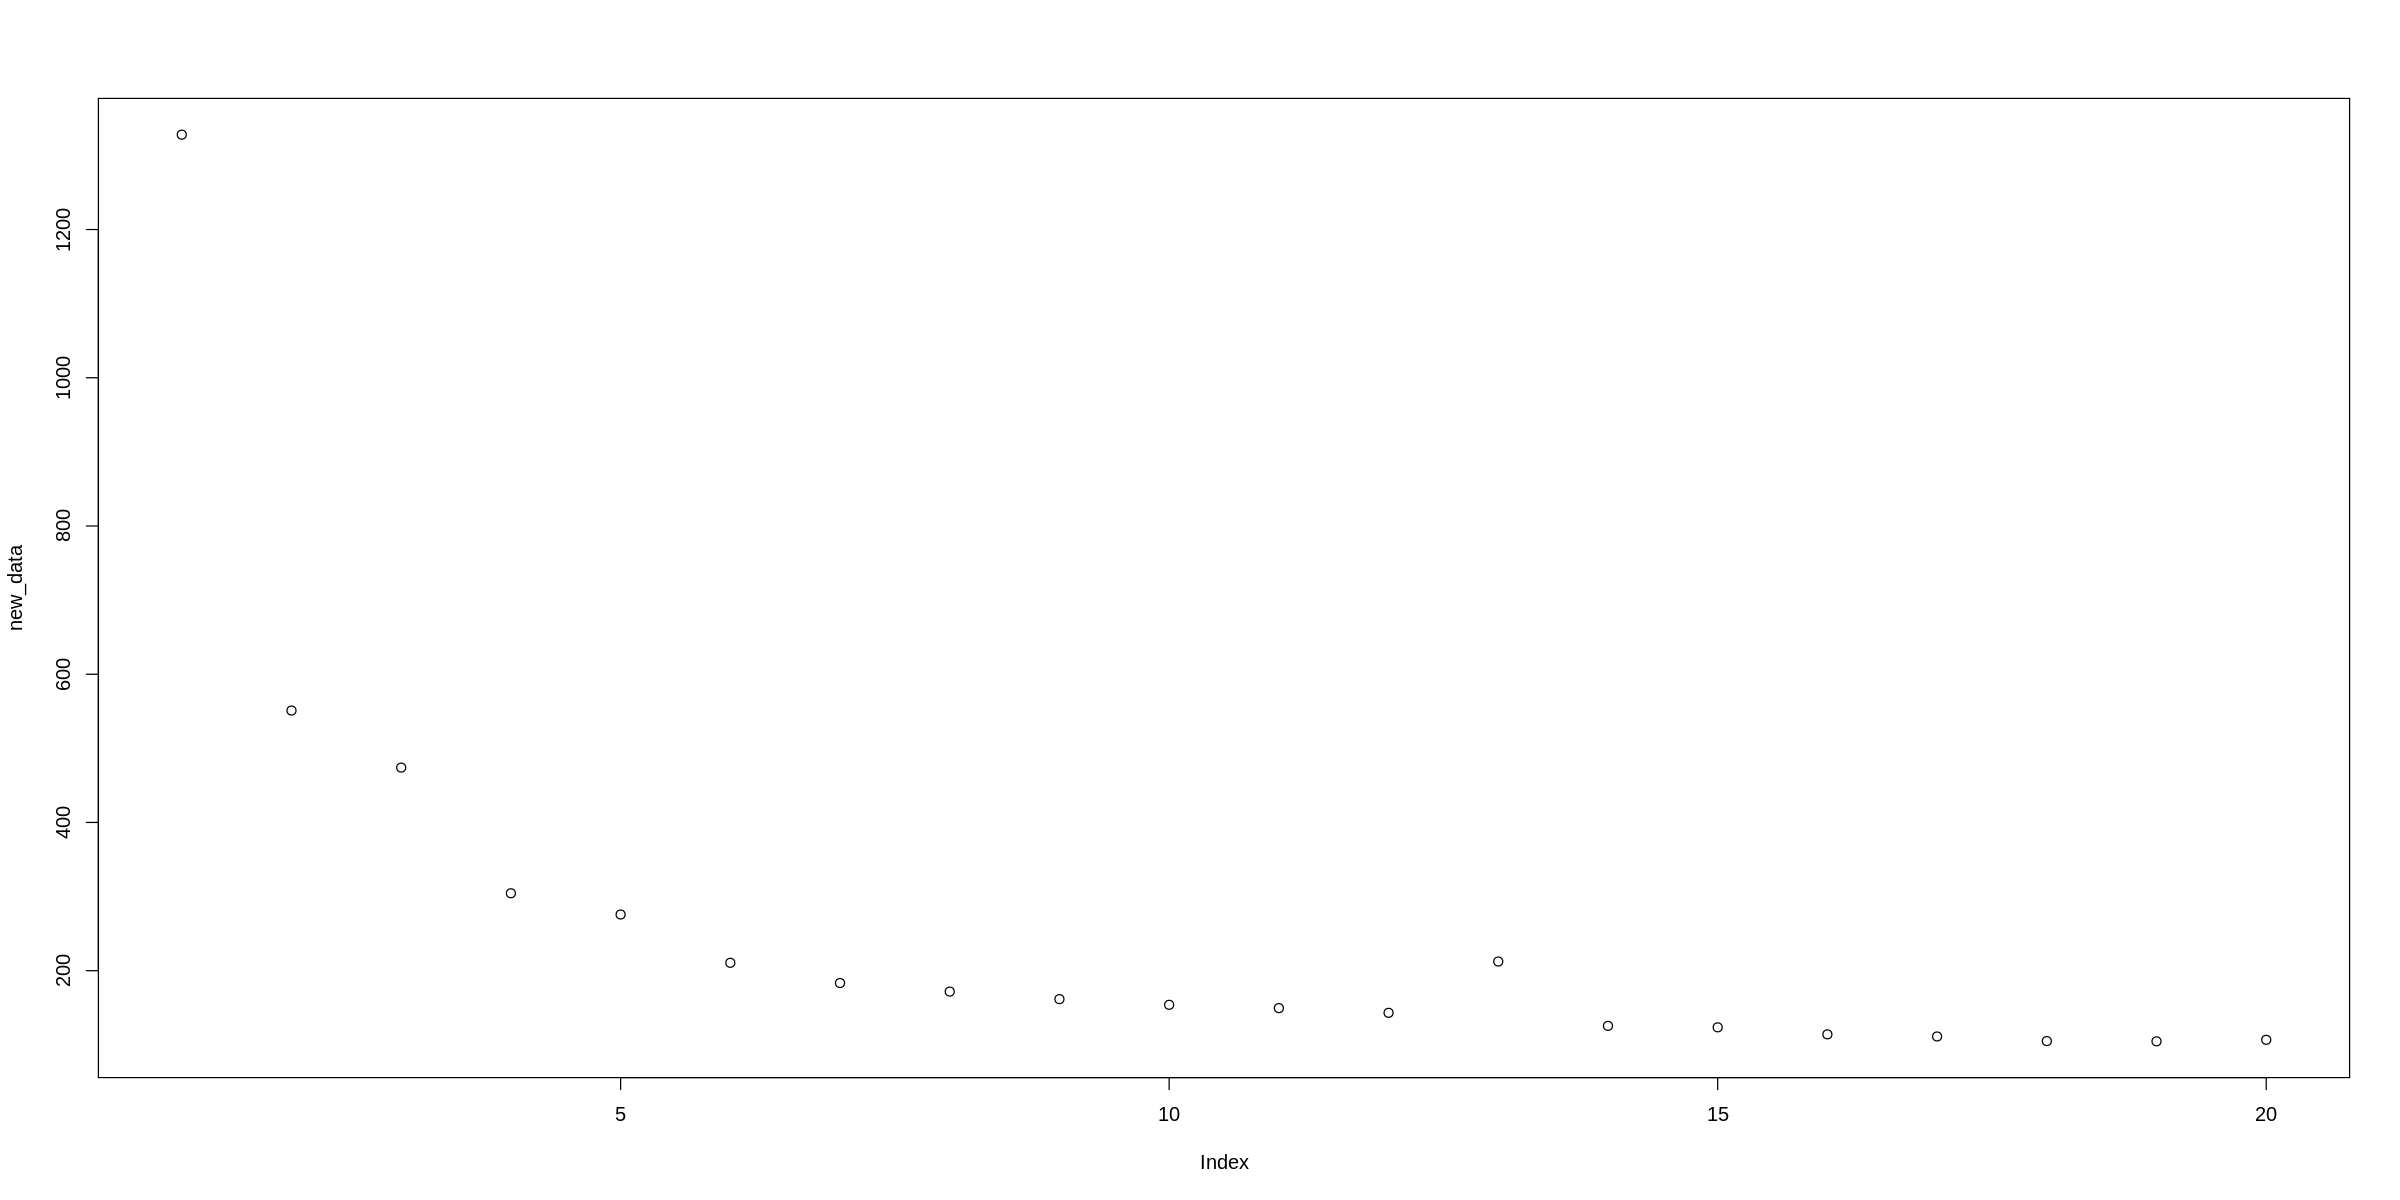

In [26]:
"Solution"
new_data=c()
for (i in 1:20){
    k_means_out=kmeans(scale(train_data),i)
    new_data=c(new_data,c(k_means_out$tot.withinss))
}
plot(new_data)

# There's a package for that! A more robust way to pick your cluster number is to look for the maximum gap statistic!

In [27]:
install.packages('cluster')
library('cluster')

gap_stat <- clusGap(train_data, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)

gap_stat_scale <- clusGap(scale(train_data), FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)


Installing package into '/gpfs/projects/datascience/shared/R/Data4ML'
(as 'lib' is unspecified)

Warning message:
"did not converge in 10 iterations"


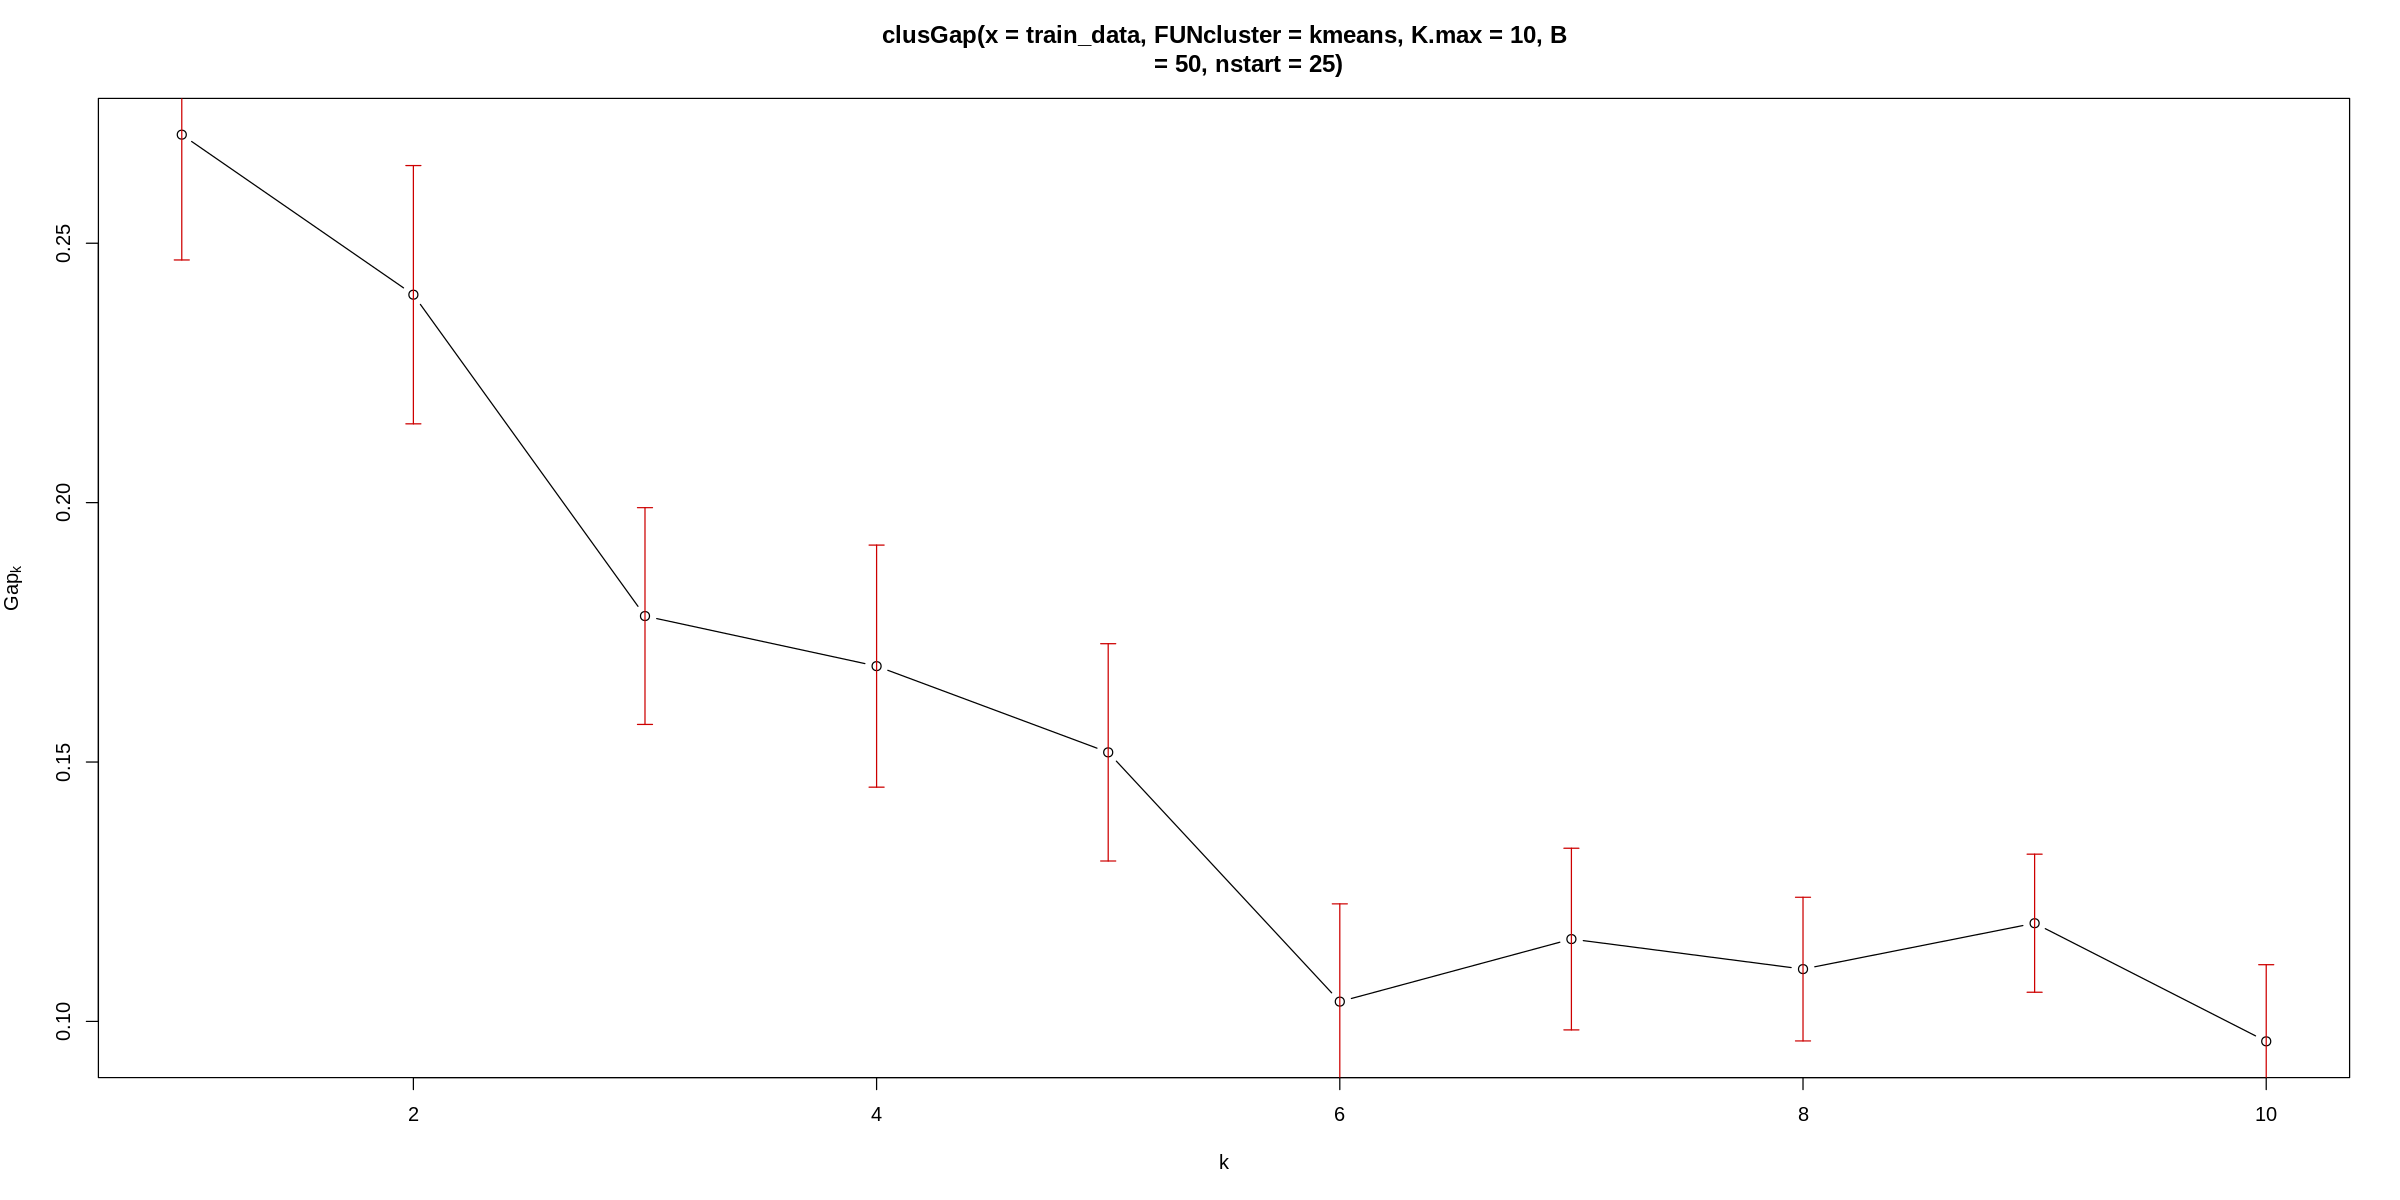

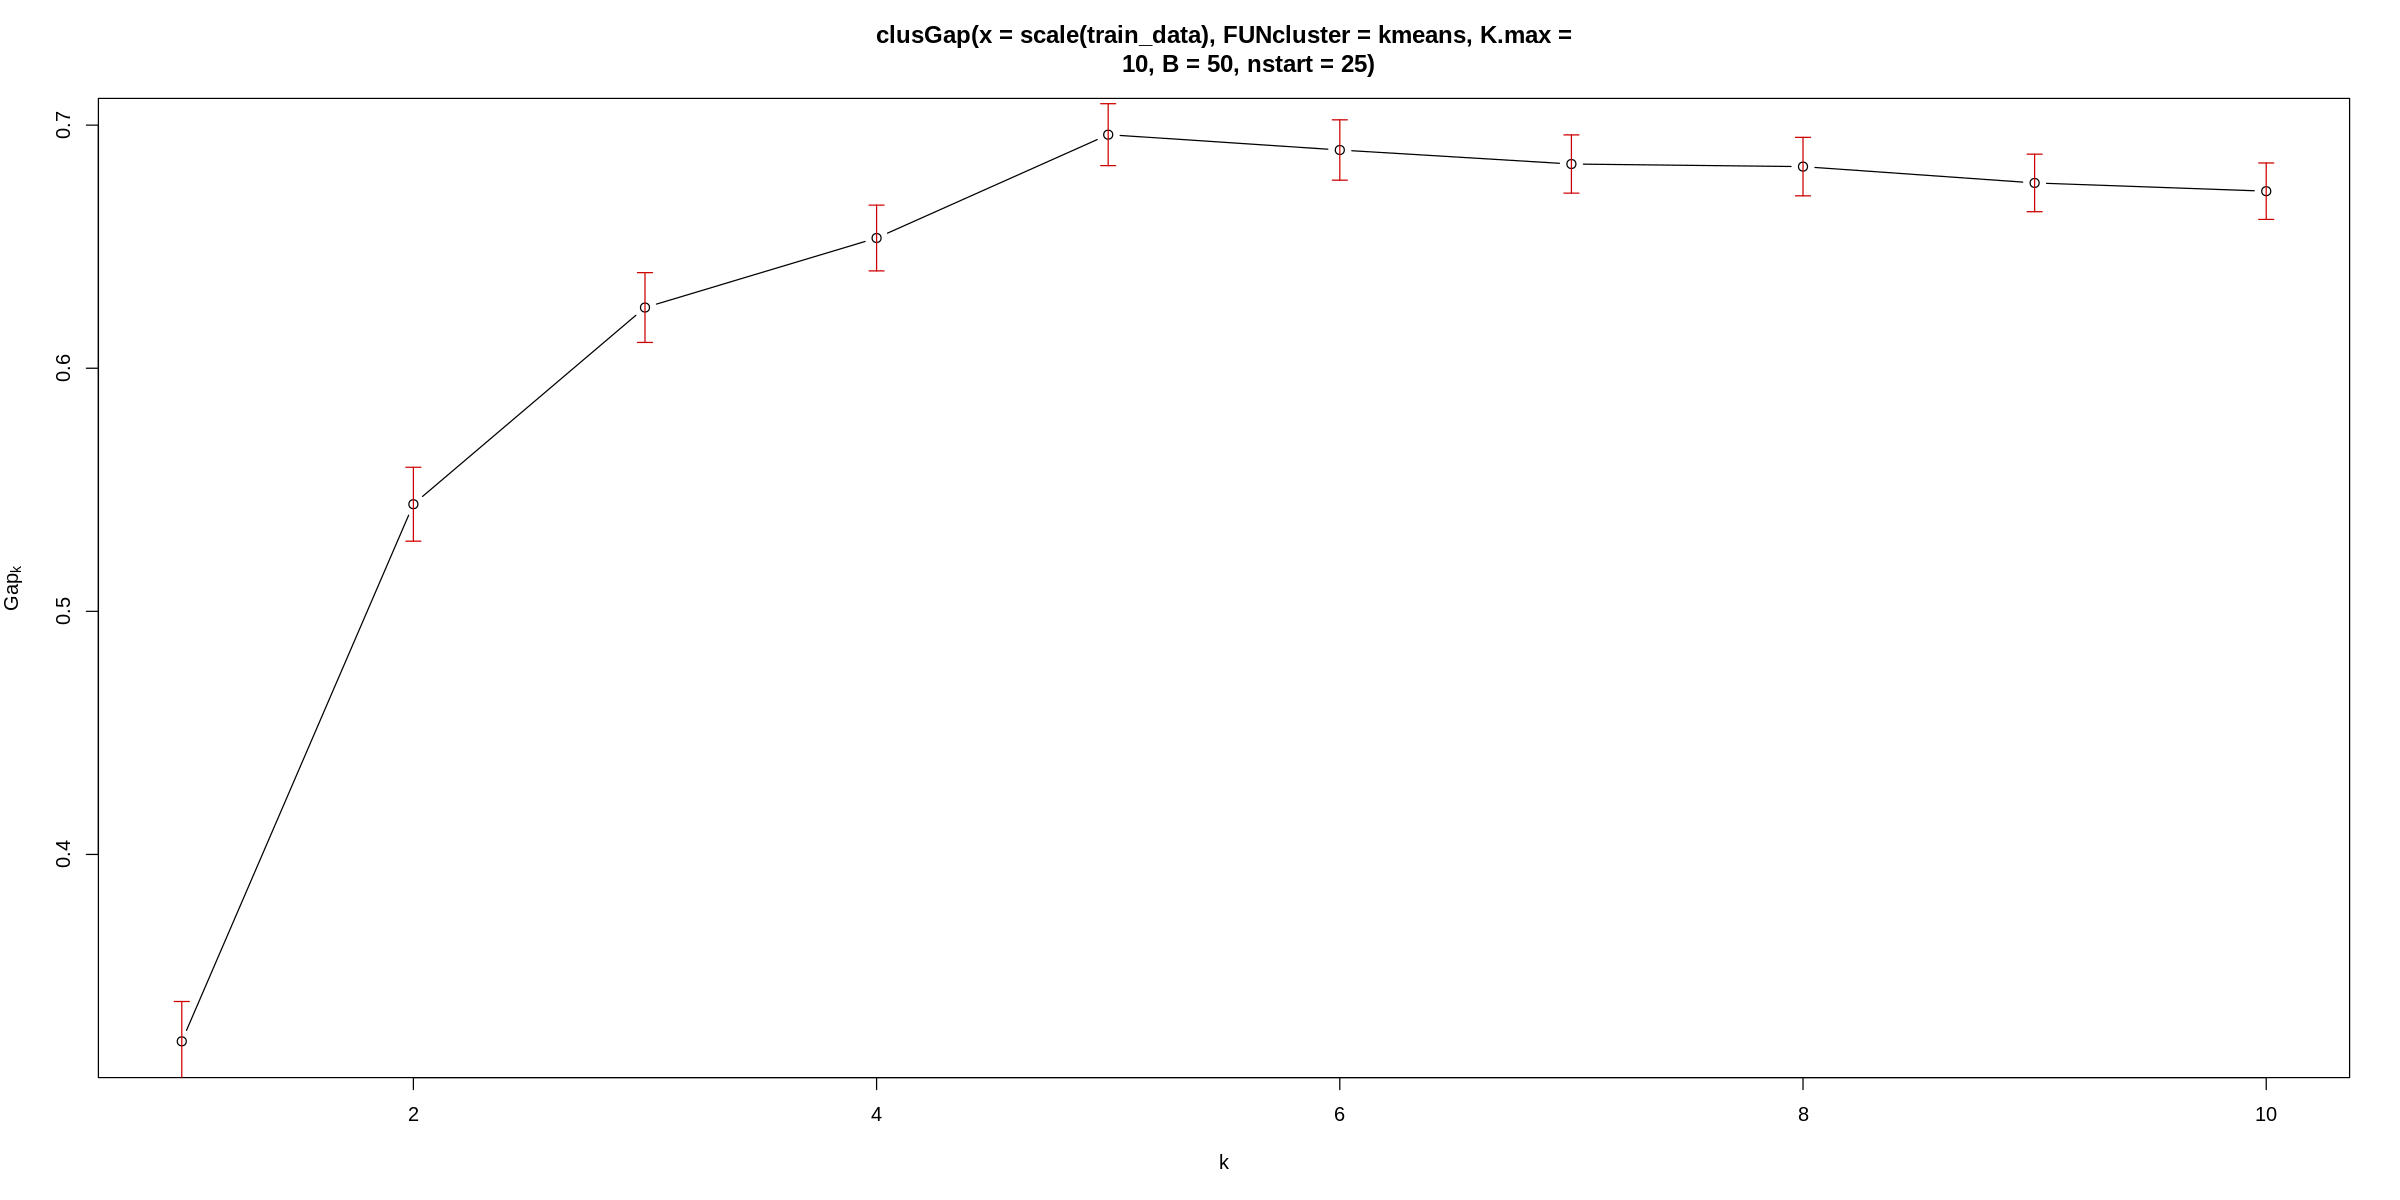

In [28]:

plot(gap_stat)
plot(gap_stat_scale)

penguins_clean$umap_1
[1] "1" "2" "3" "4" "5" "M" "F"
penguins_clean$umap_1
[1] "1" "2" "3" "M" "F"


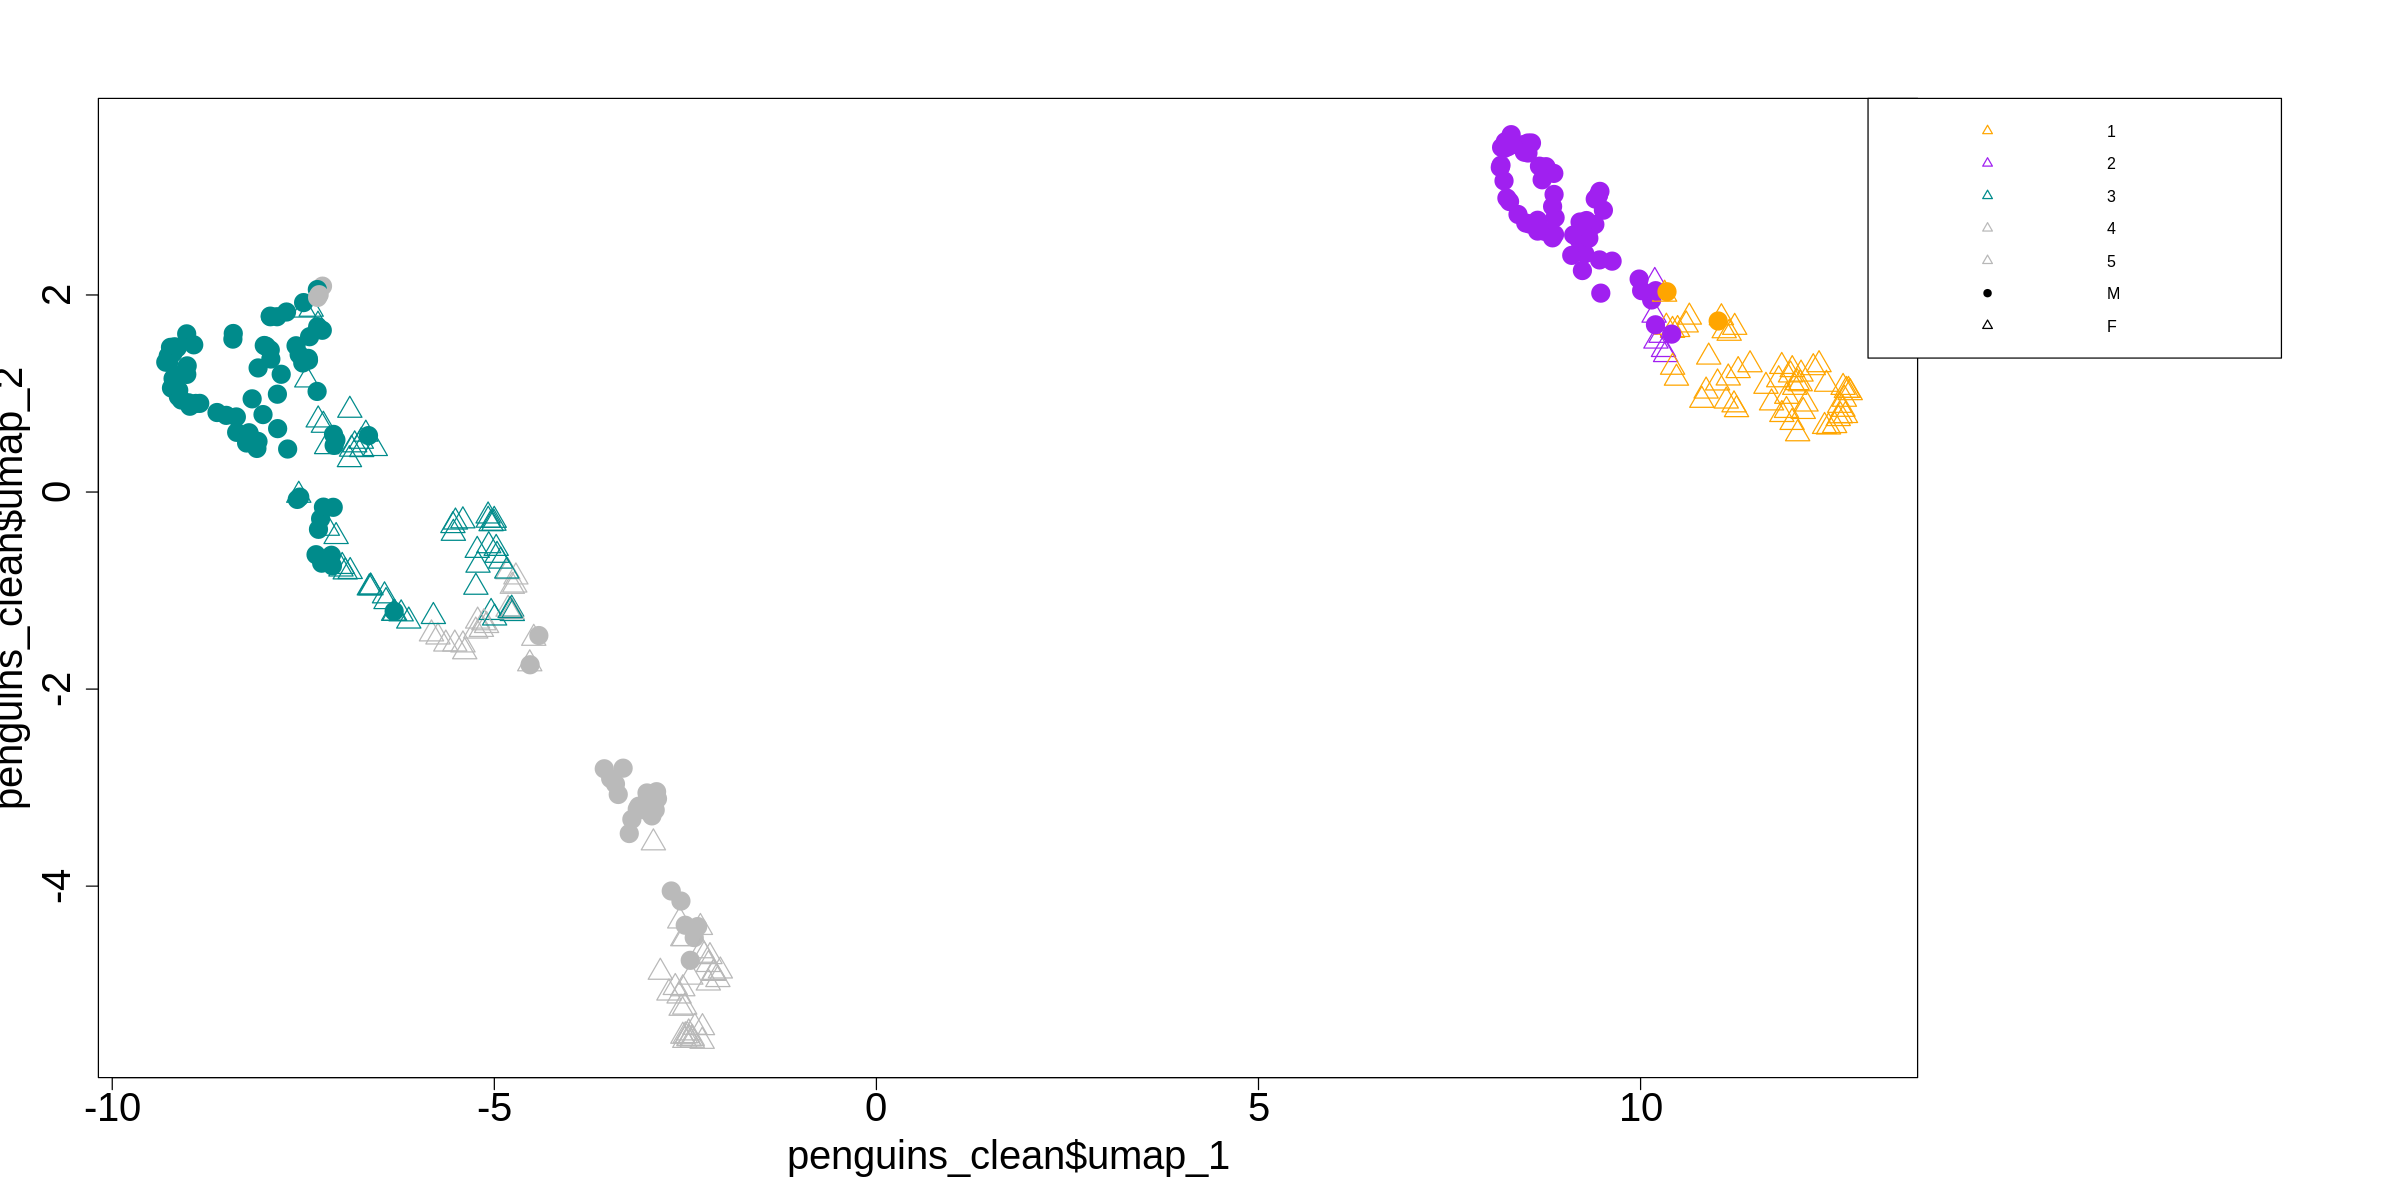

penguins_clean$pca_1
[1] "1" "2" "3" "4" "5" "M" "F"


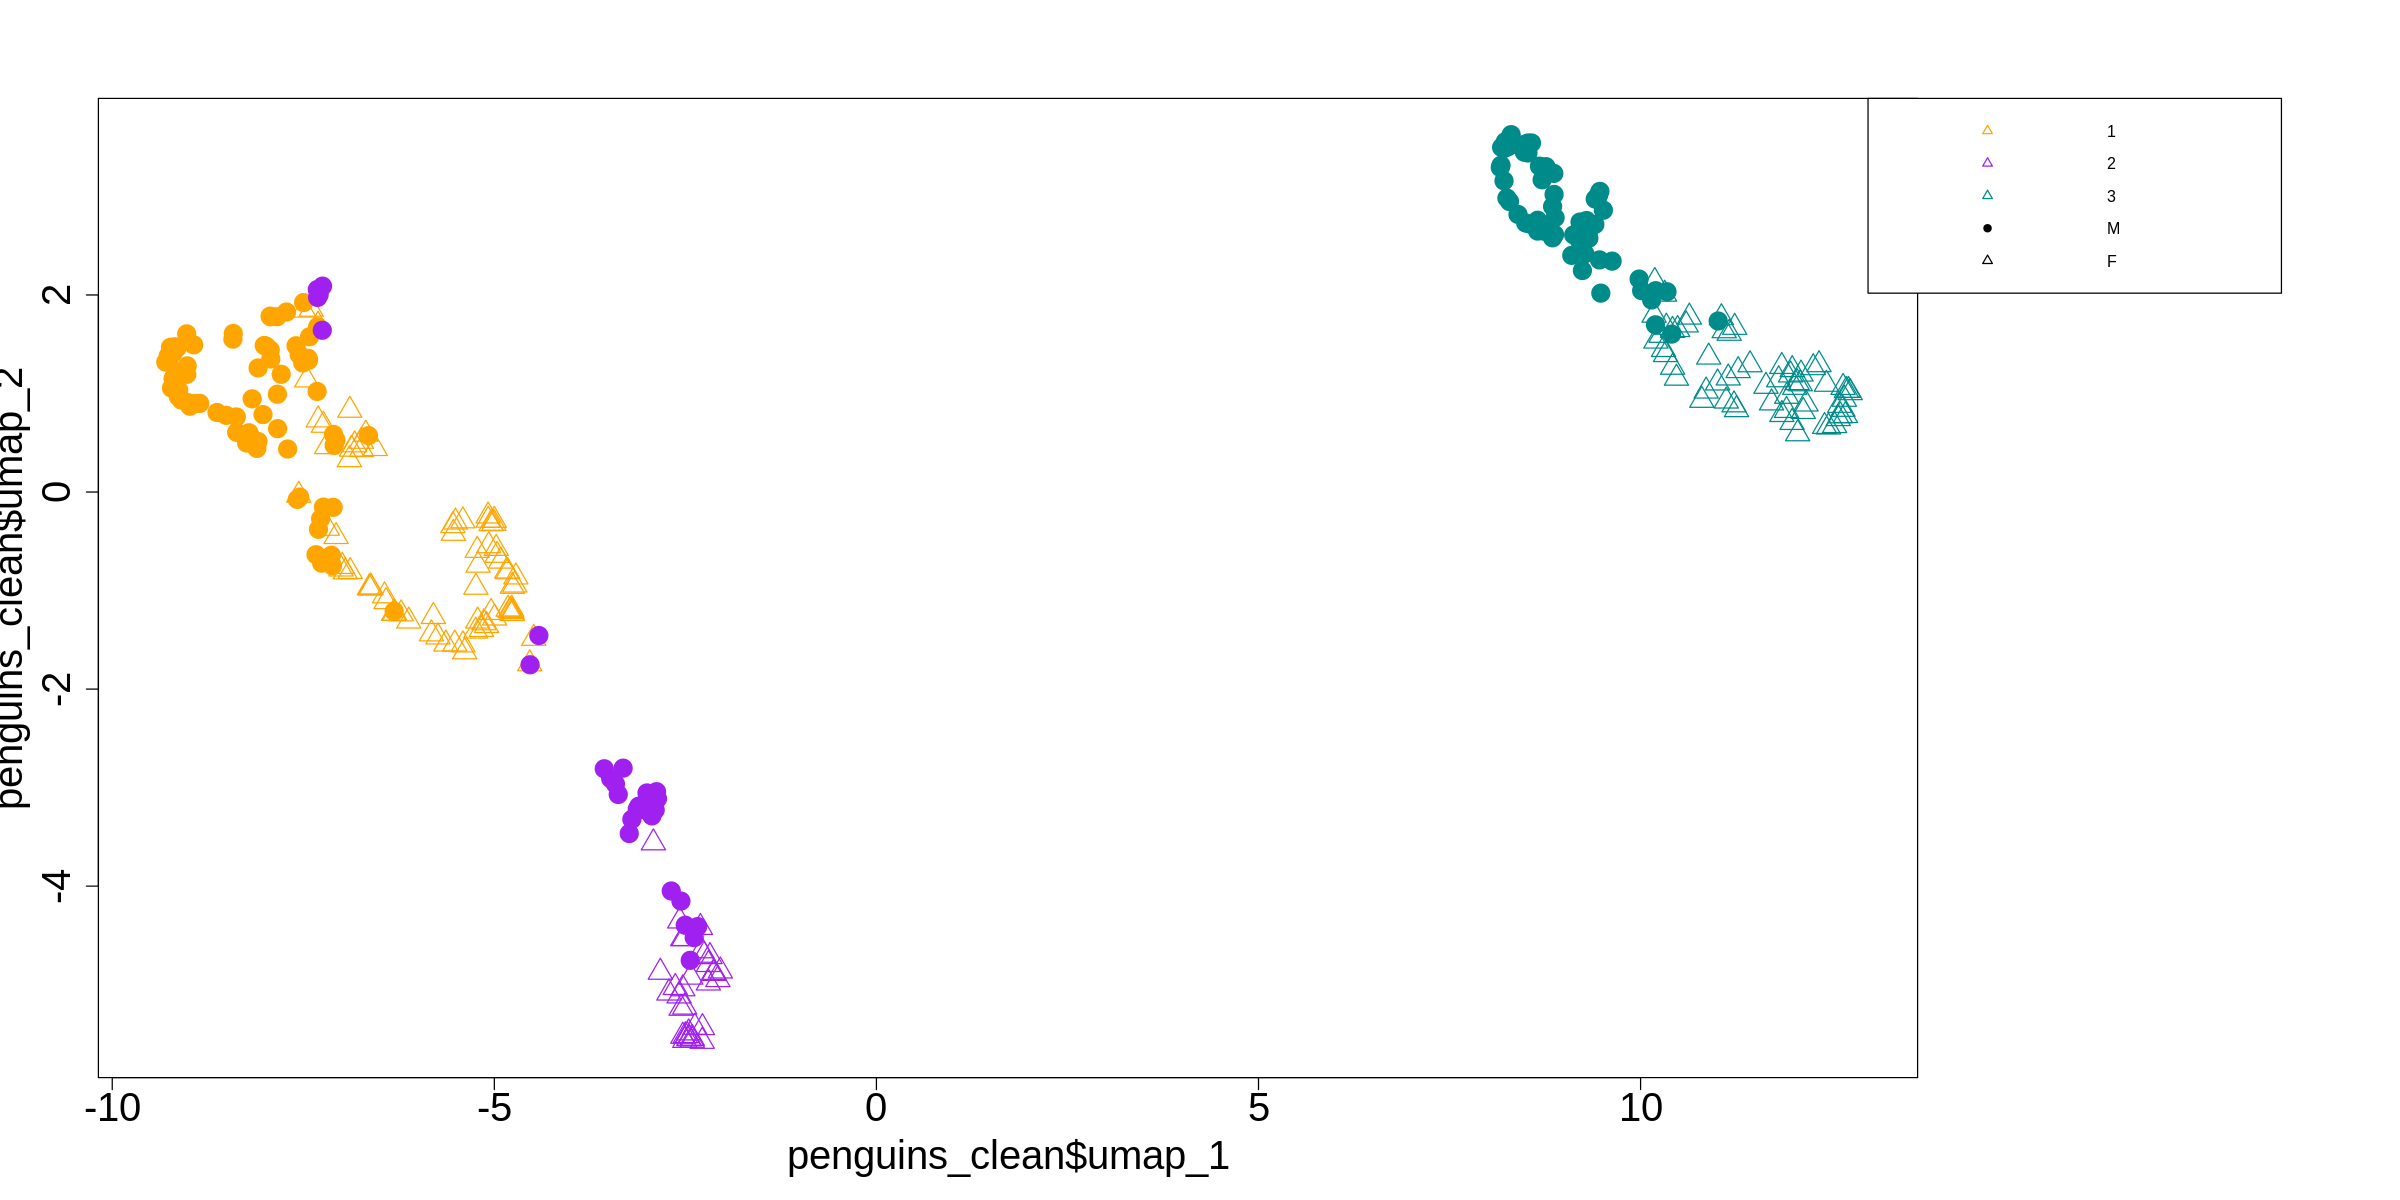

penguins_clean$pca_1
[1] "1" "2" "3" "M" "F"


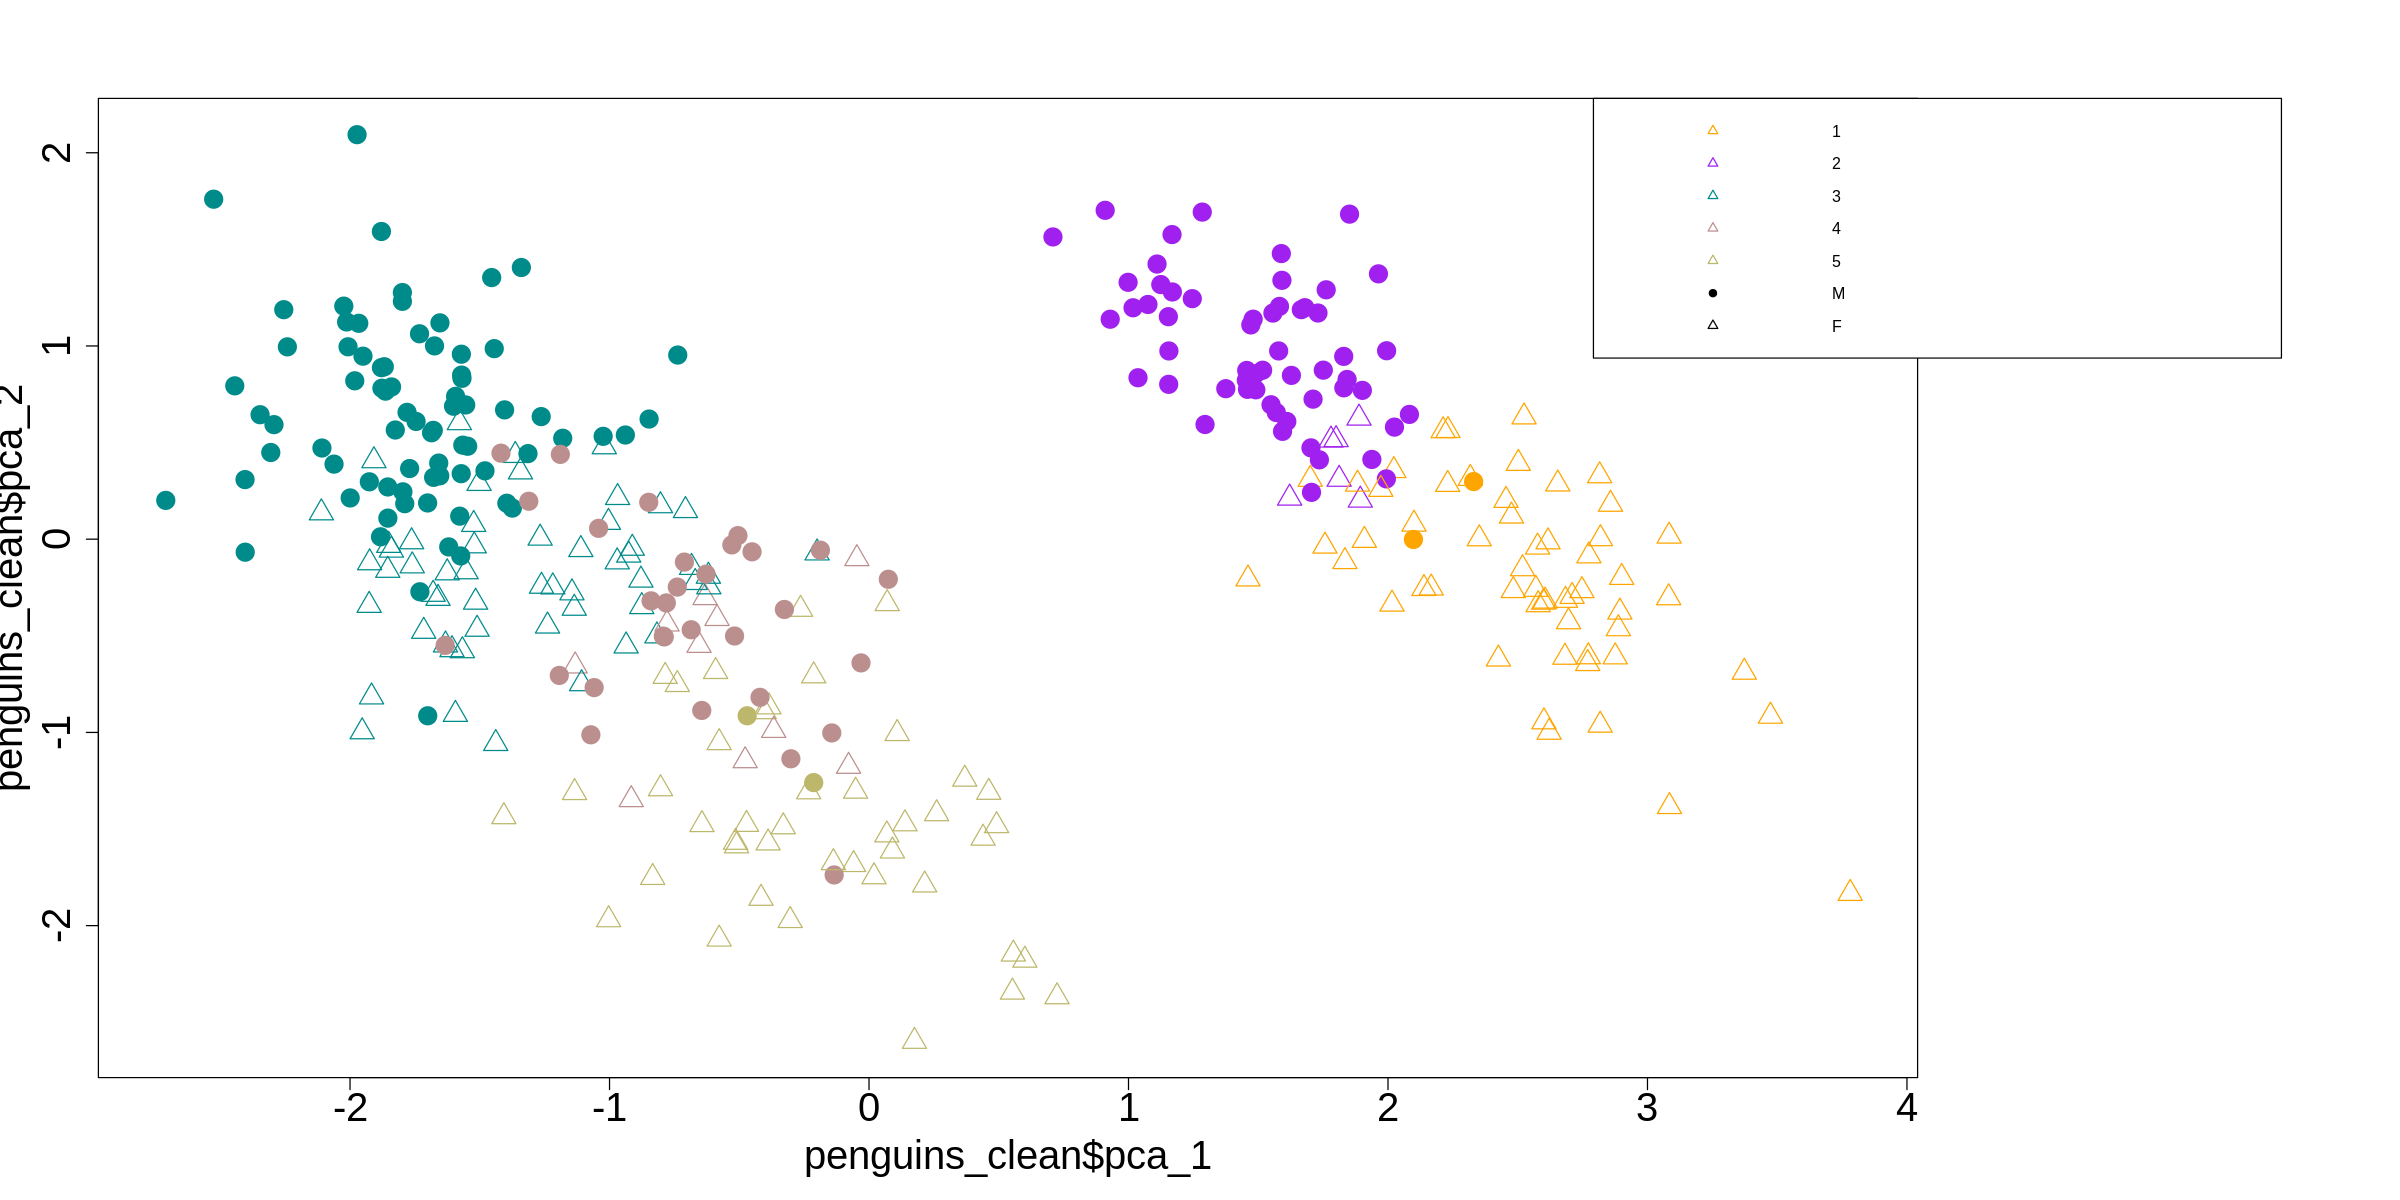

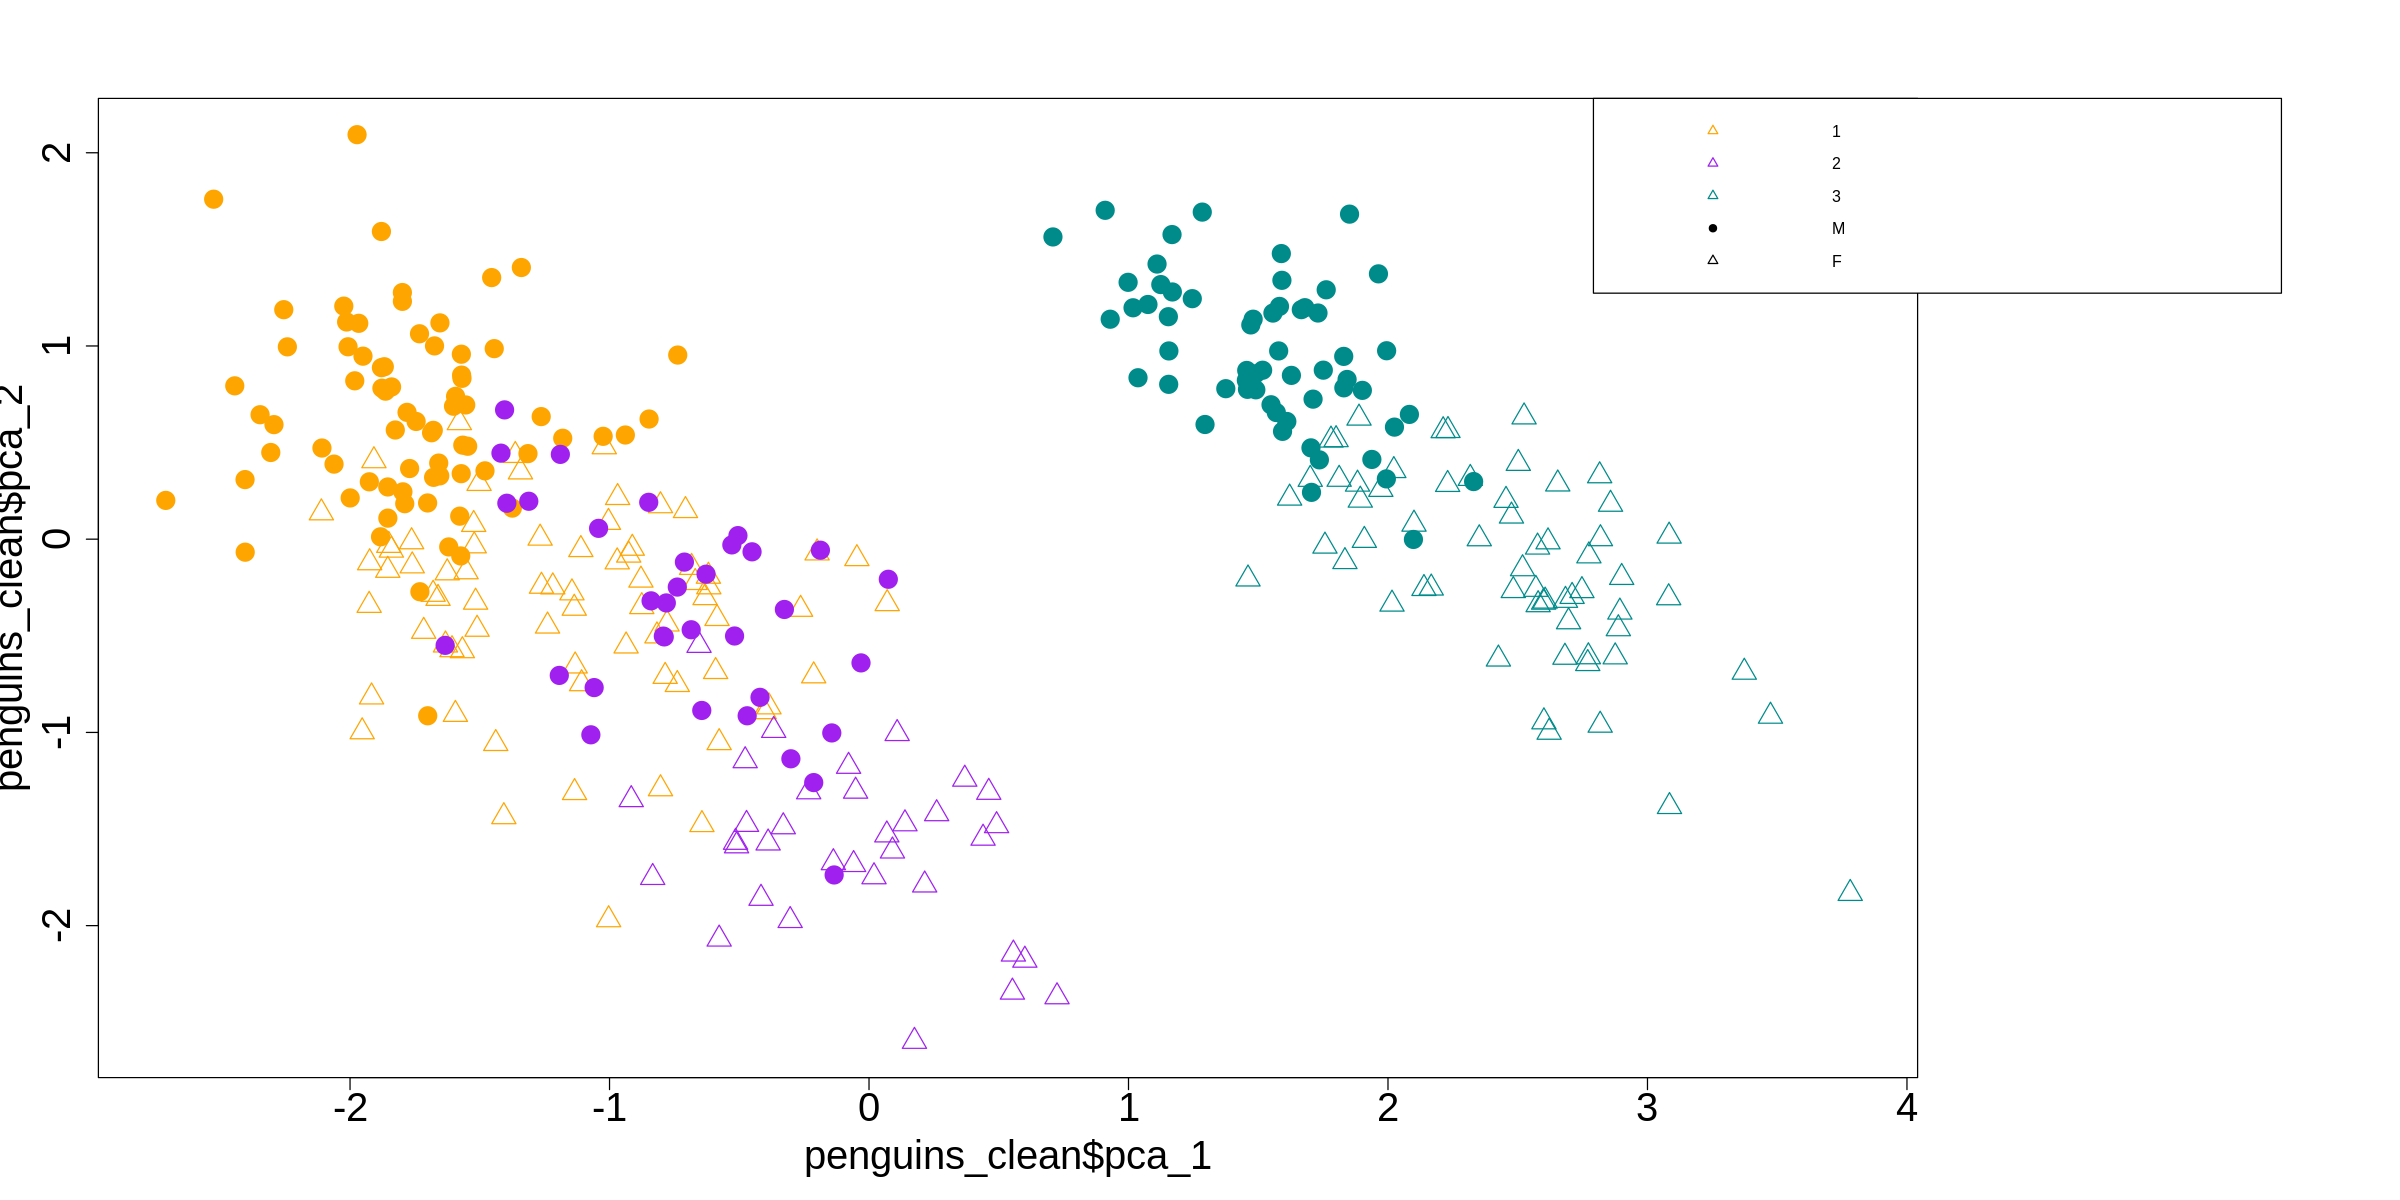

In [29]:
plot_penguins(penguins_clean$umap_1,penguins_clean$umap_2,z=k_means_5$cluster)
plot_penguins(penguins_clean$umap_1,penguins_clean$umap_2,z=penguins_clean$species)


plot_penguins(penguins_clean$pca_1,penguins_clean$pca_2,z=k_means_5$cluster)
plot_penguins(penguins_clean$pca_1,penguins_clean$pca_2,z=penguins_clean$species)


# Dimensionality and clustering

In [30]:
#Dimensionality

train_data_big<-train_data
train_data_big$r1 <-rnorm(nrow(train_data))
train_data_big$r2 <-rnorm(nrow(train_data))
train_data_big$r3 <-rnorm(nrow(train_data))
train_data_big$r4 <-rnorm(nrow(train_data))
train_data_big$r5 <-rnorm(nrow(train_data))
train_data_big$r6 <-rnorm(nrow(train_data))
train_data_big$r7 <-rnorm(nrow(train_data))
train_data_big$r8 <-rnorm(nrow(train_data))
train_data_big$r9 <-rnorm(nrow(train_data))
train_data_big$r10 <-rnorm(nrow(train_data))


gap_stat_norm <- clusGap(scale(train_data_big), FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)


pca_out=prcomp(scale(train_data_big),scale=TRUE)
gap_stat_pca <- clusGap(pca_out$x[,1:2], FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)

umap_out<-umap(scale(train_data_big),n_components = 2)
gap_stat_umap <- clusGap(umap_out, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 500)




Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"


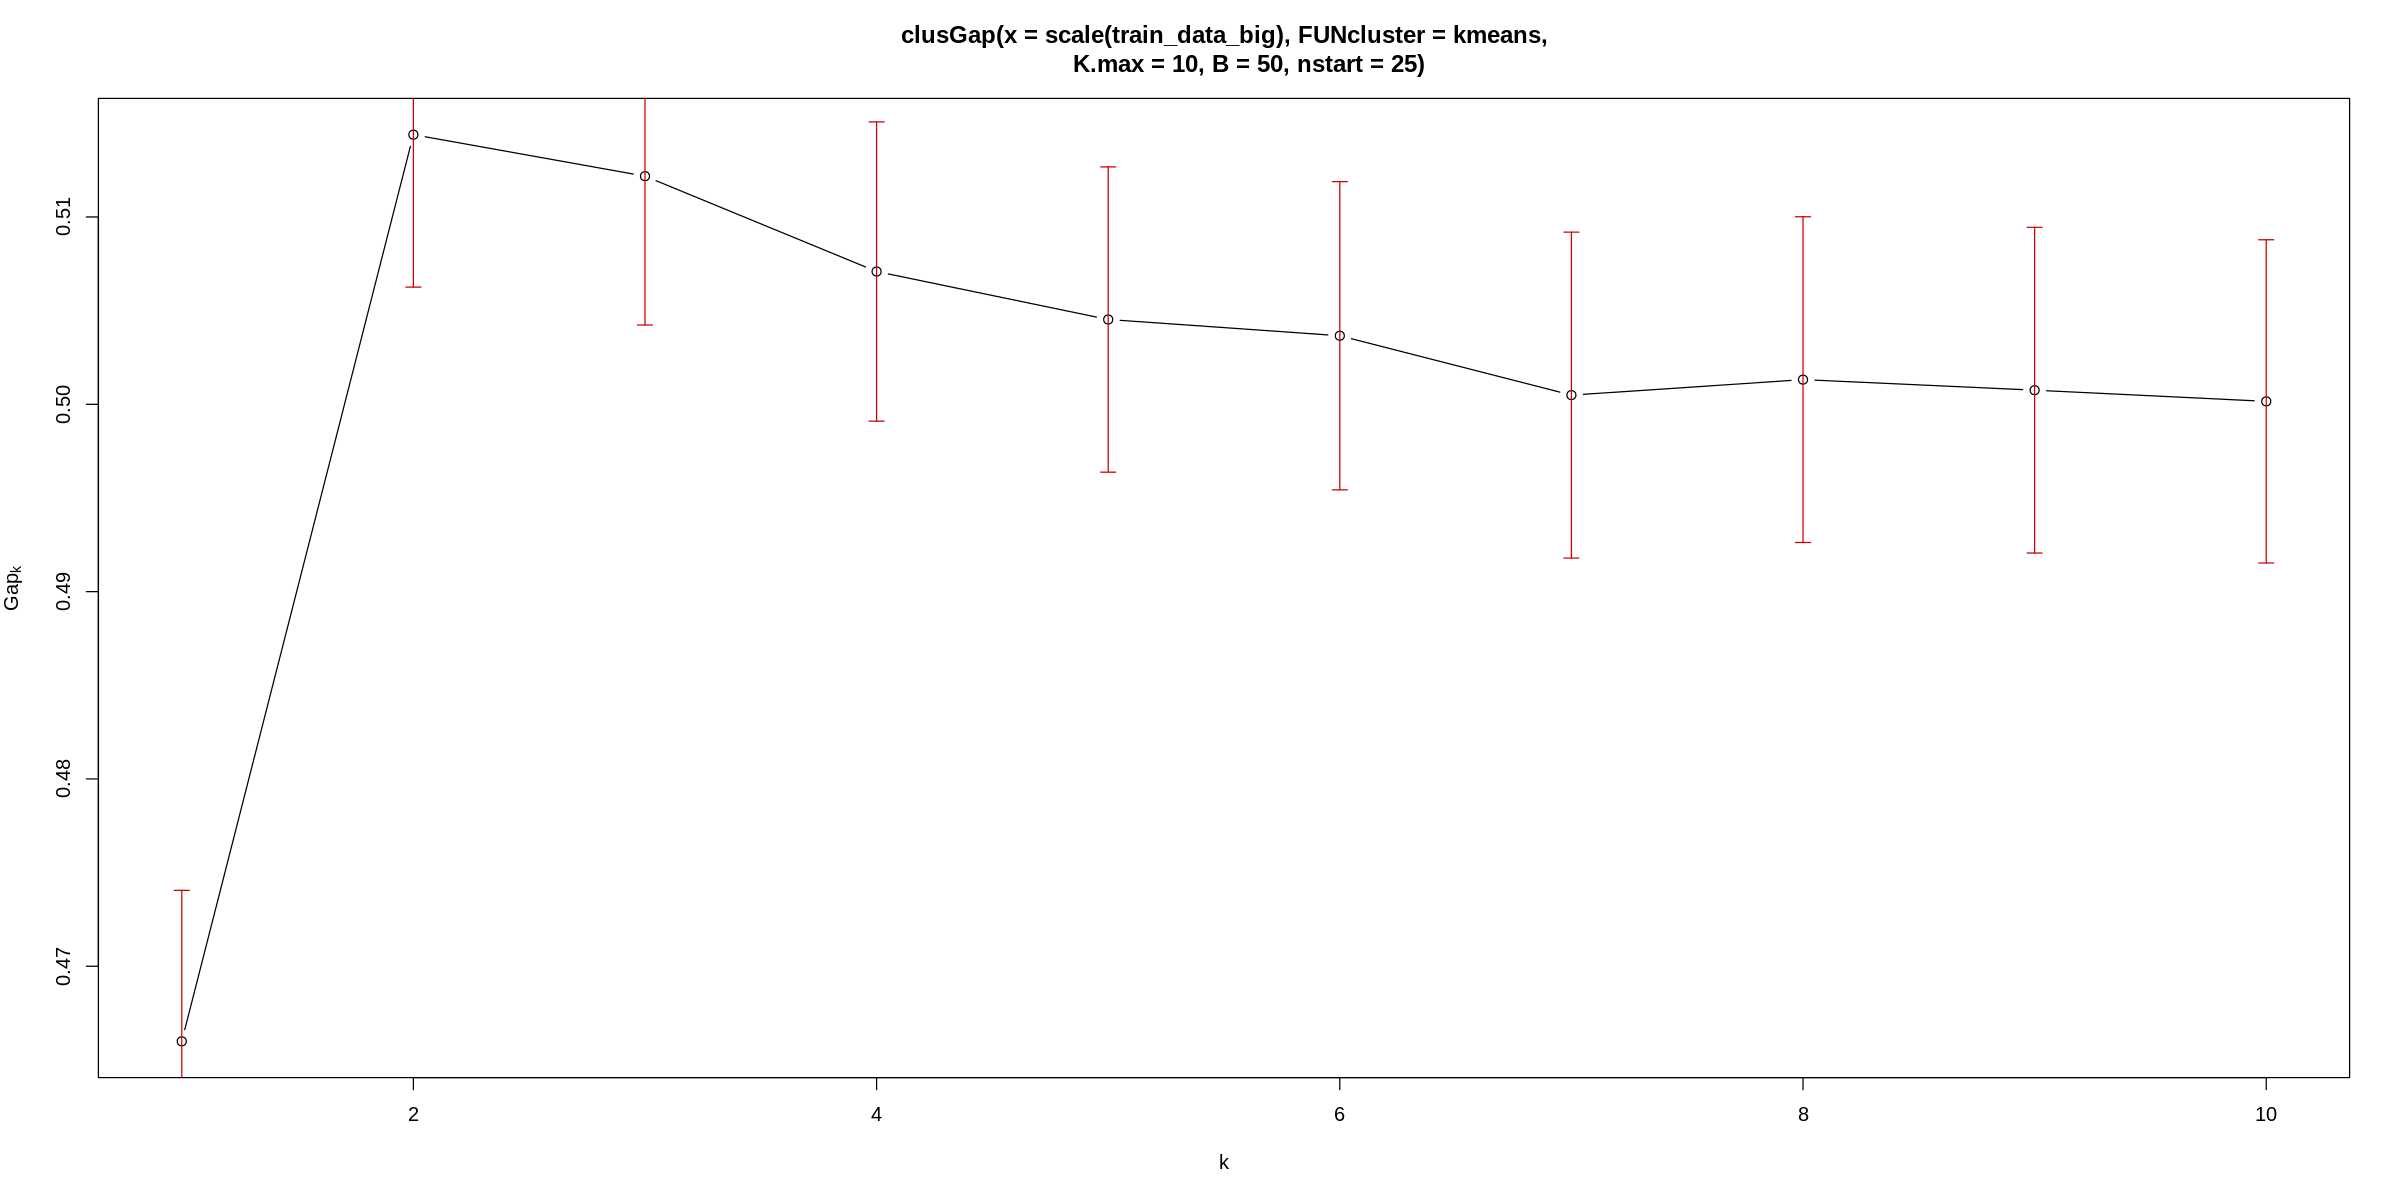

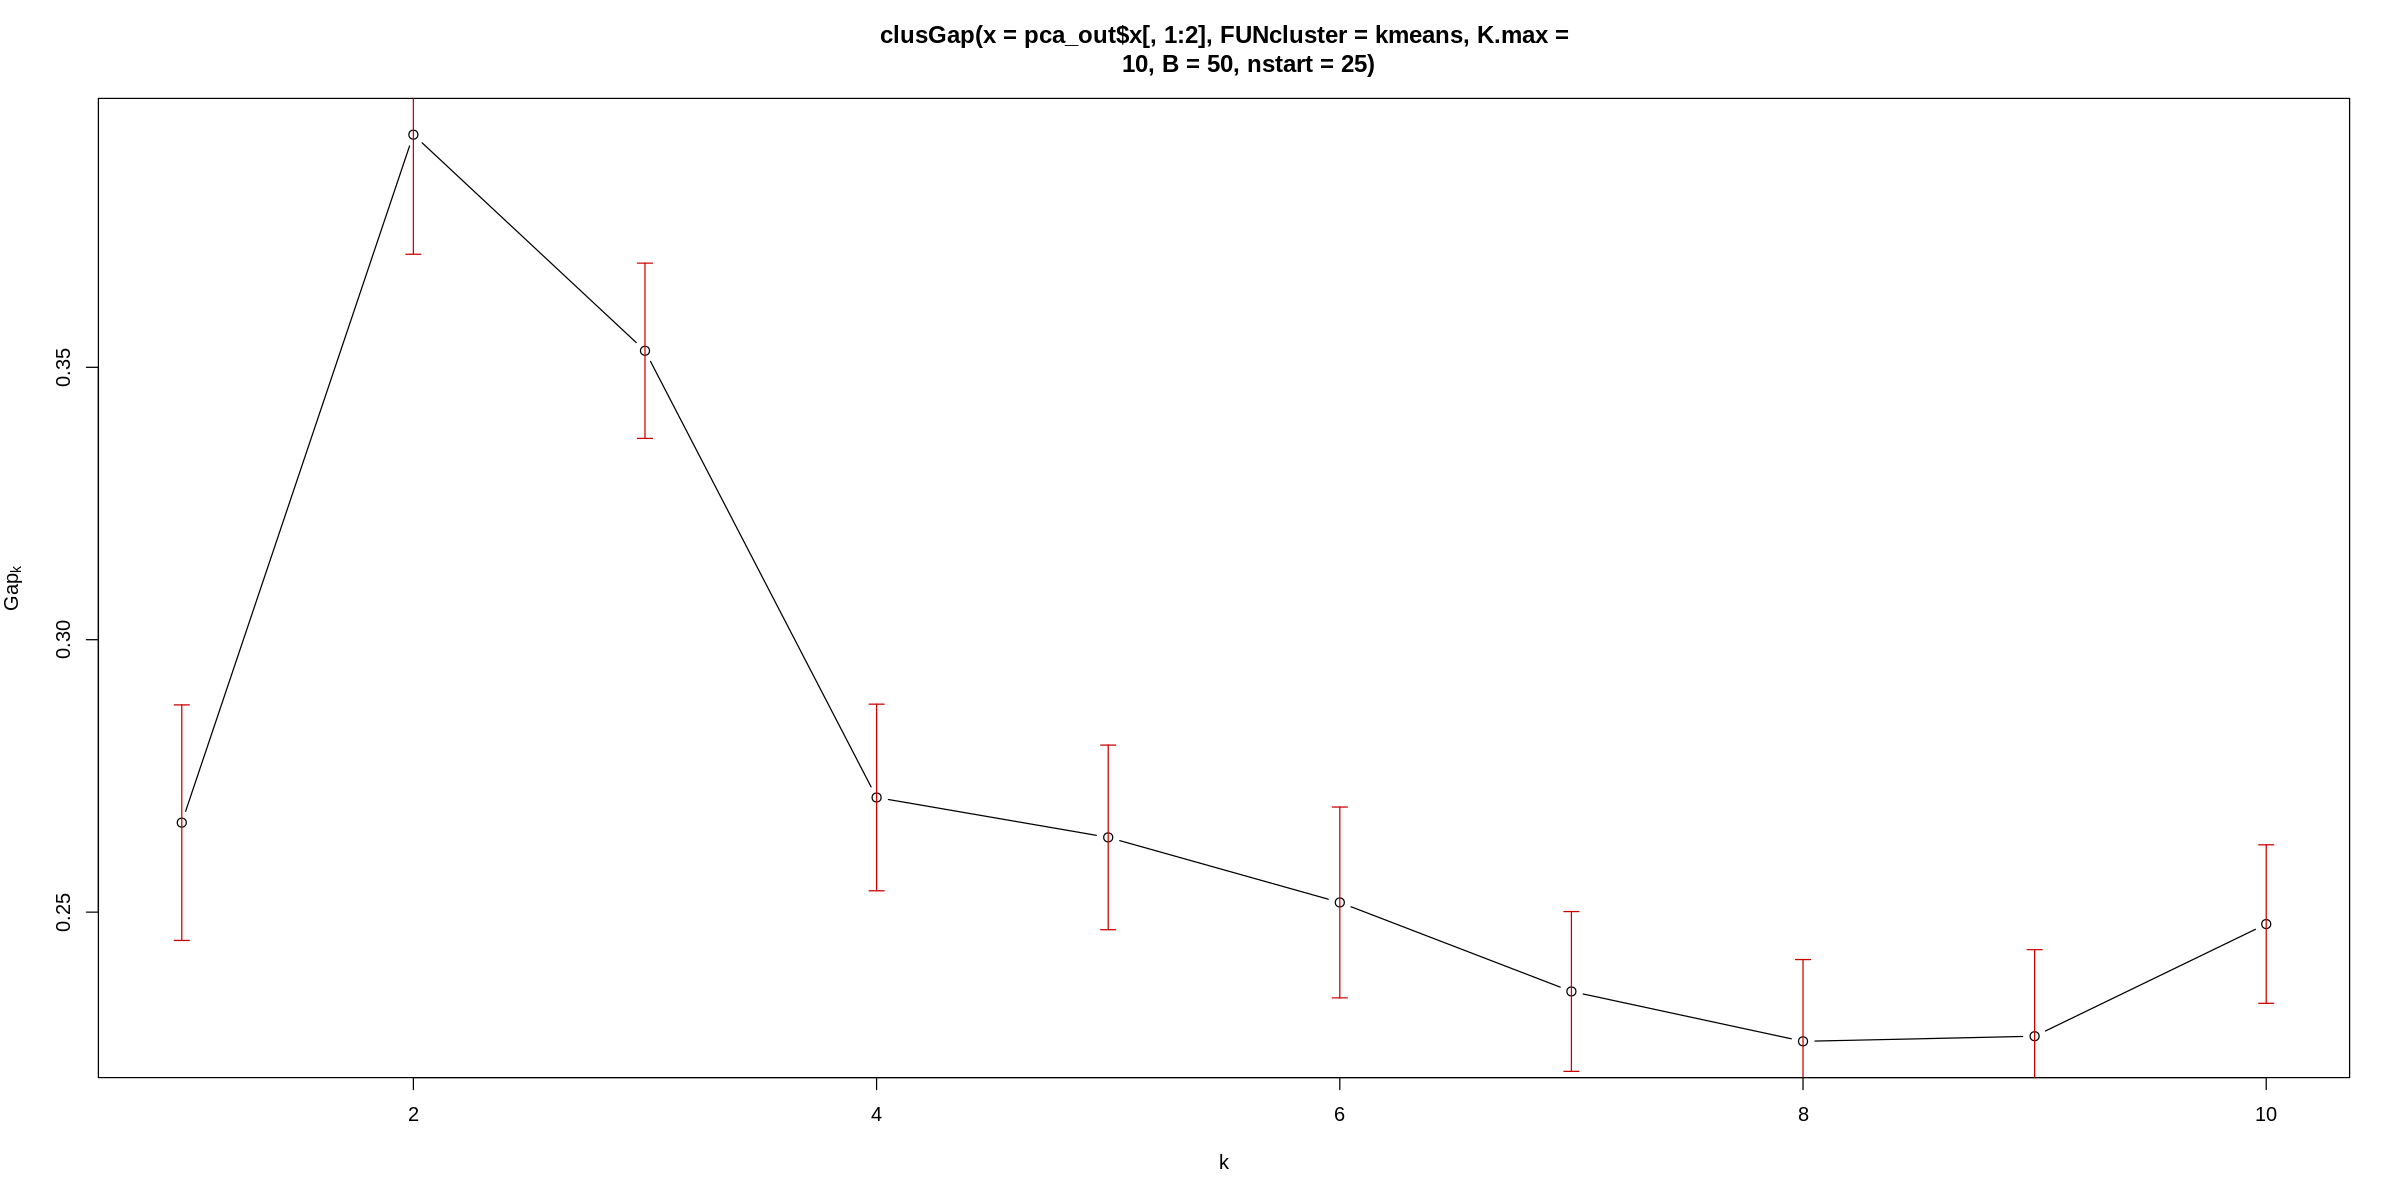

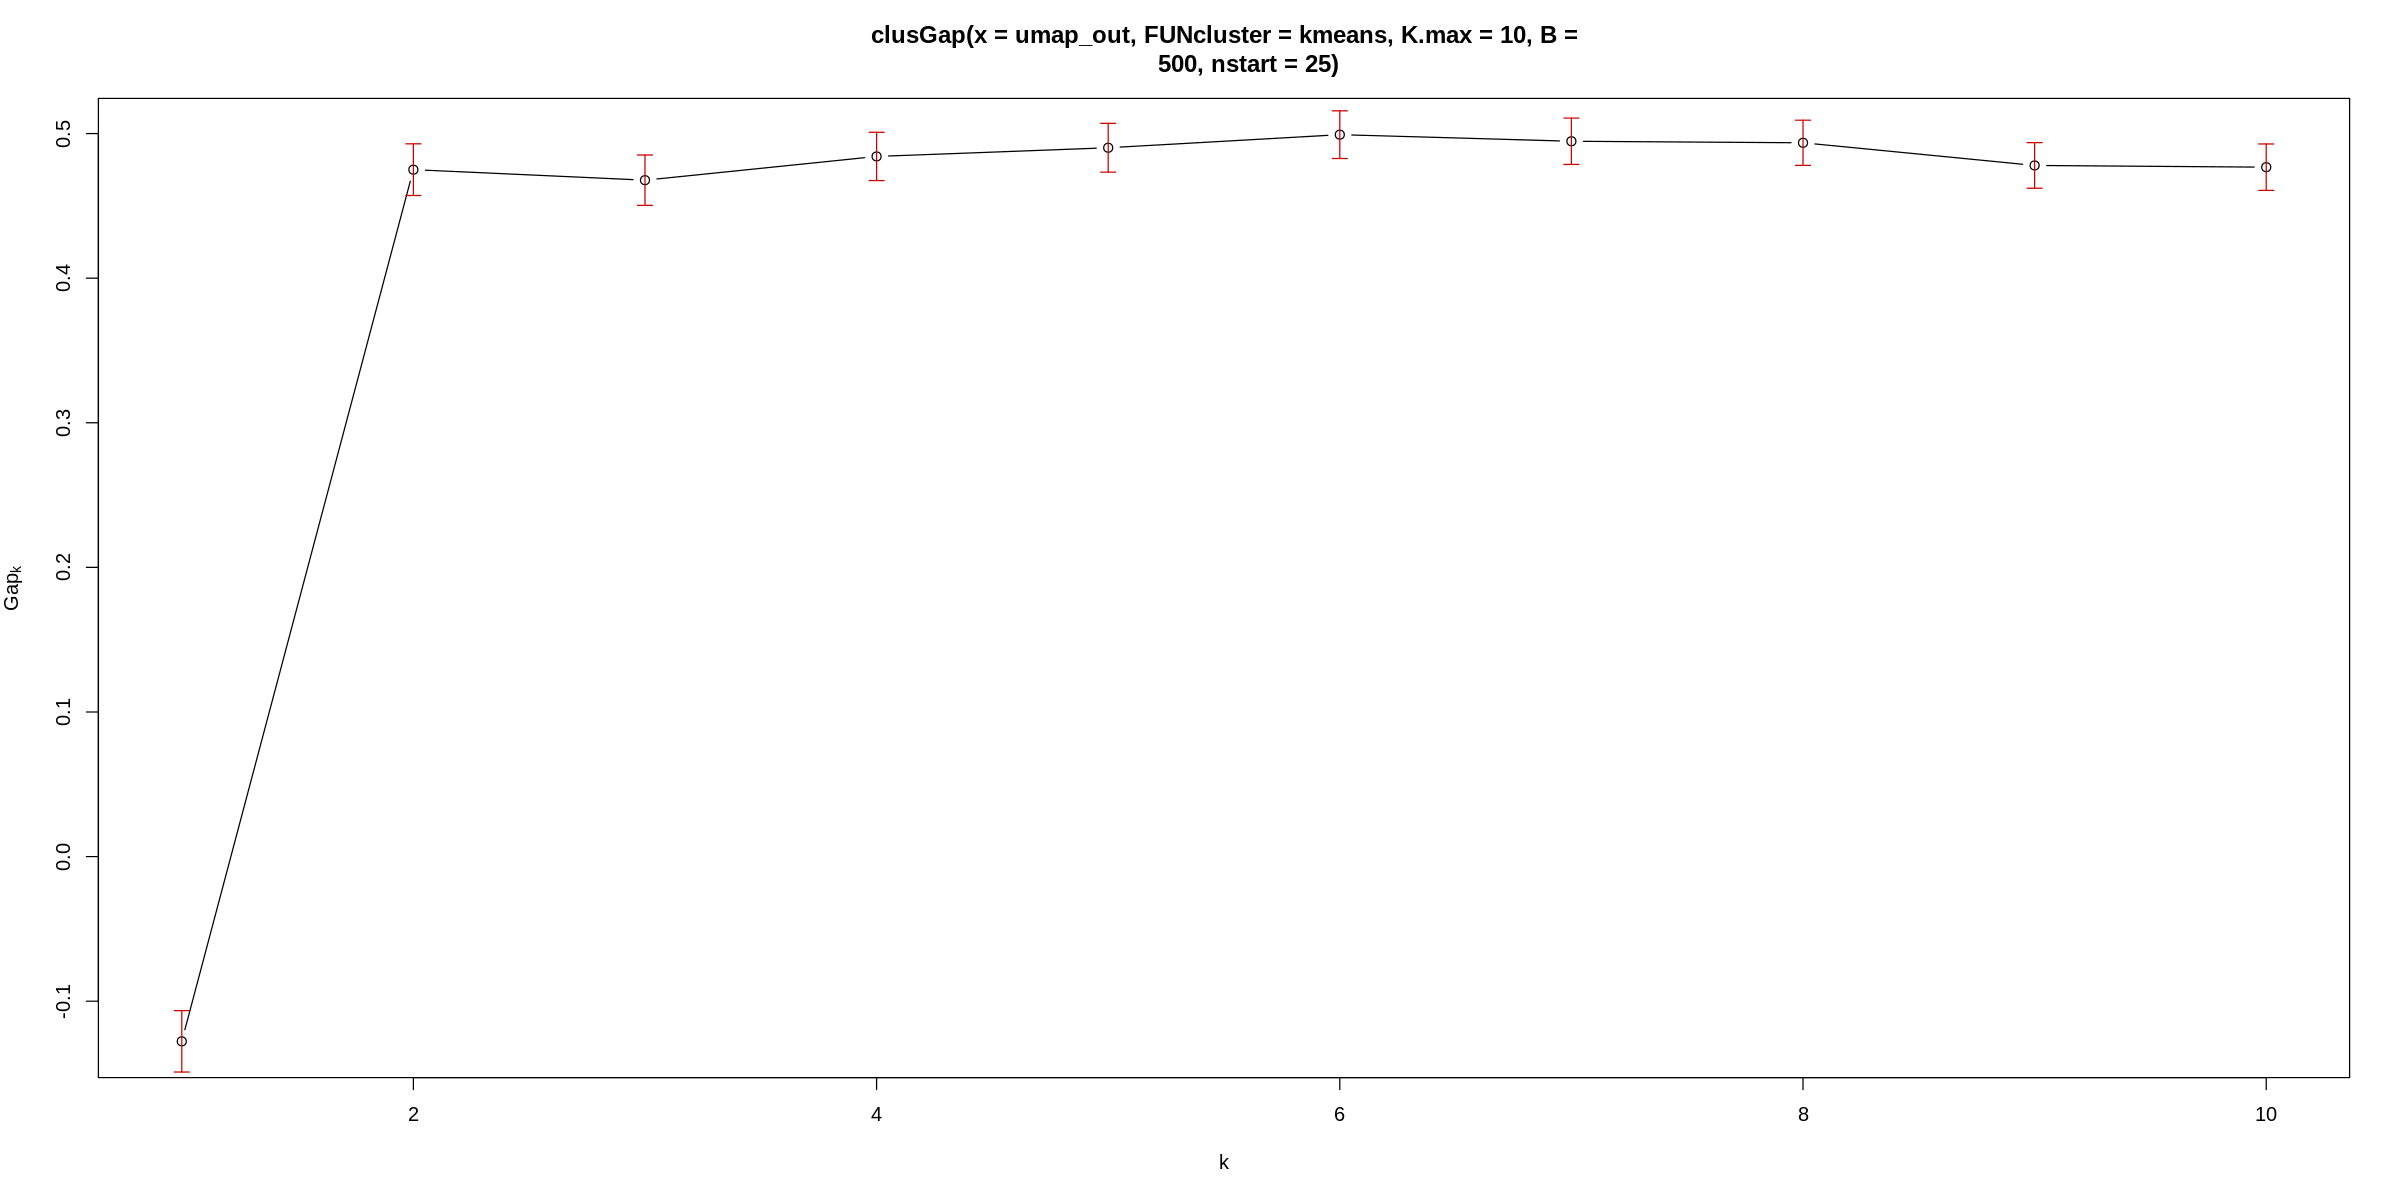

In [31]:
plot(gap_stat_norm)
plot(gap_stat_pca)
plot(gap_stat_umap)


[1] 2
[1] 3


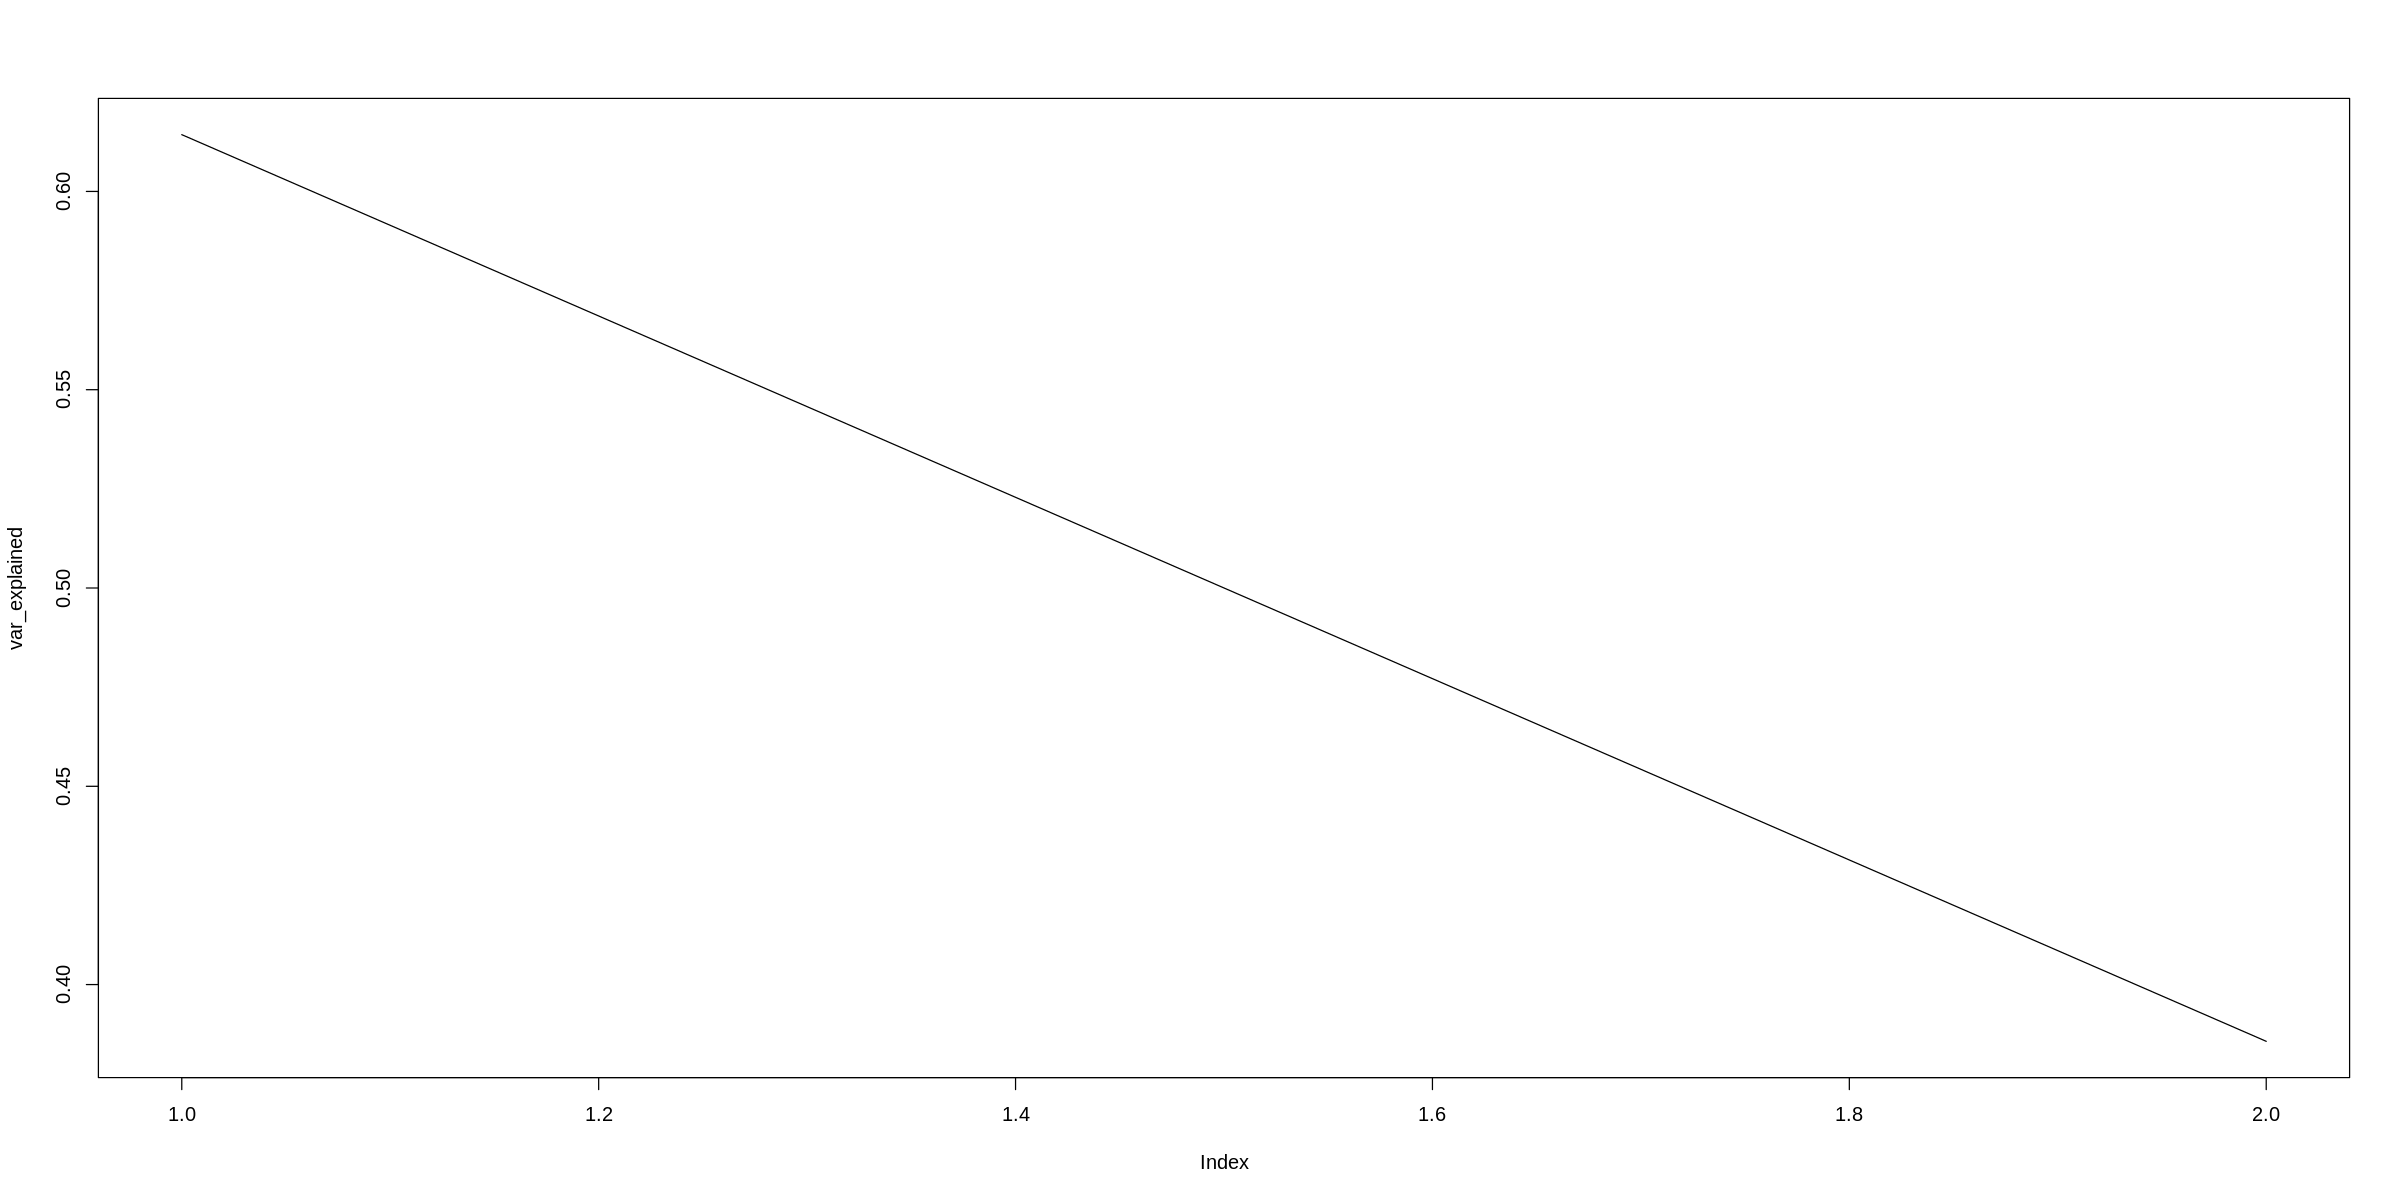

[1] 4


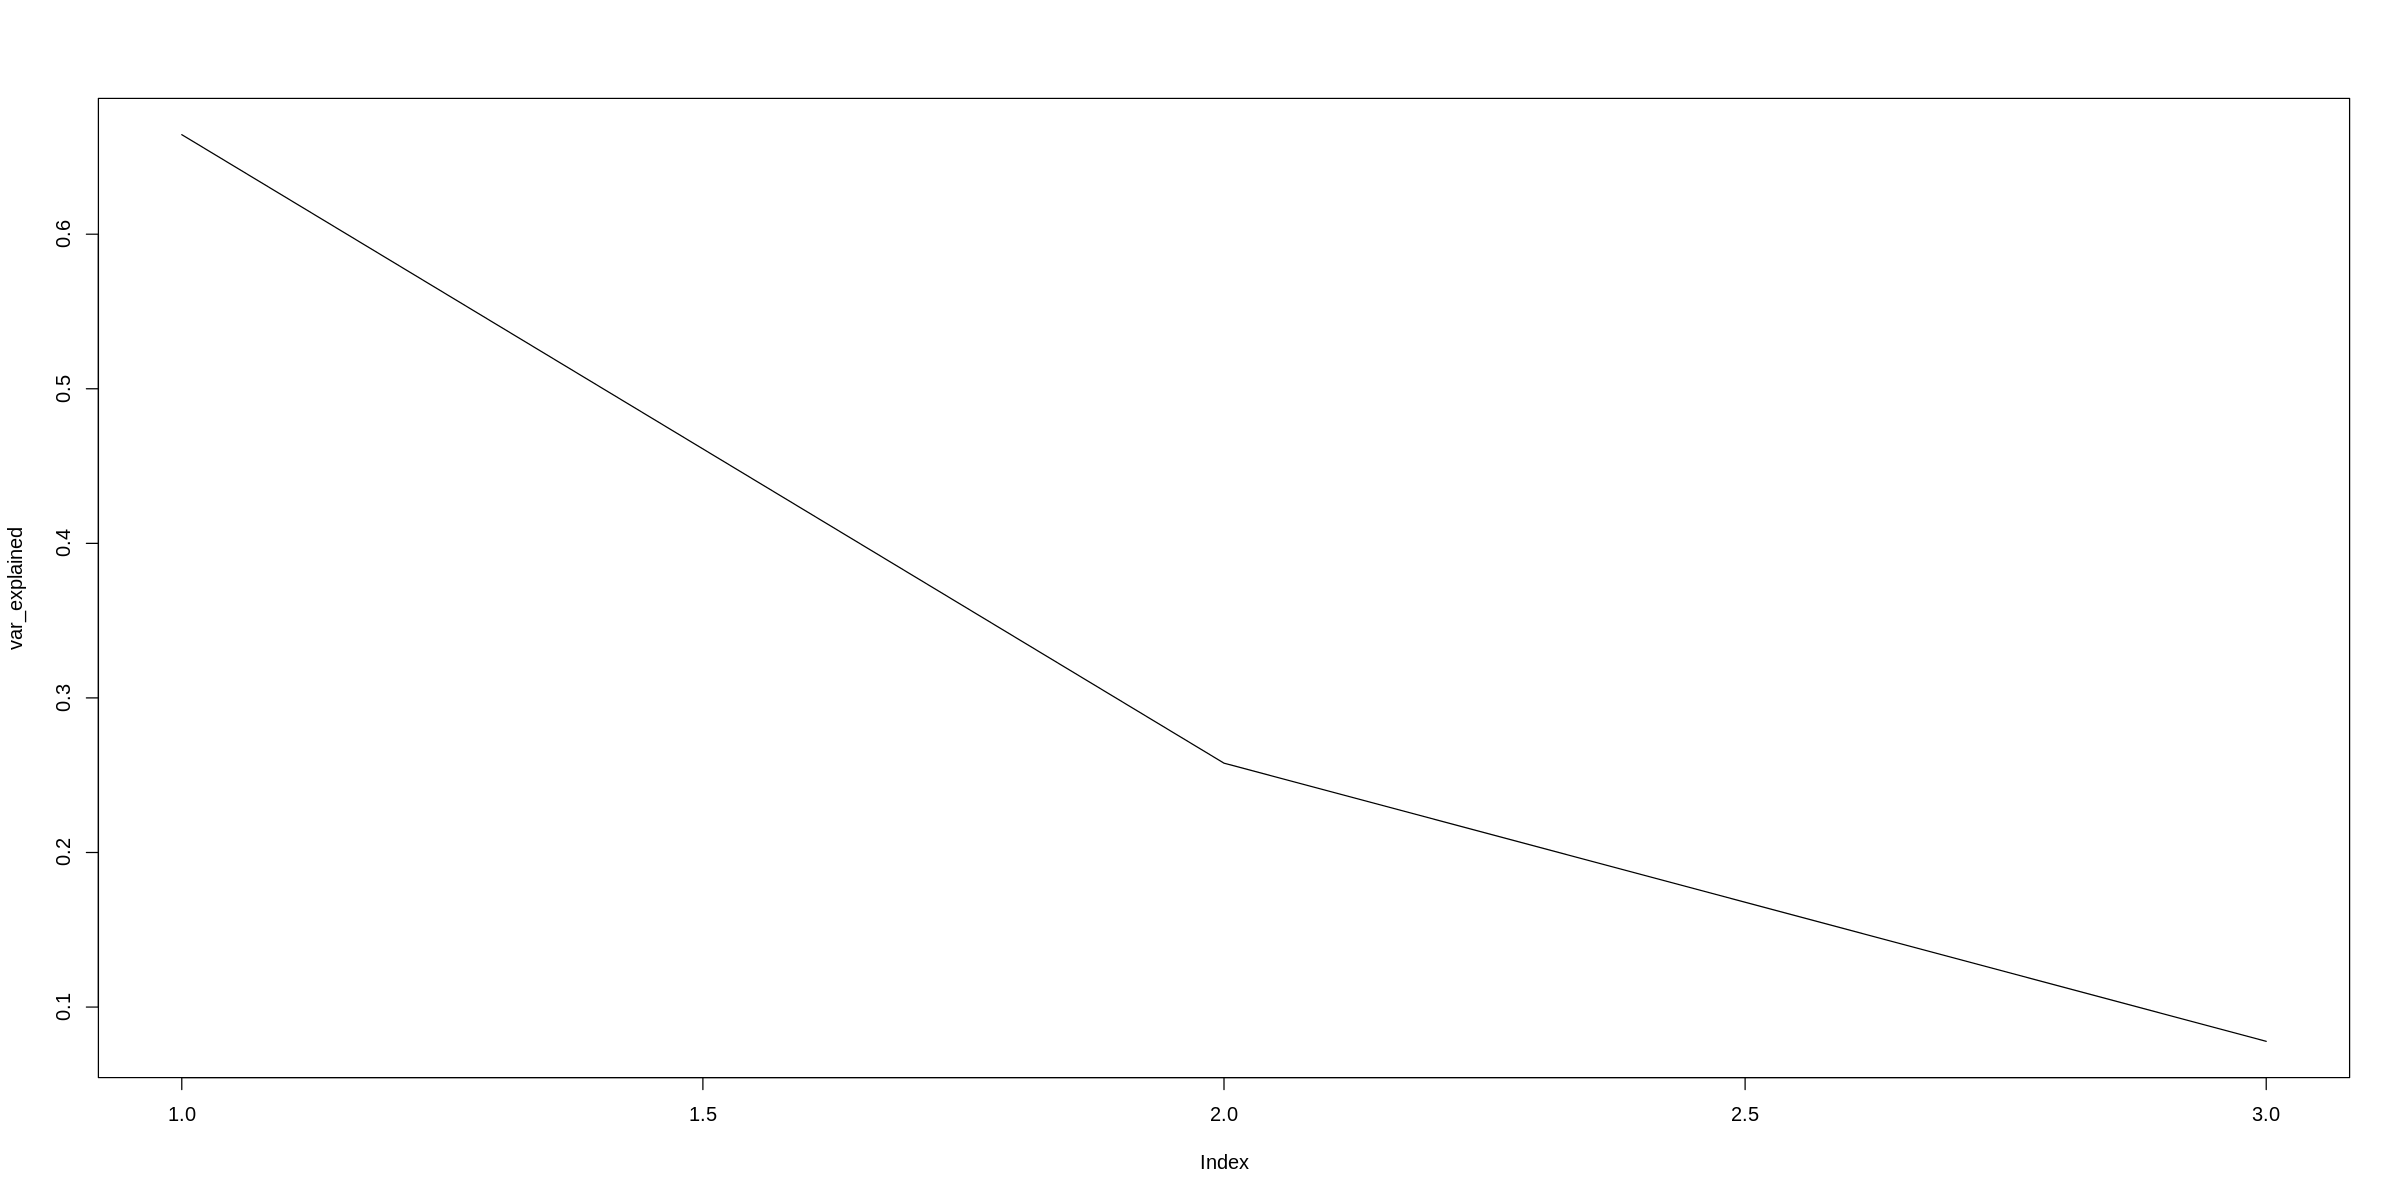

[1] 5


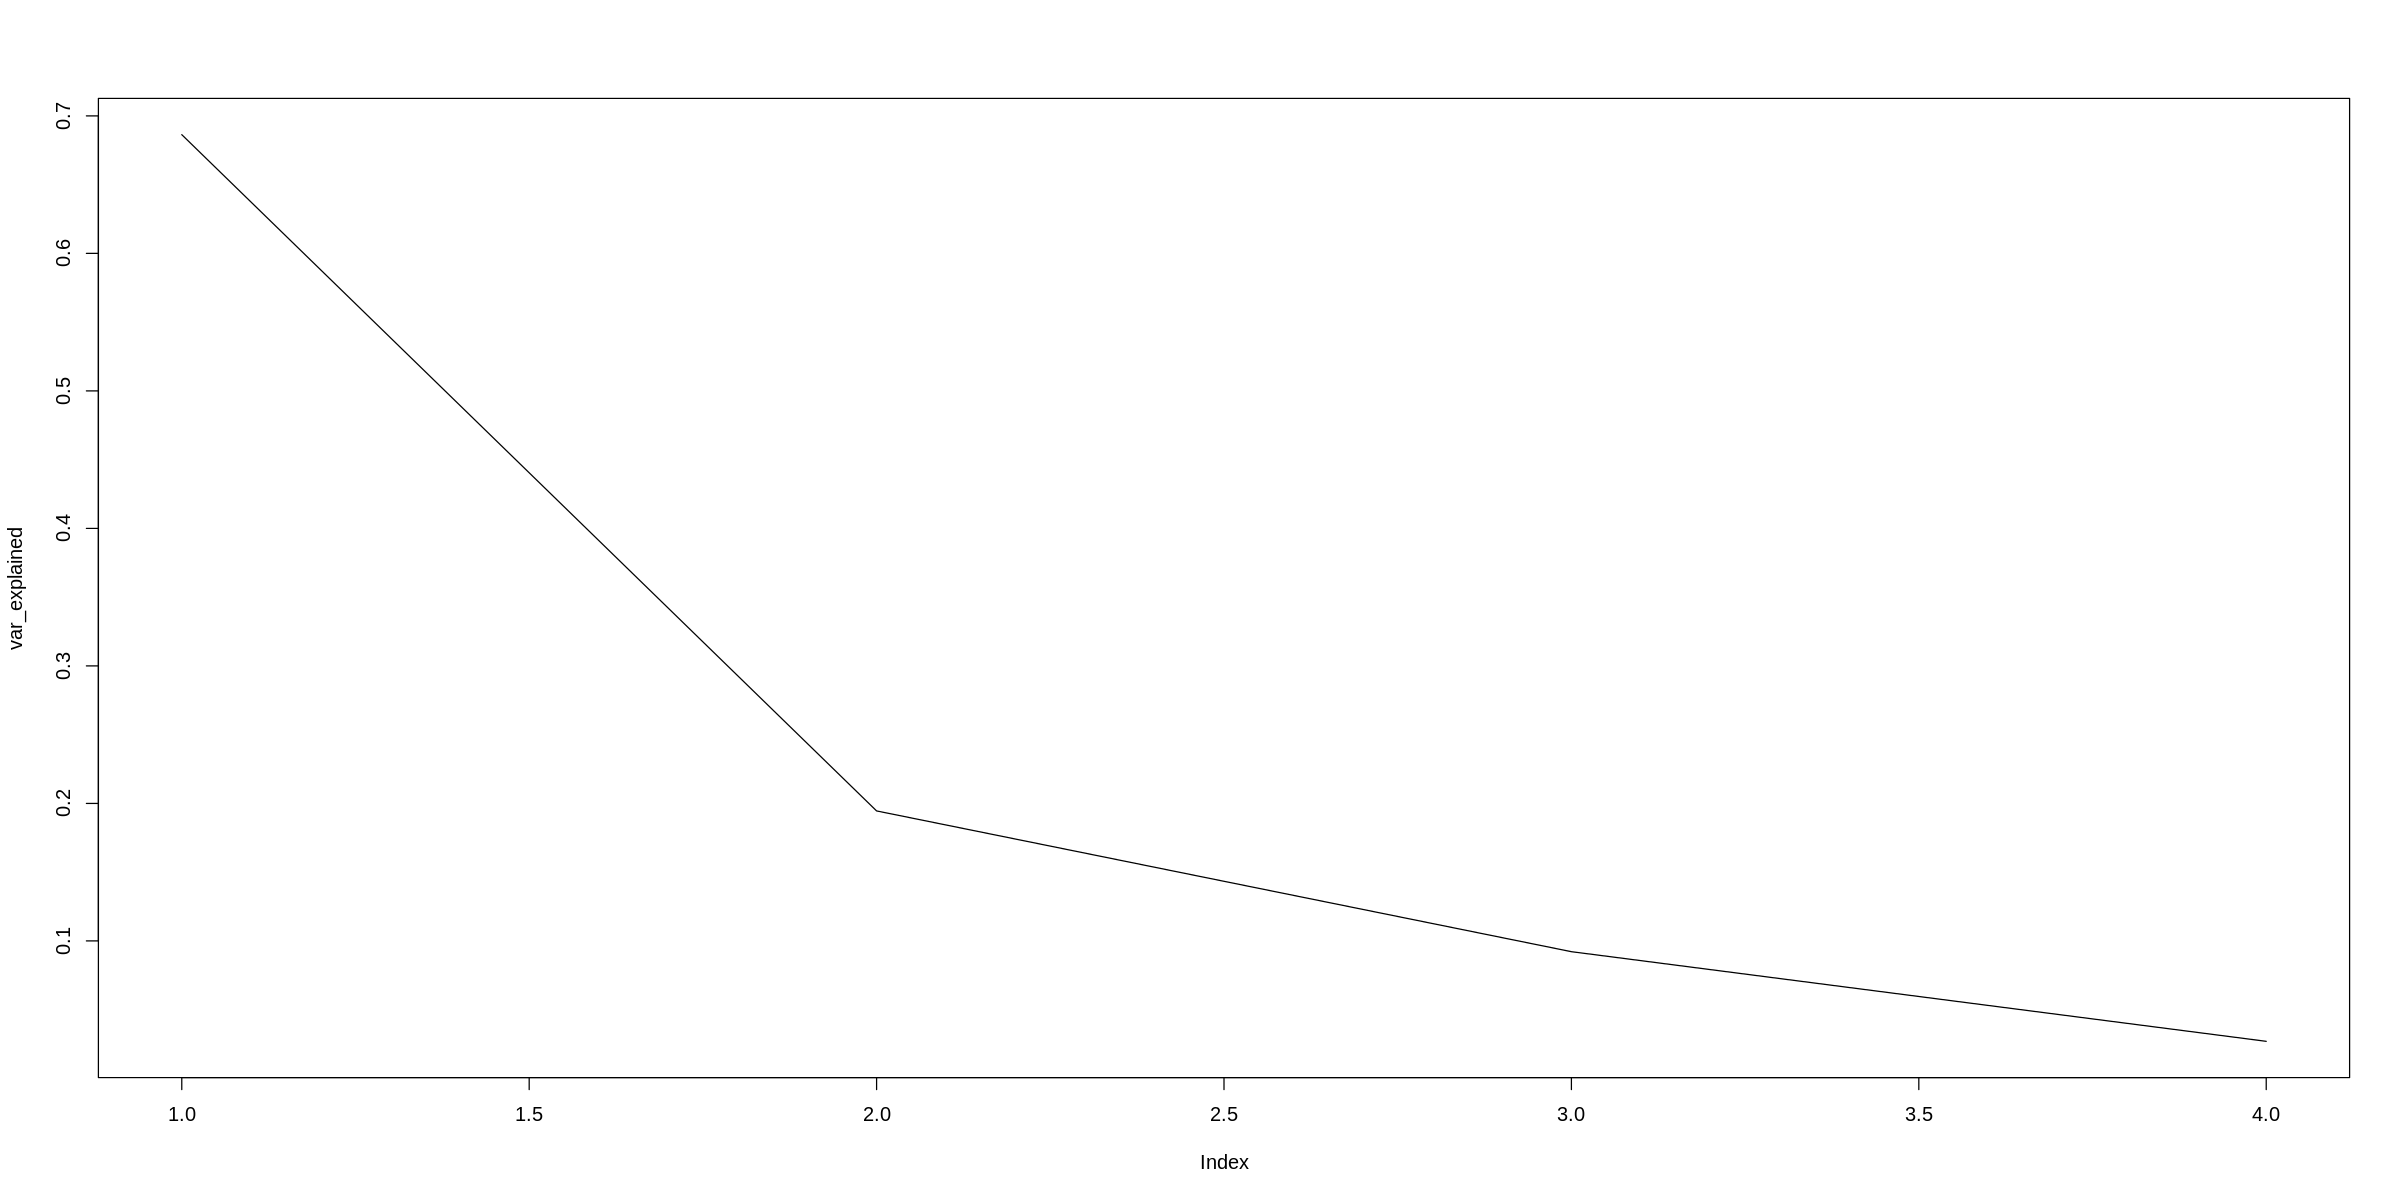

[1] 6


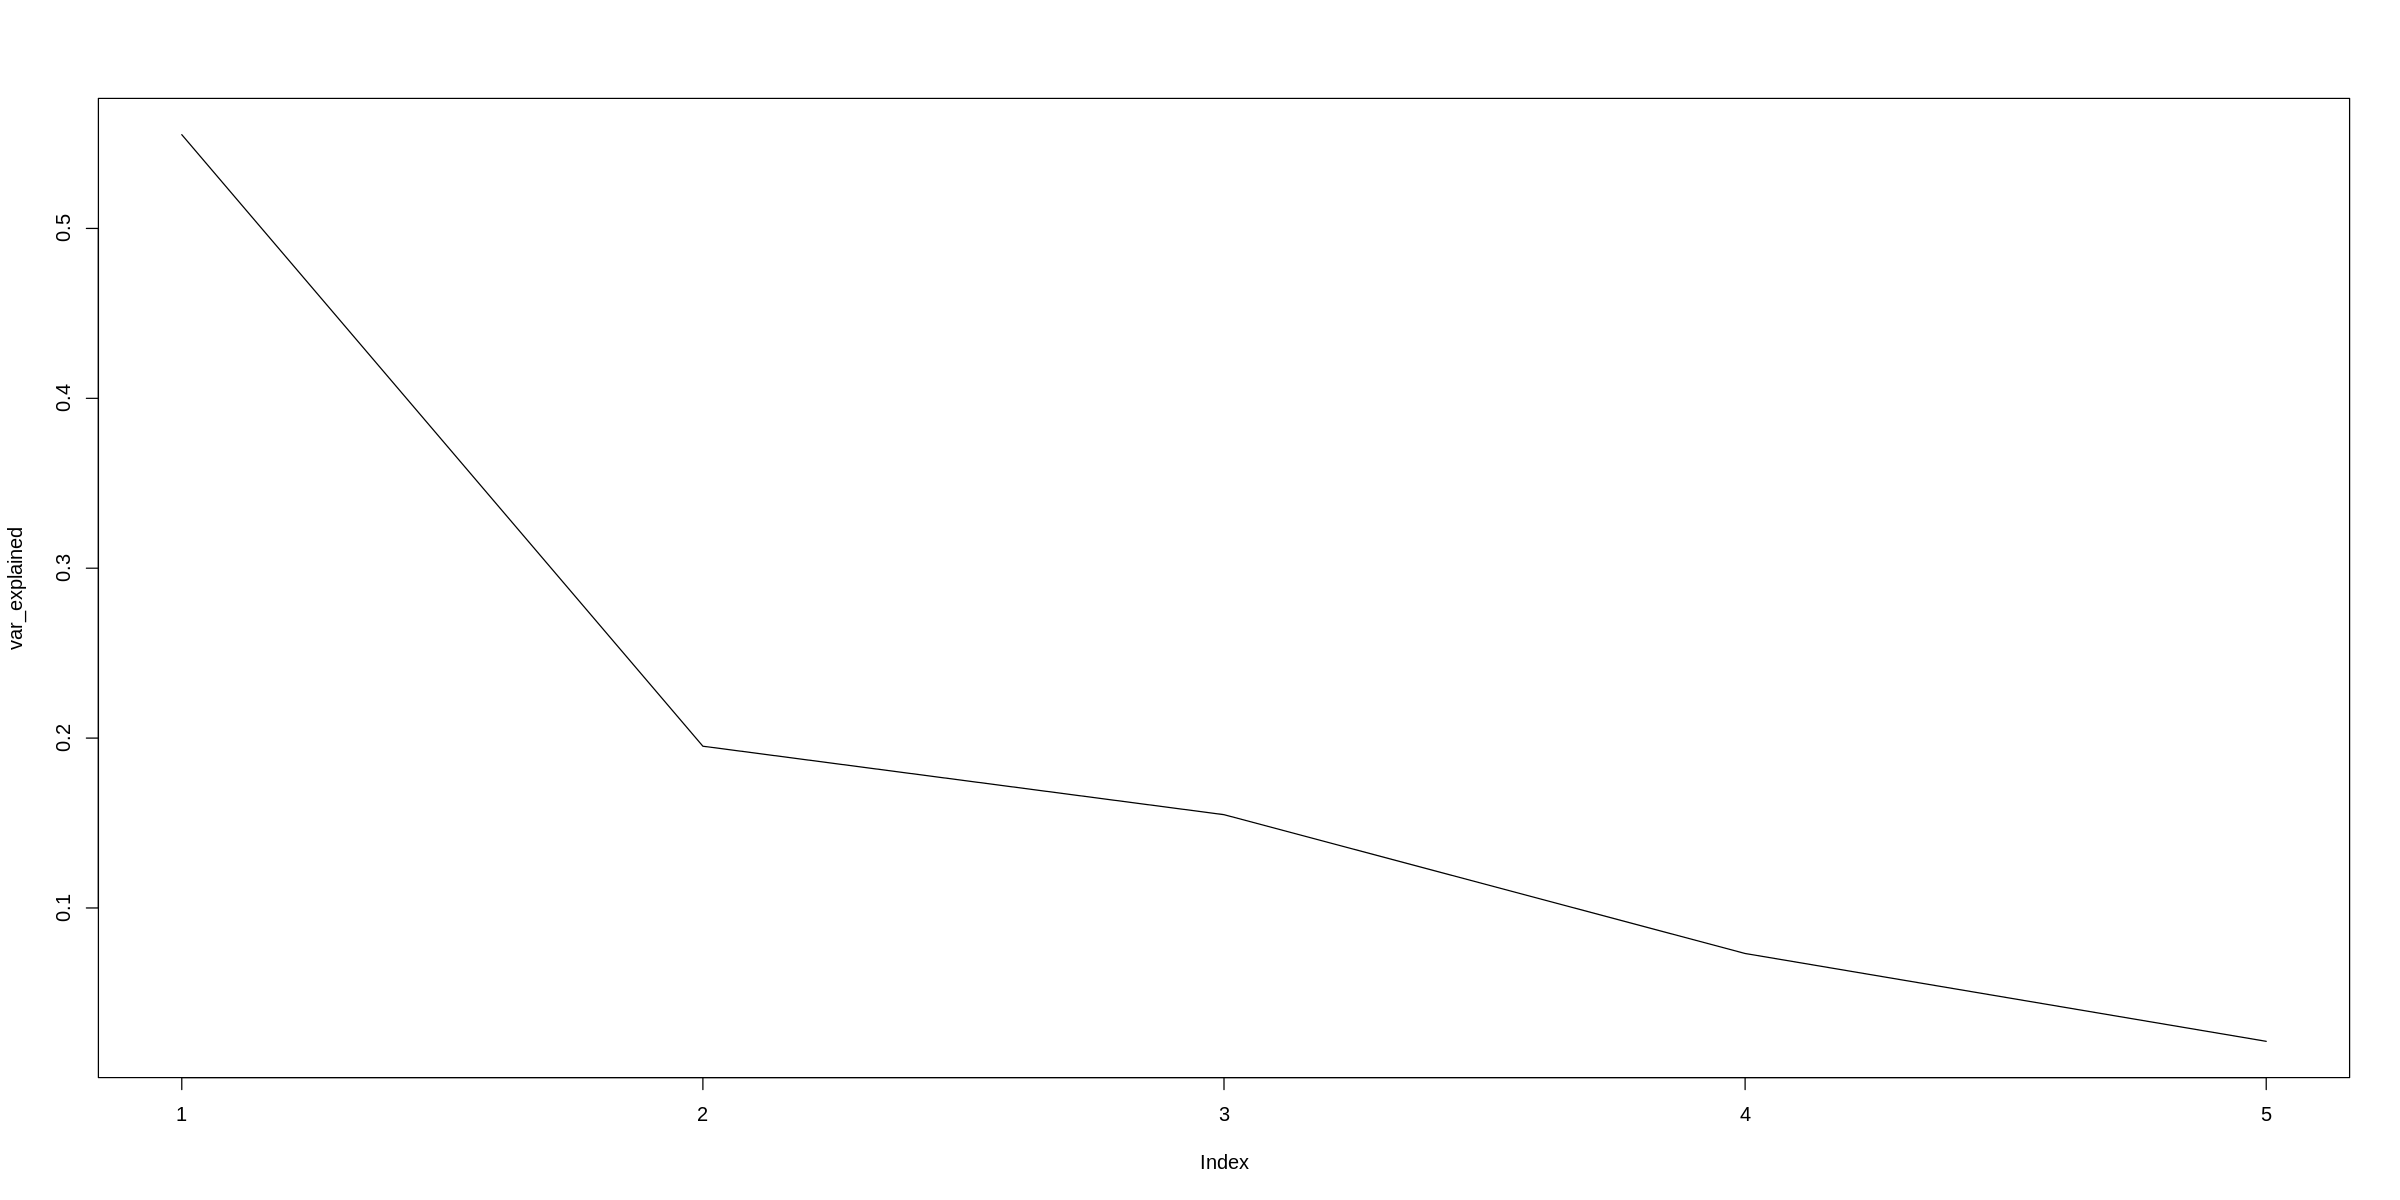

[1] 7


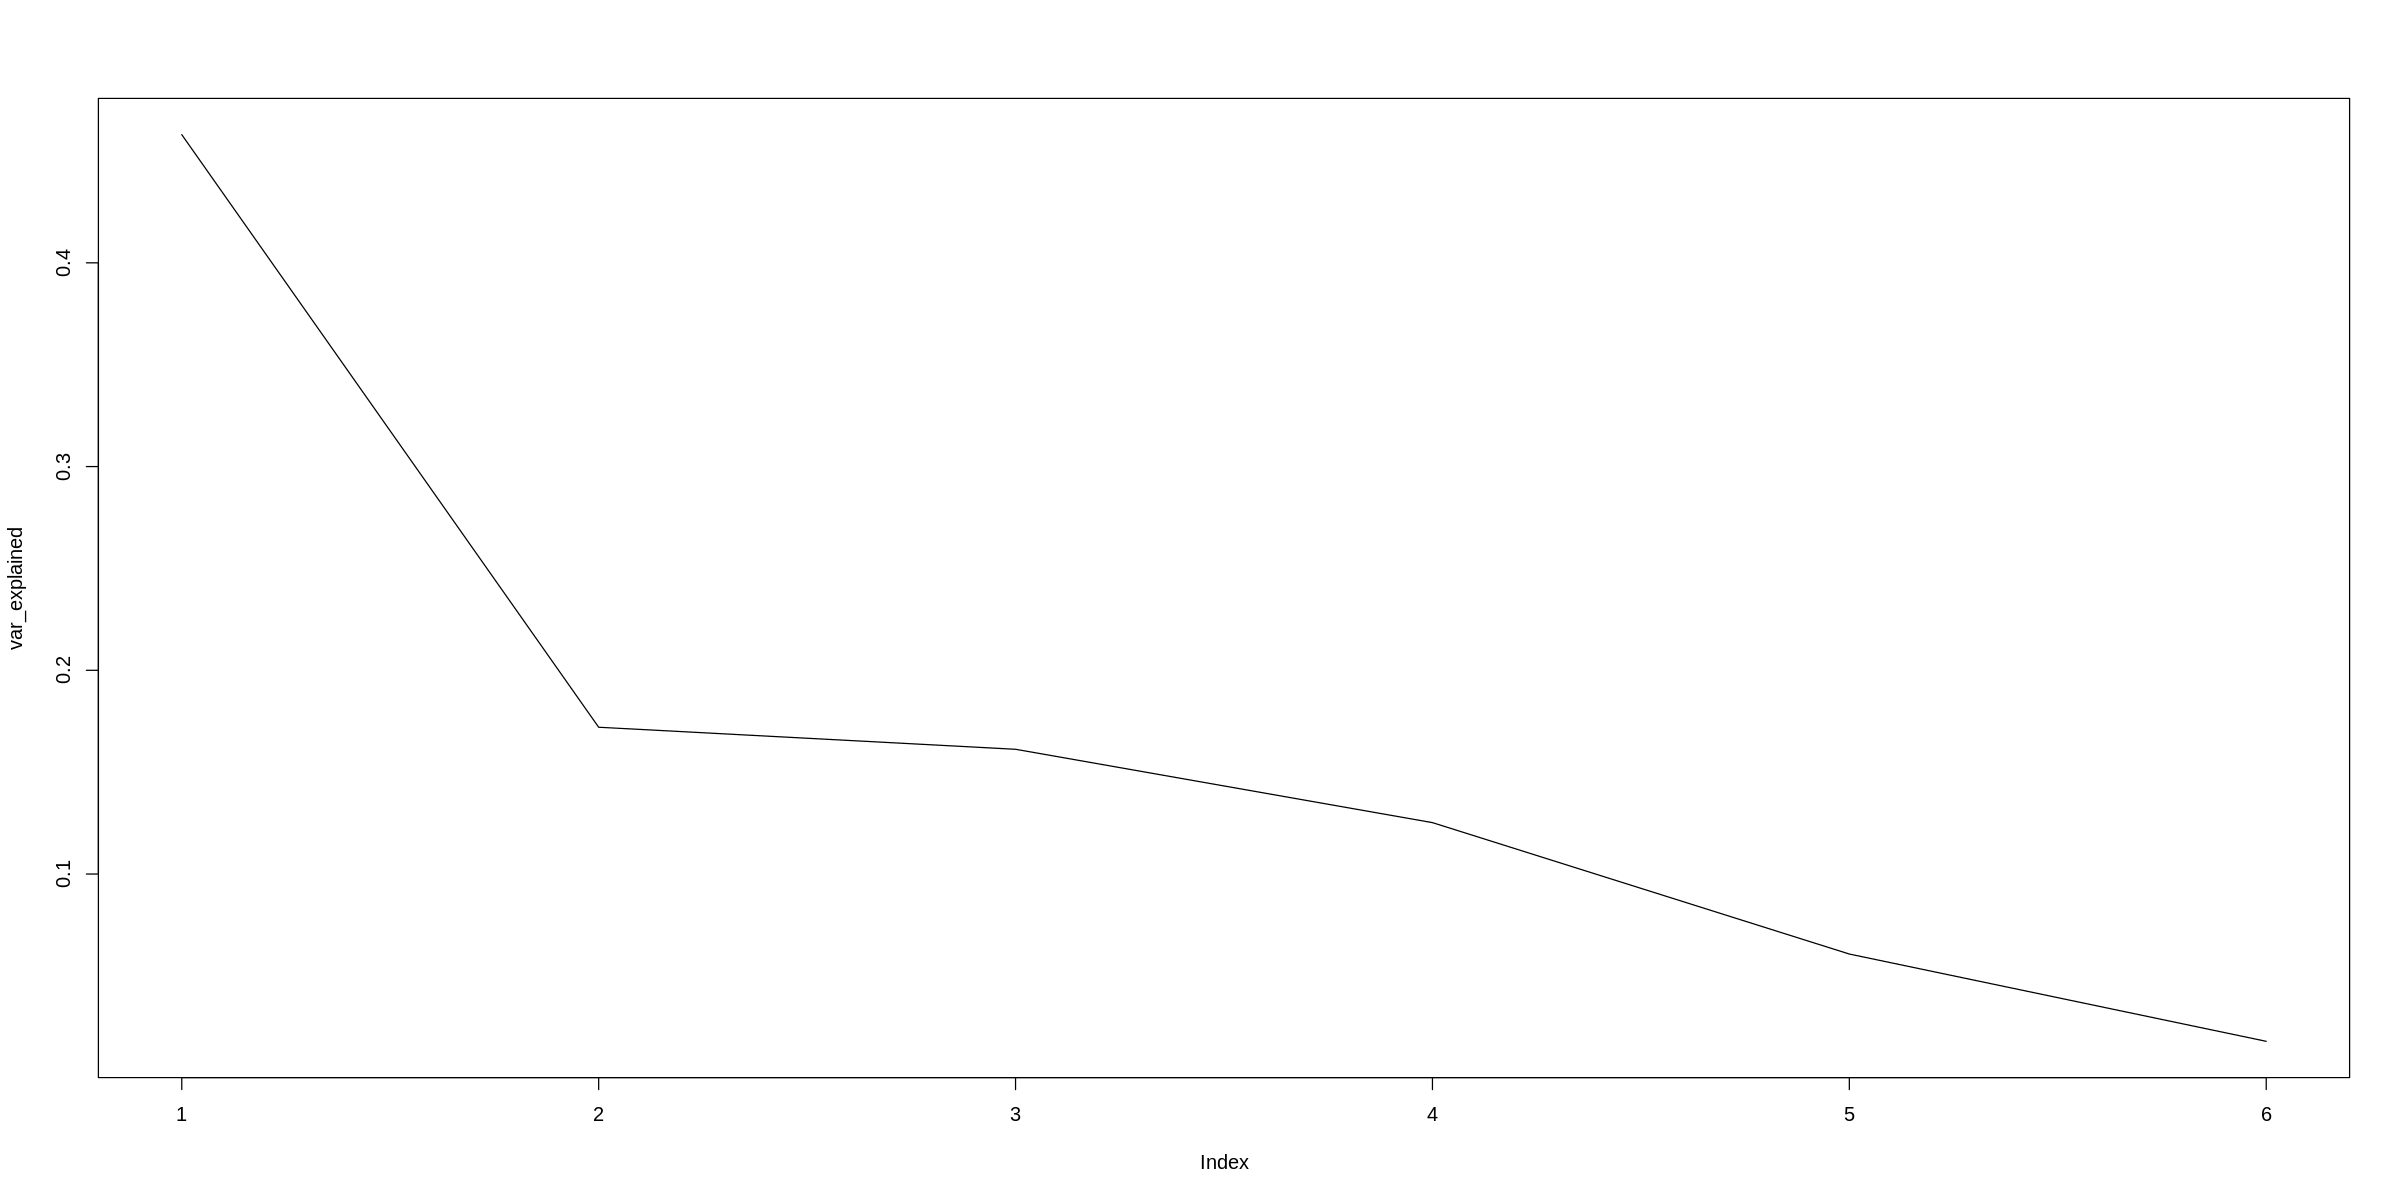

[1] 8


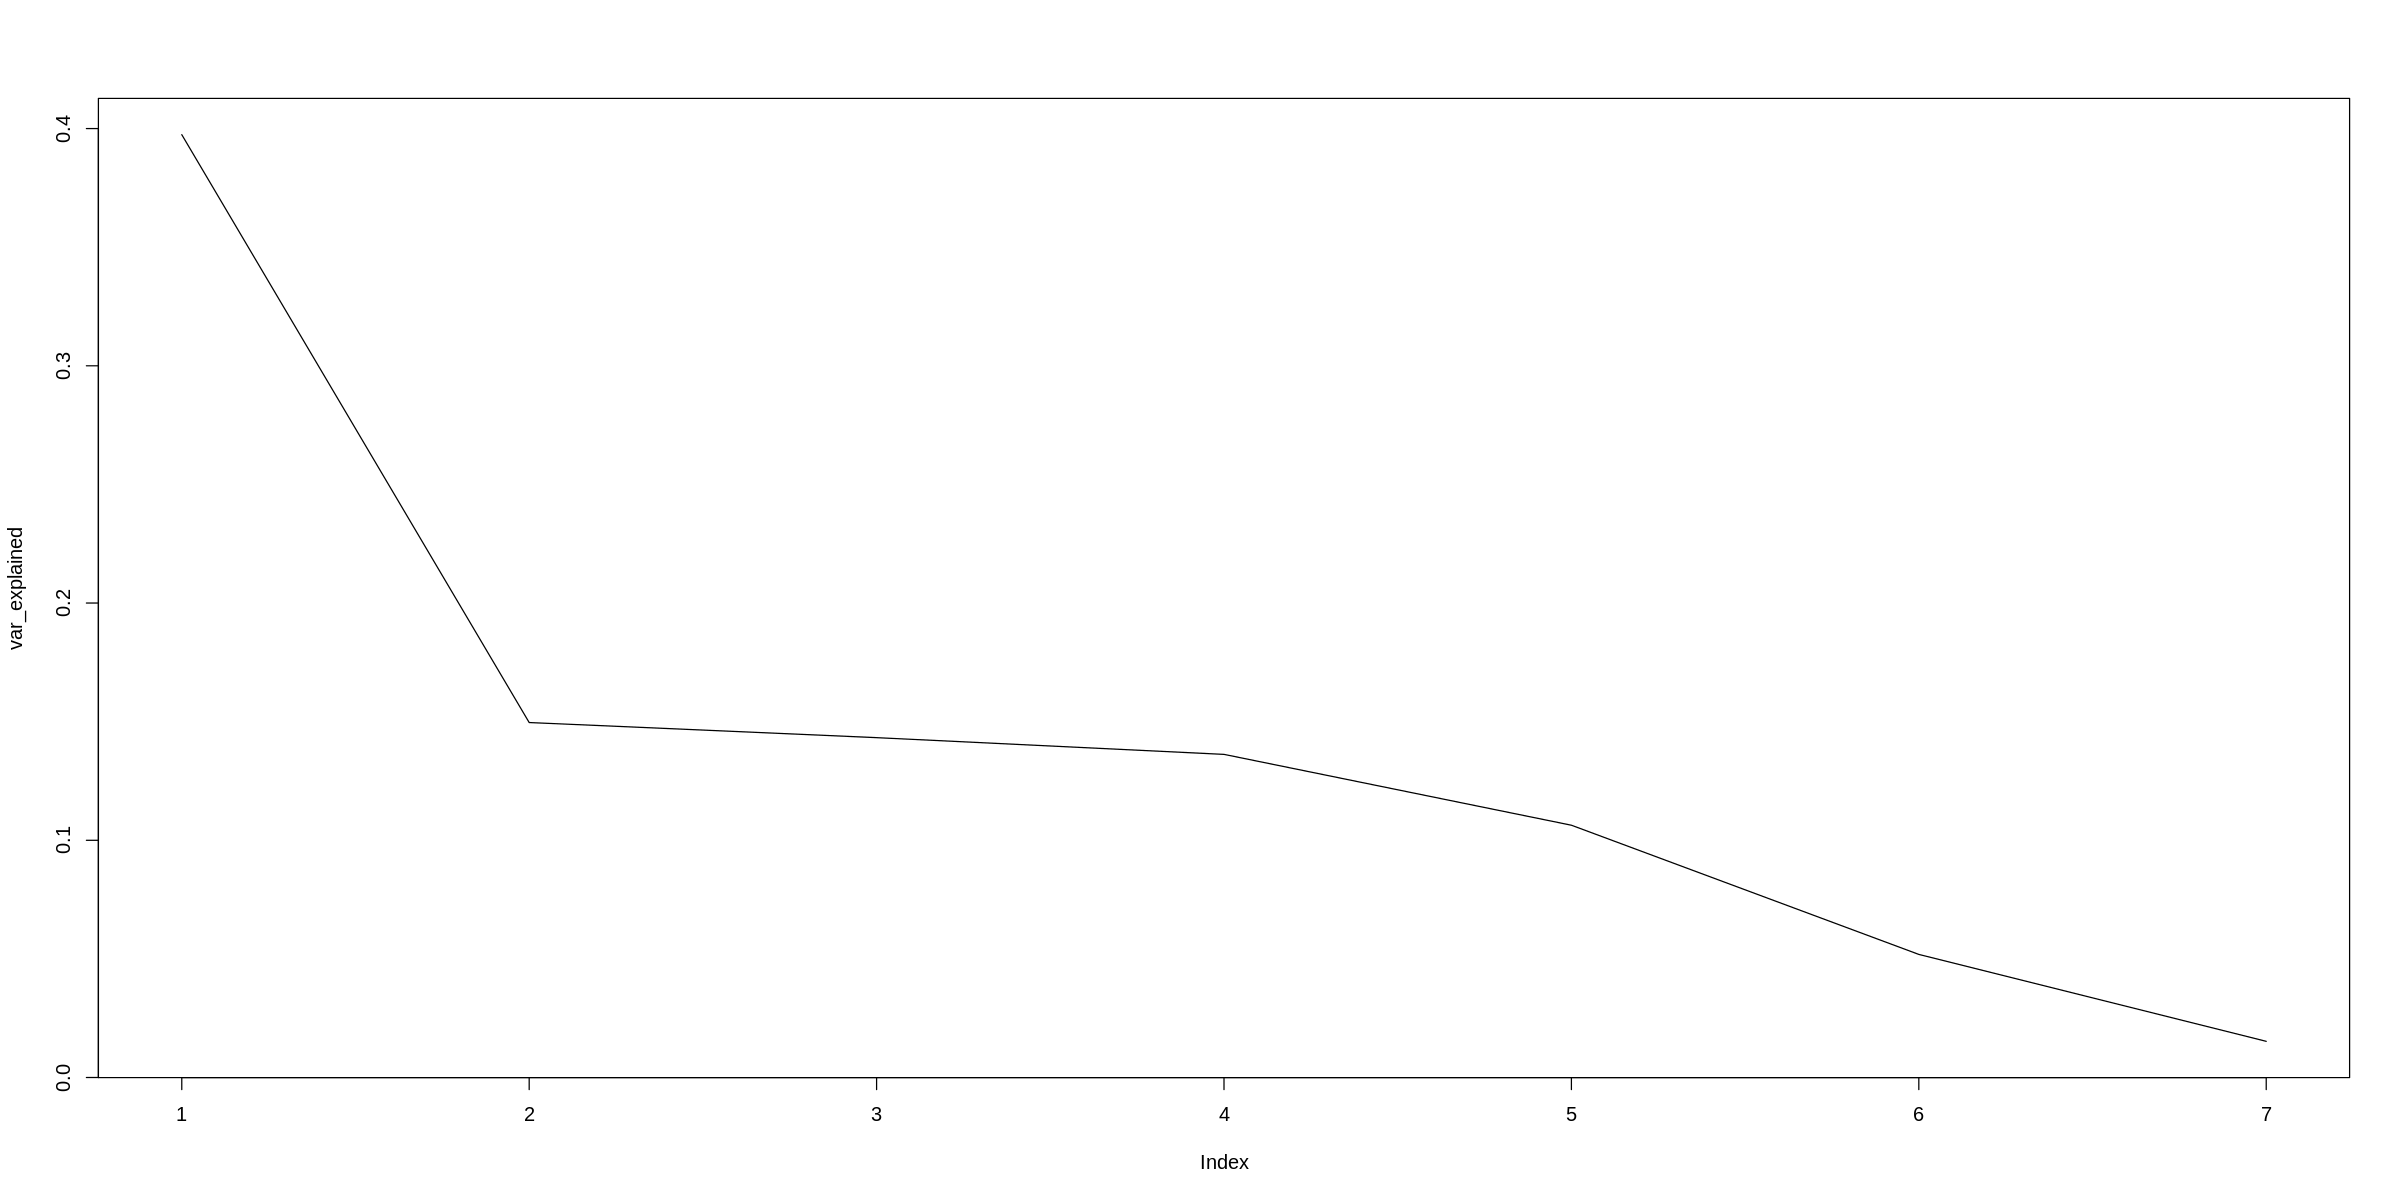

[1] 9


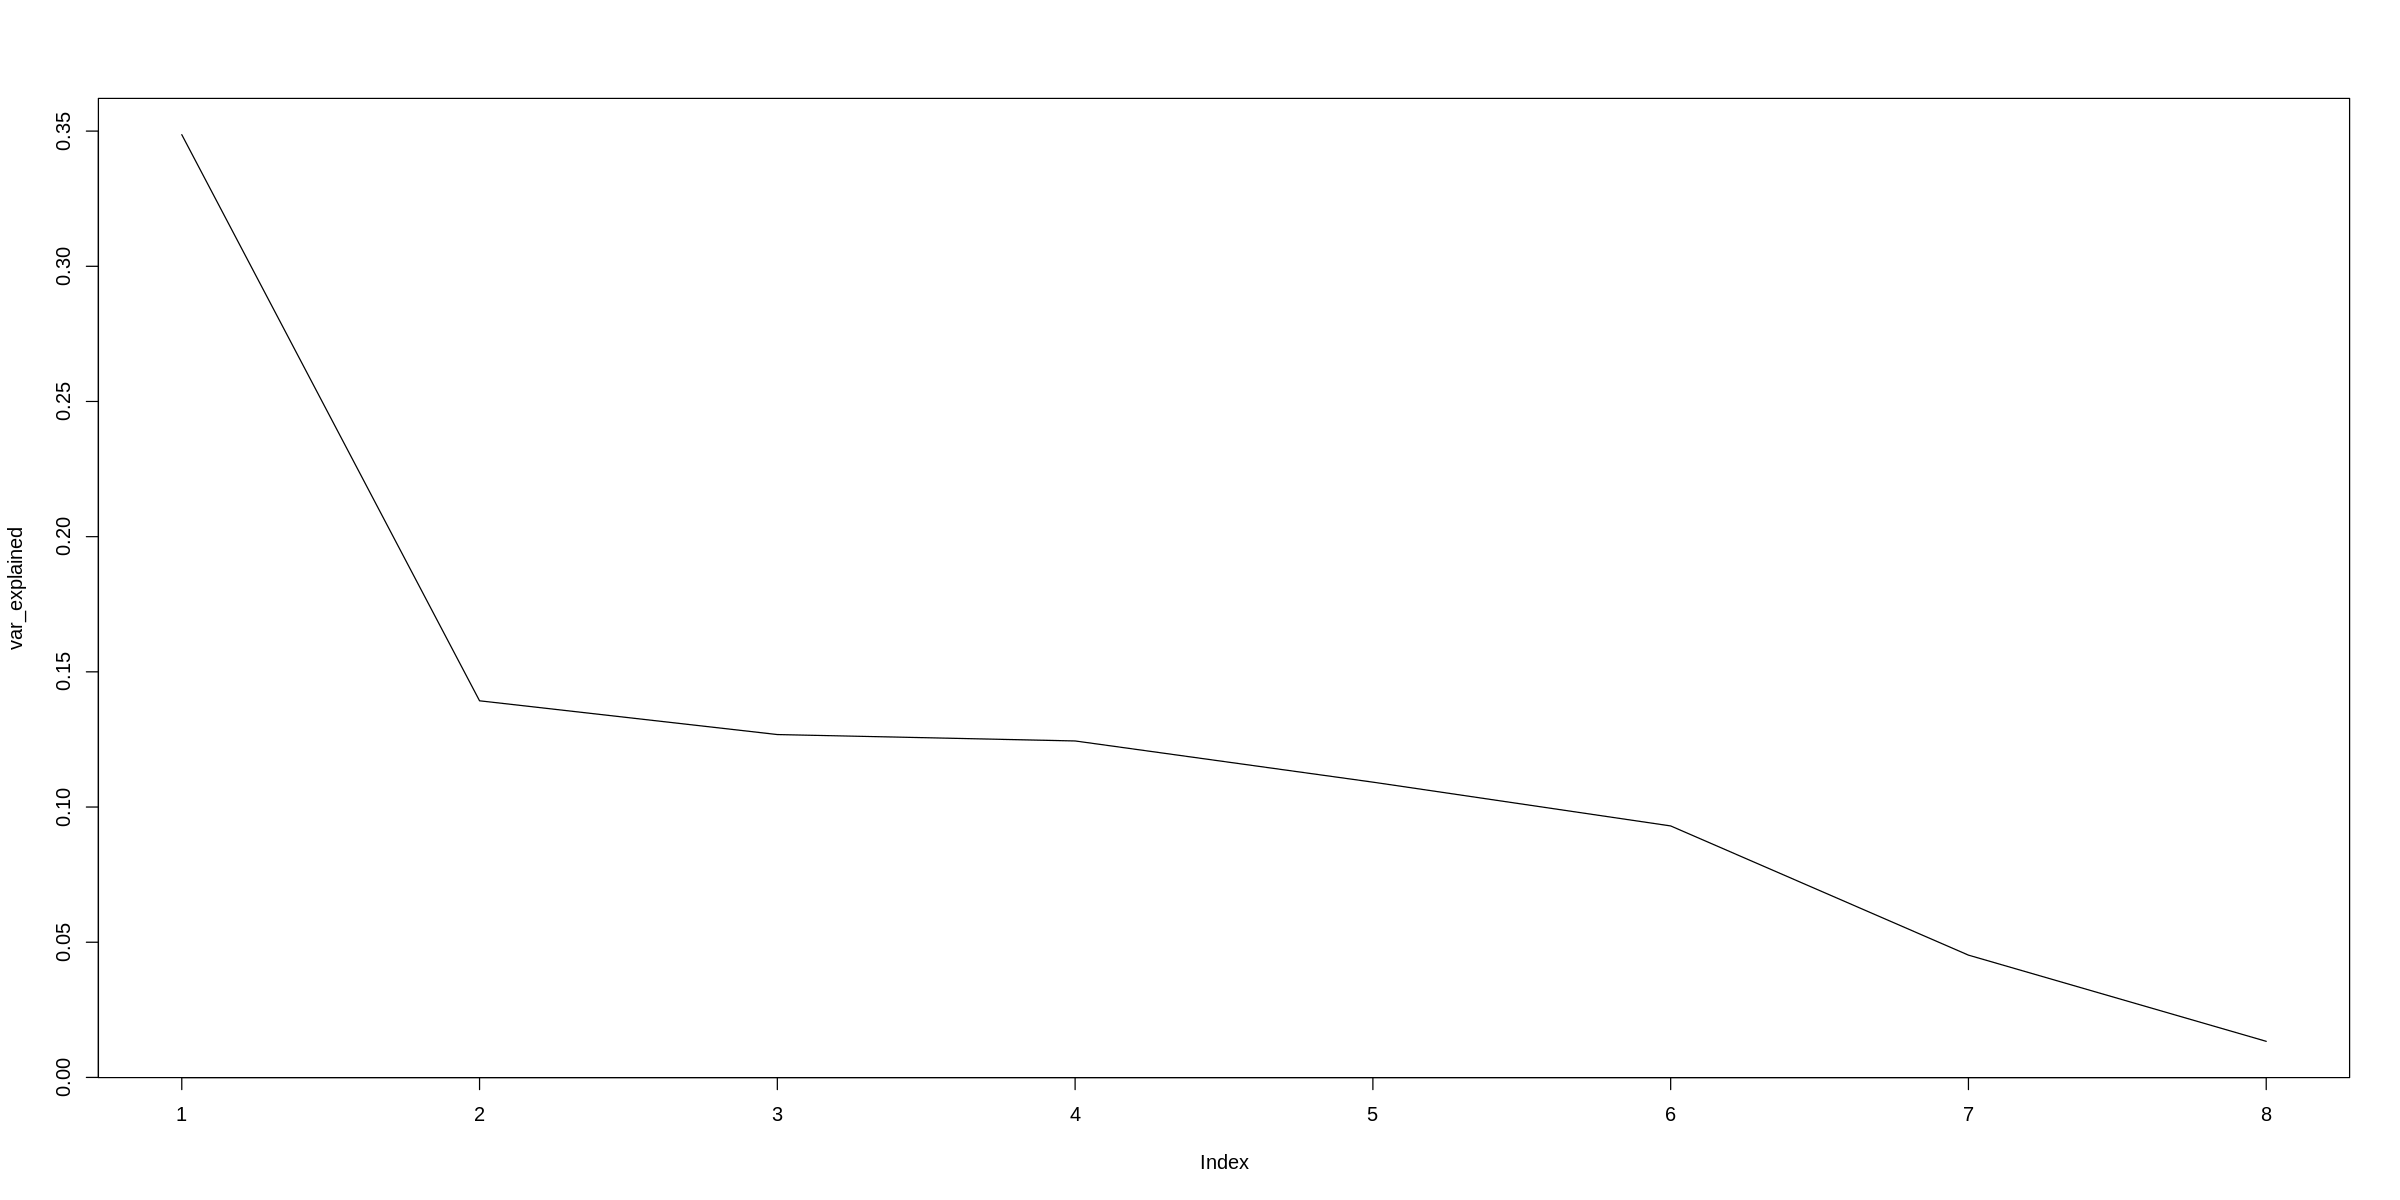

[1] 10


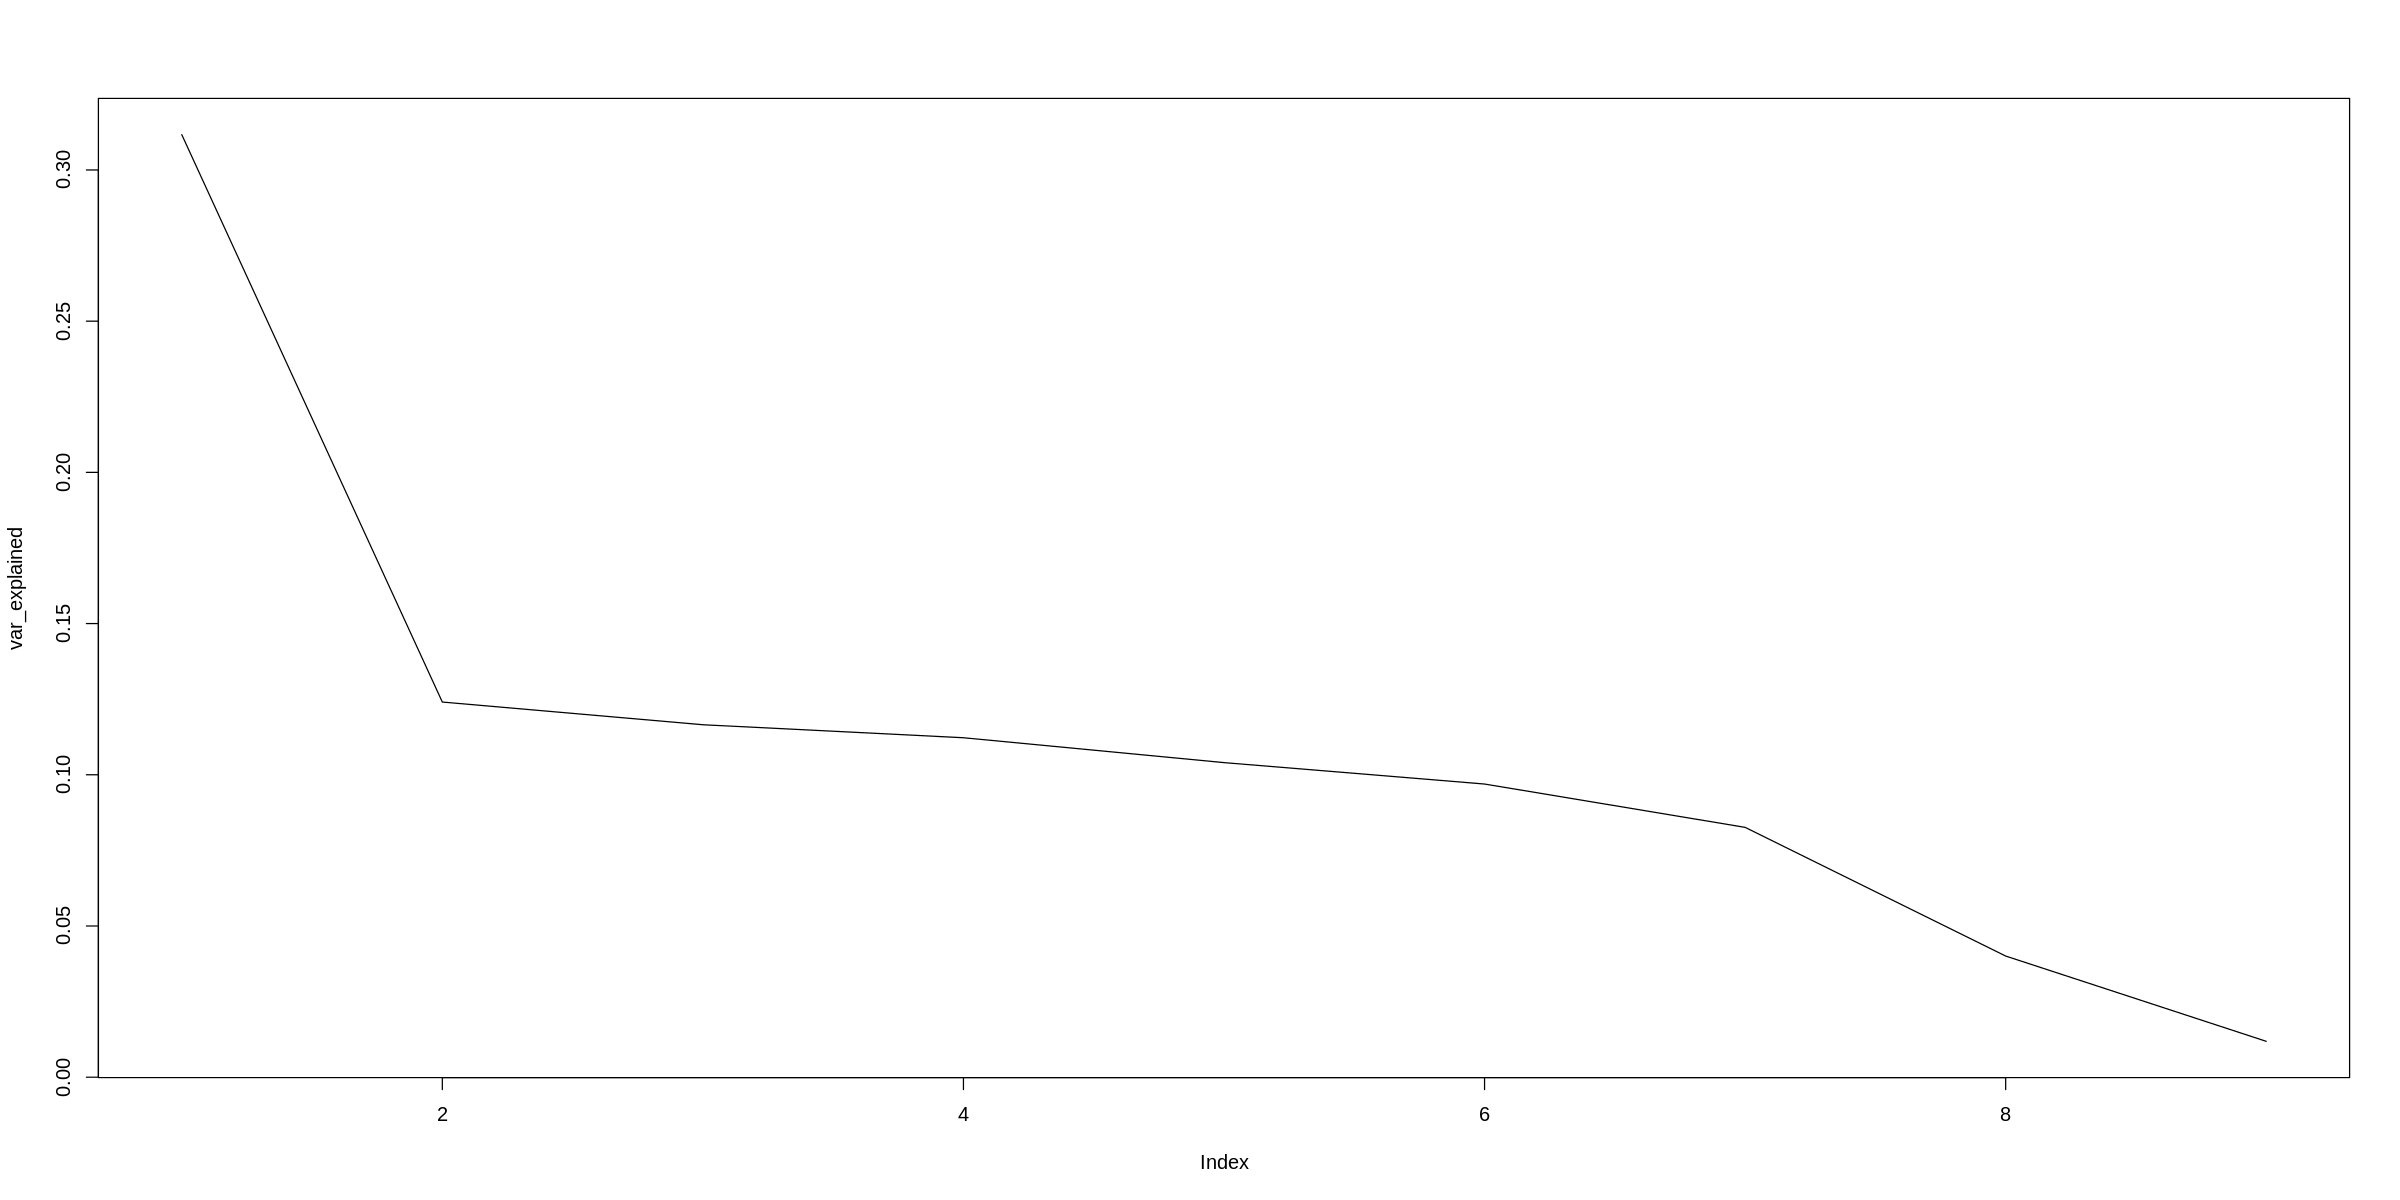

[1] 11


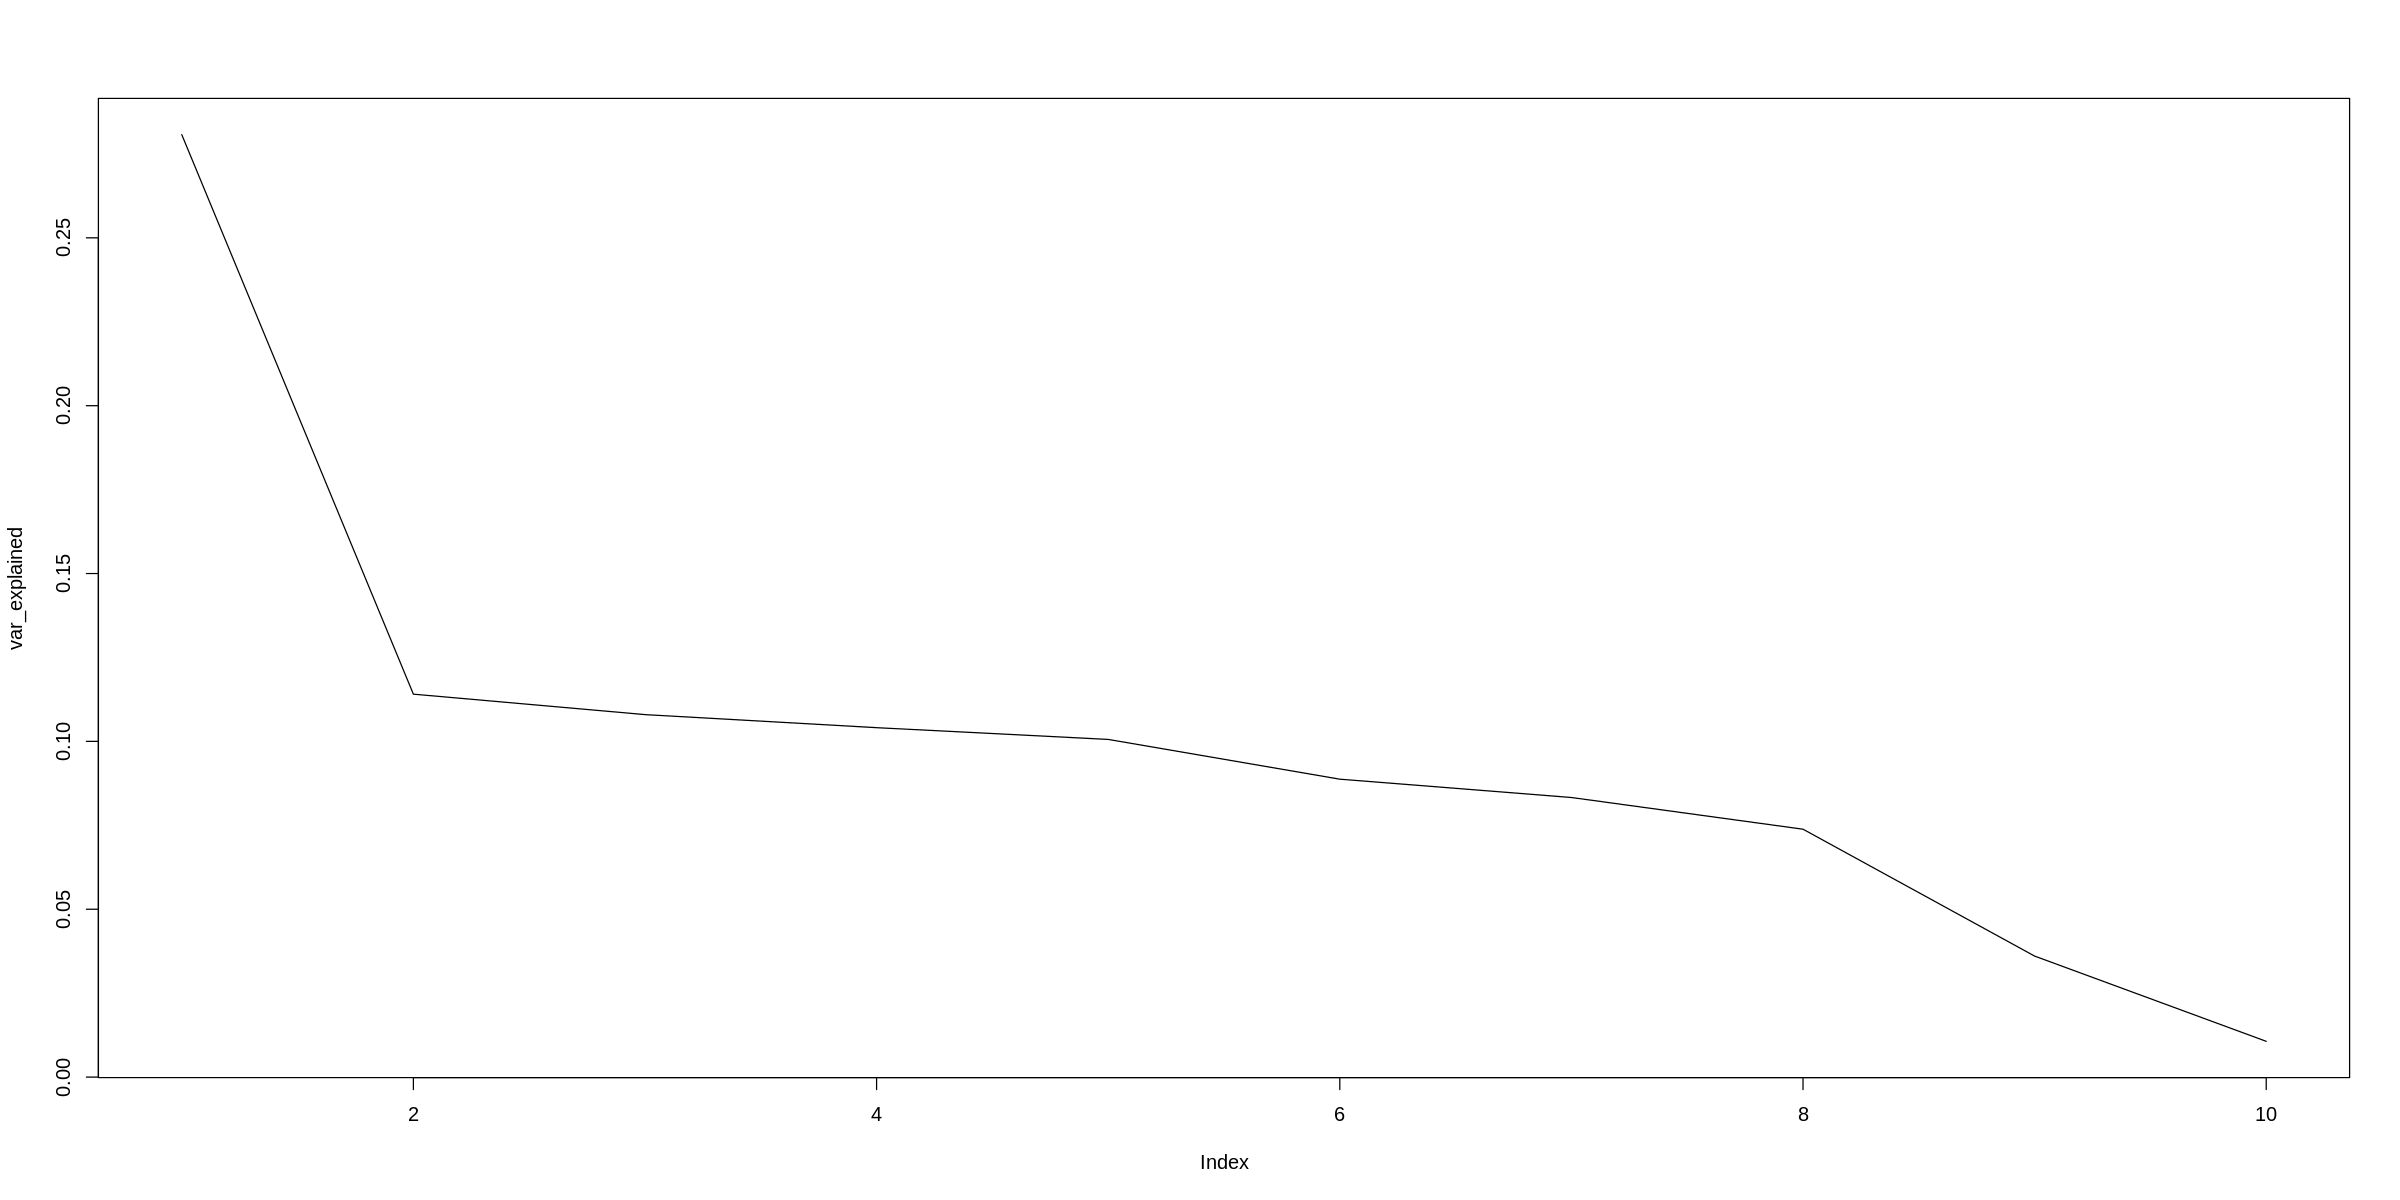

[1] 12


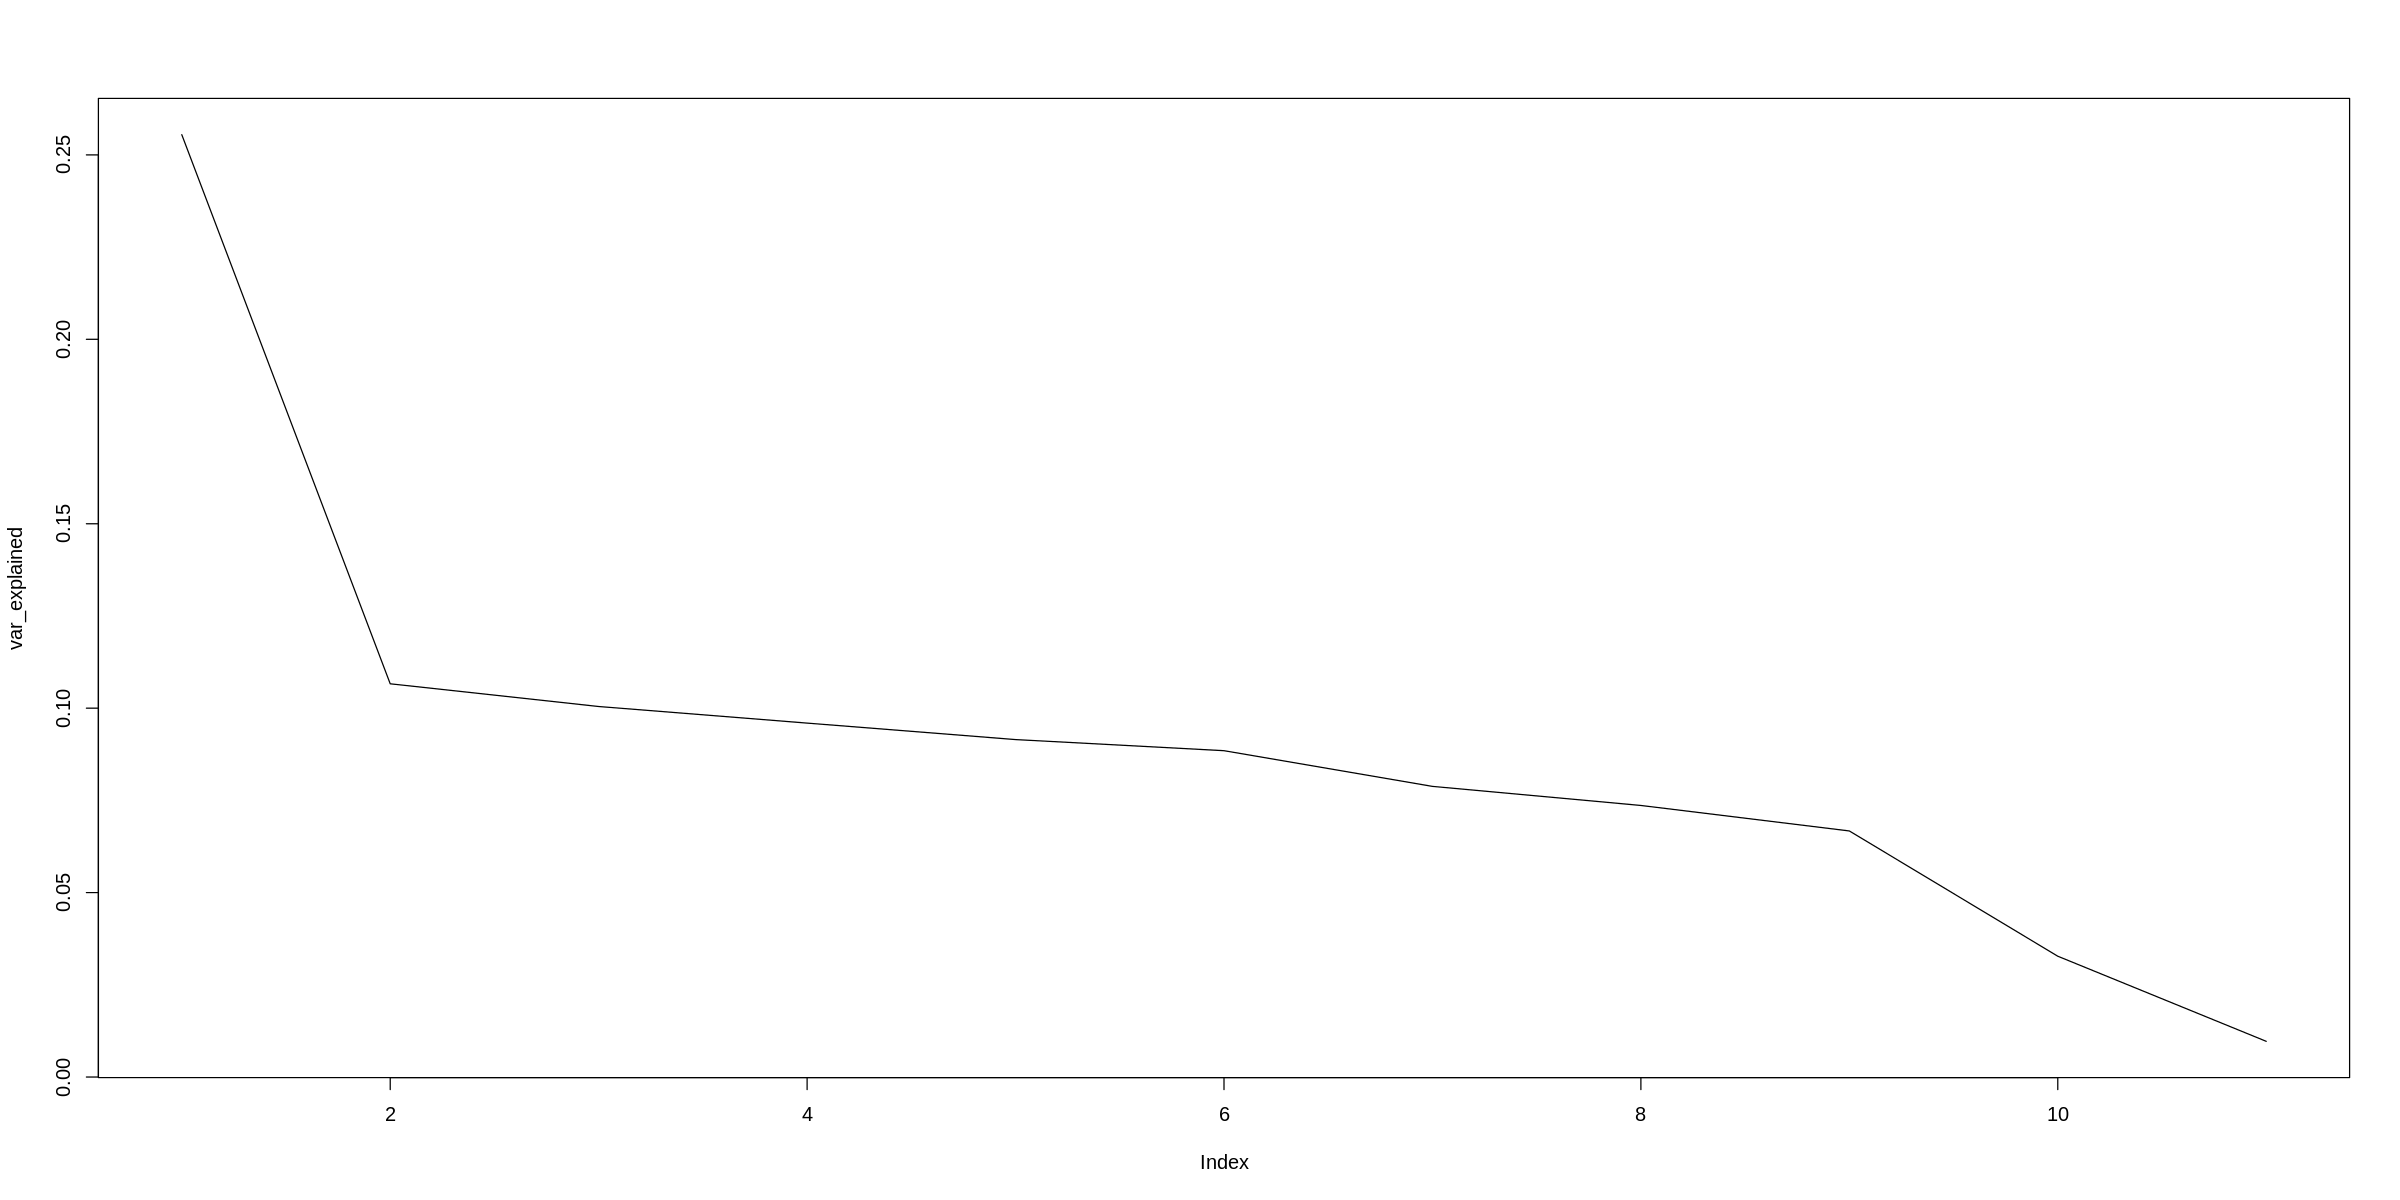

[1] 13


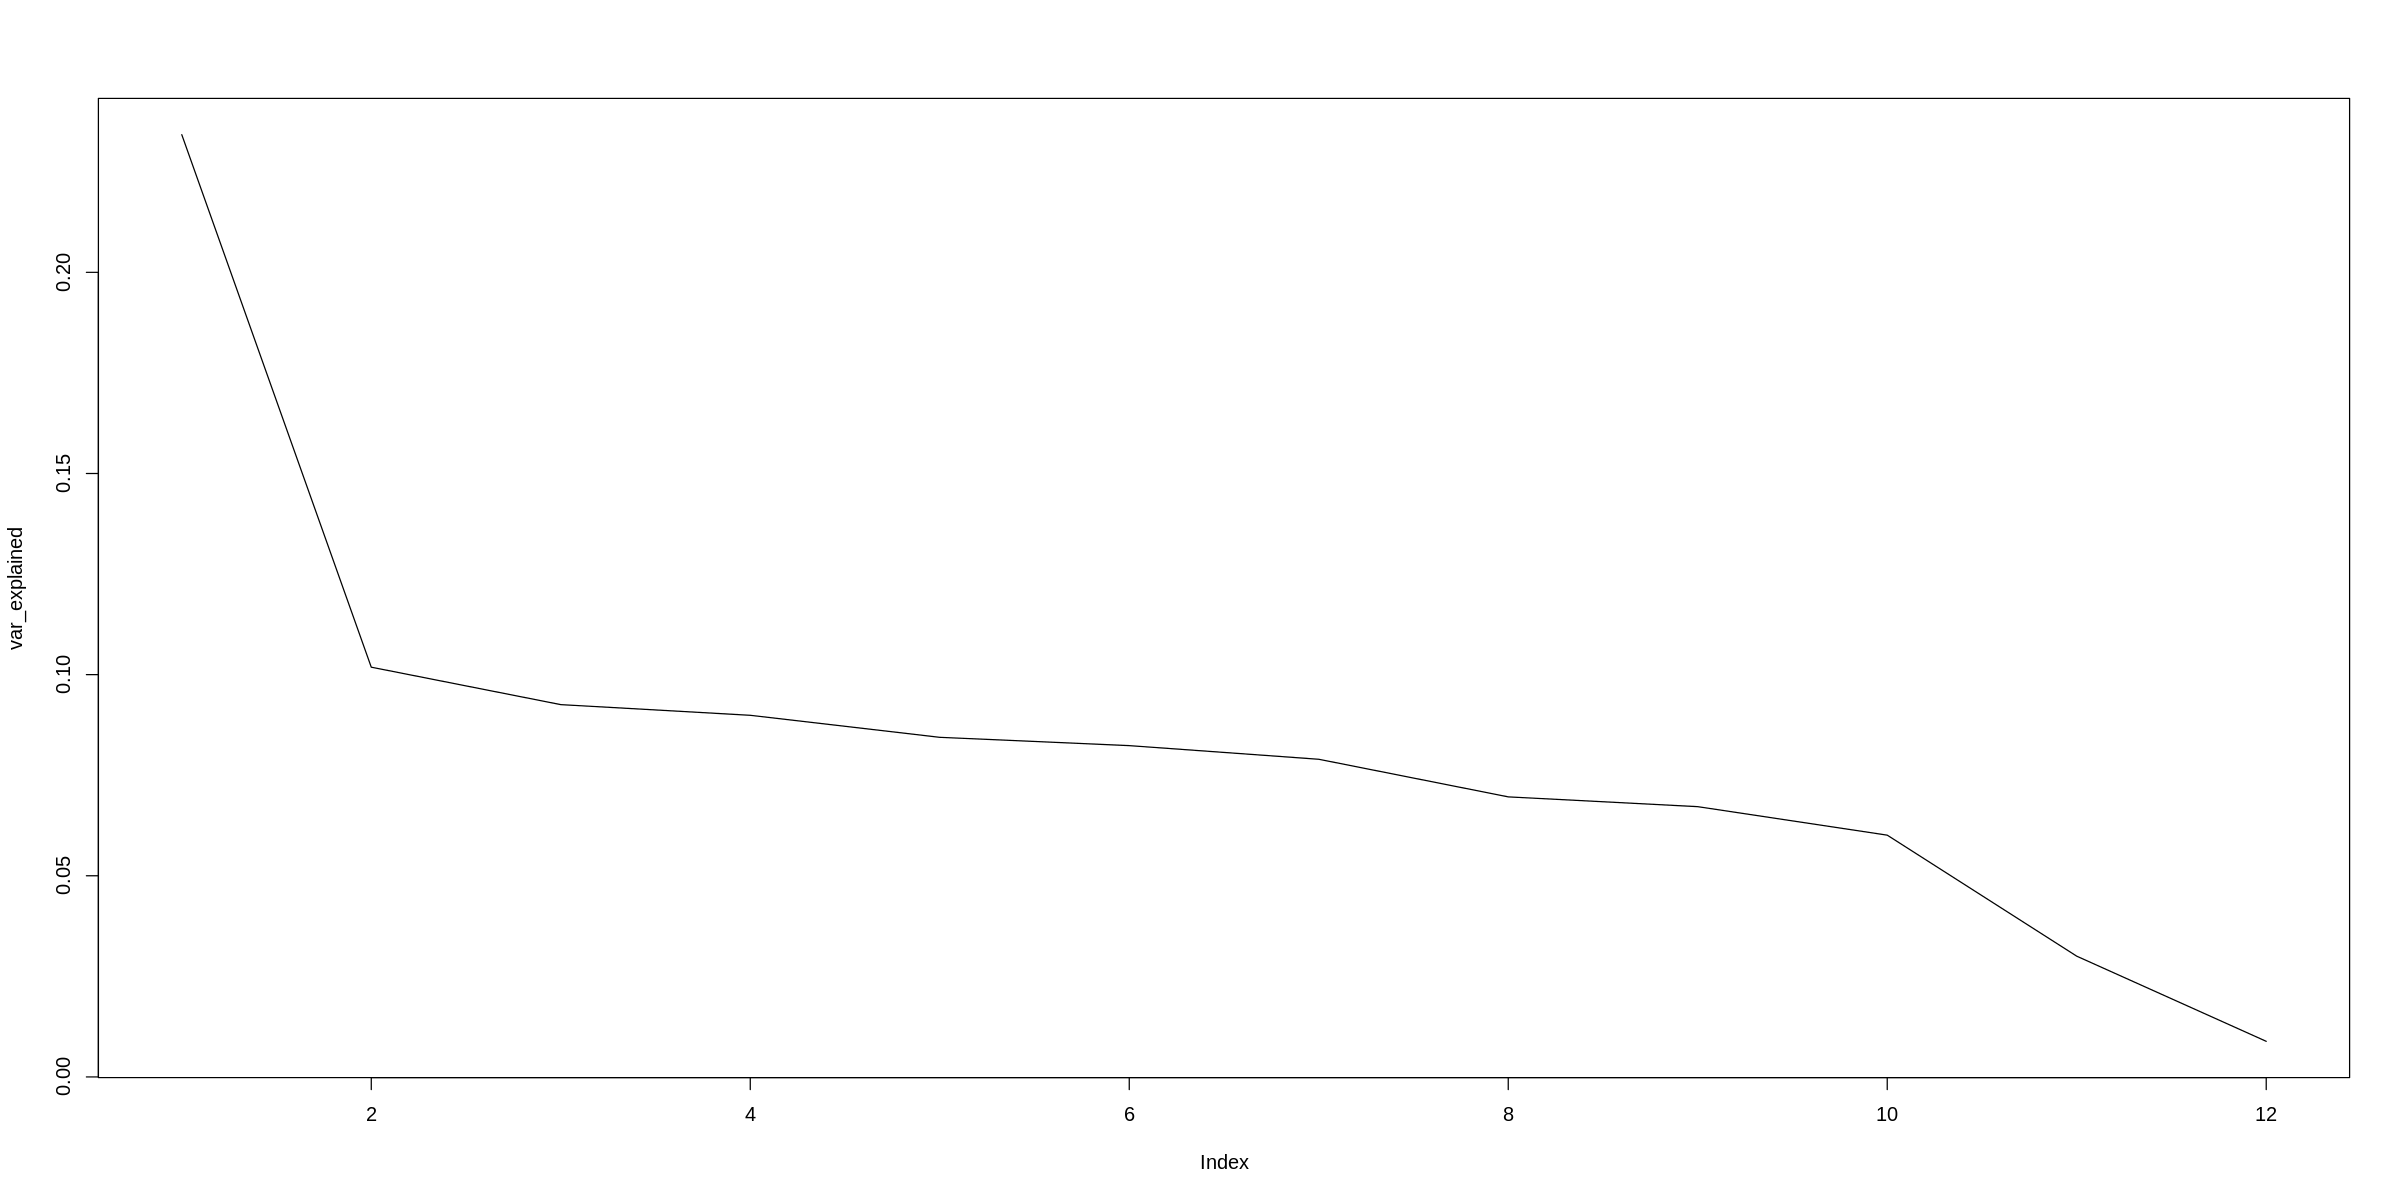

[1] 14


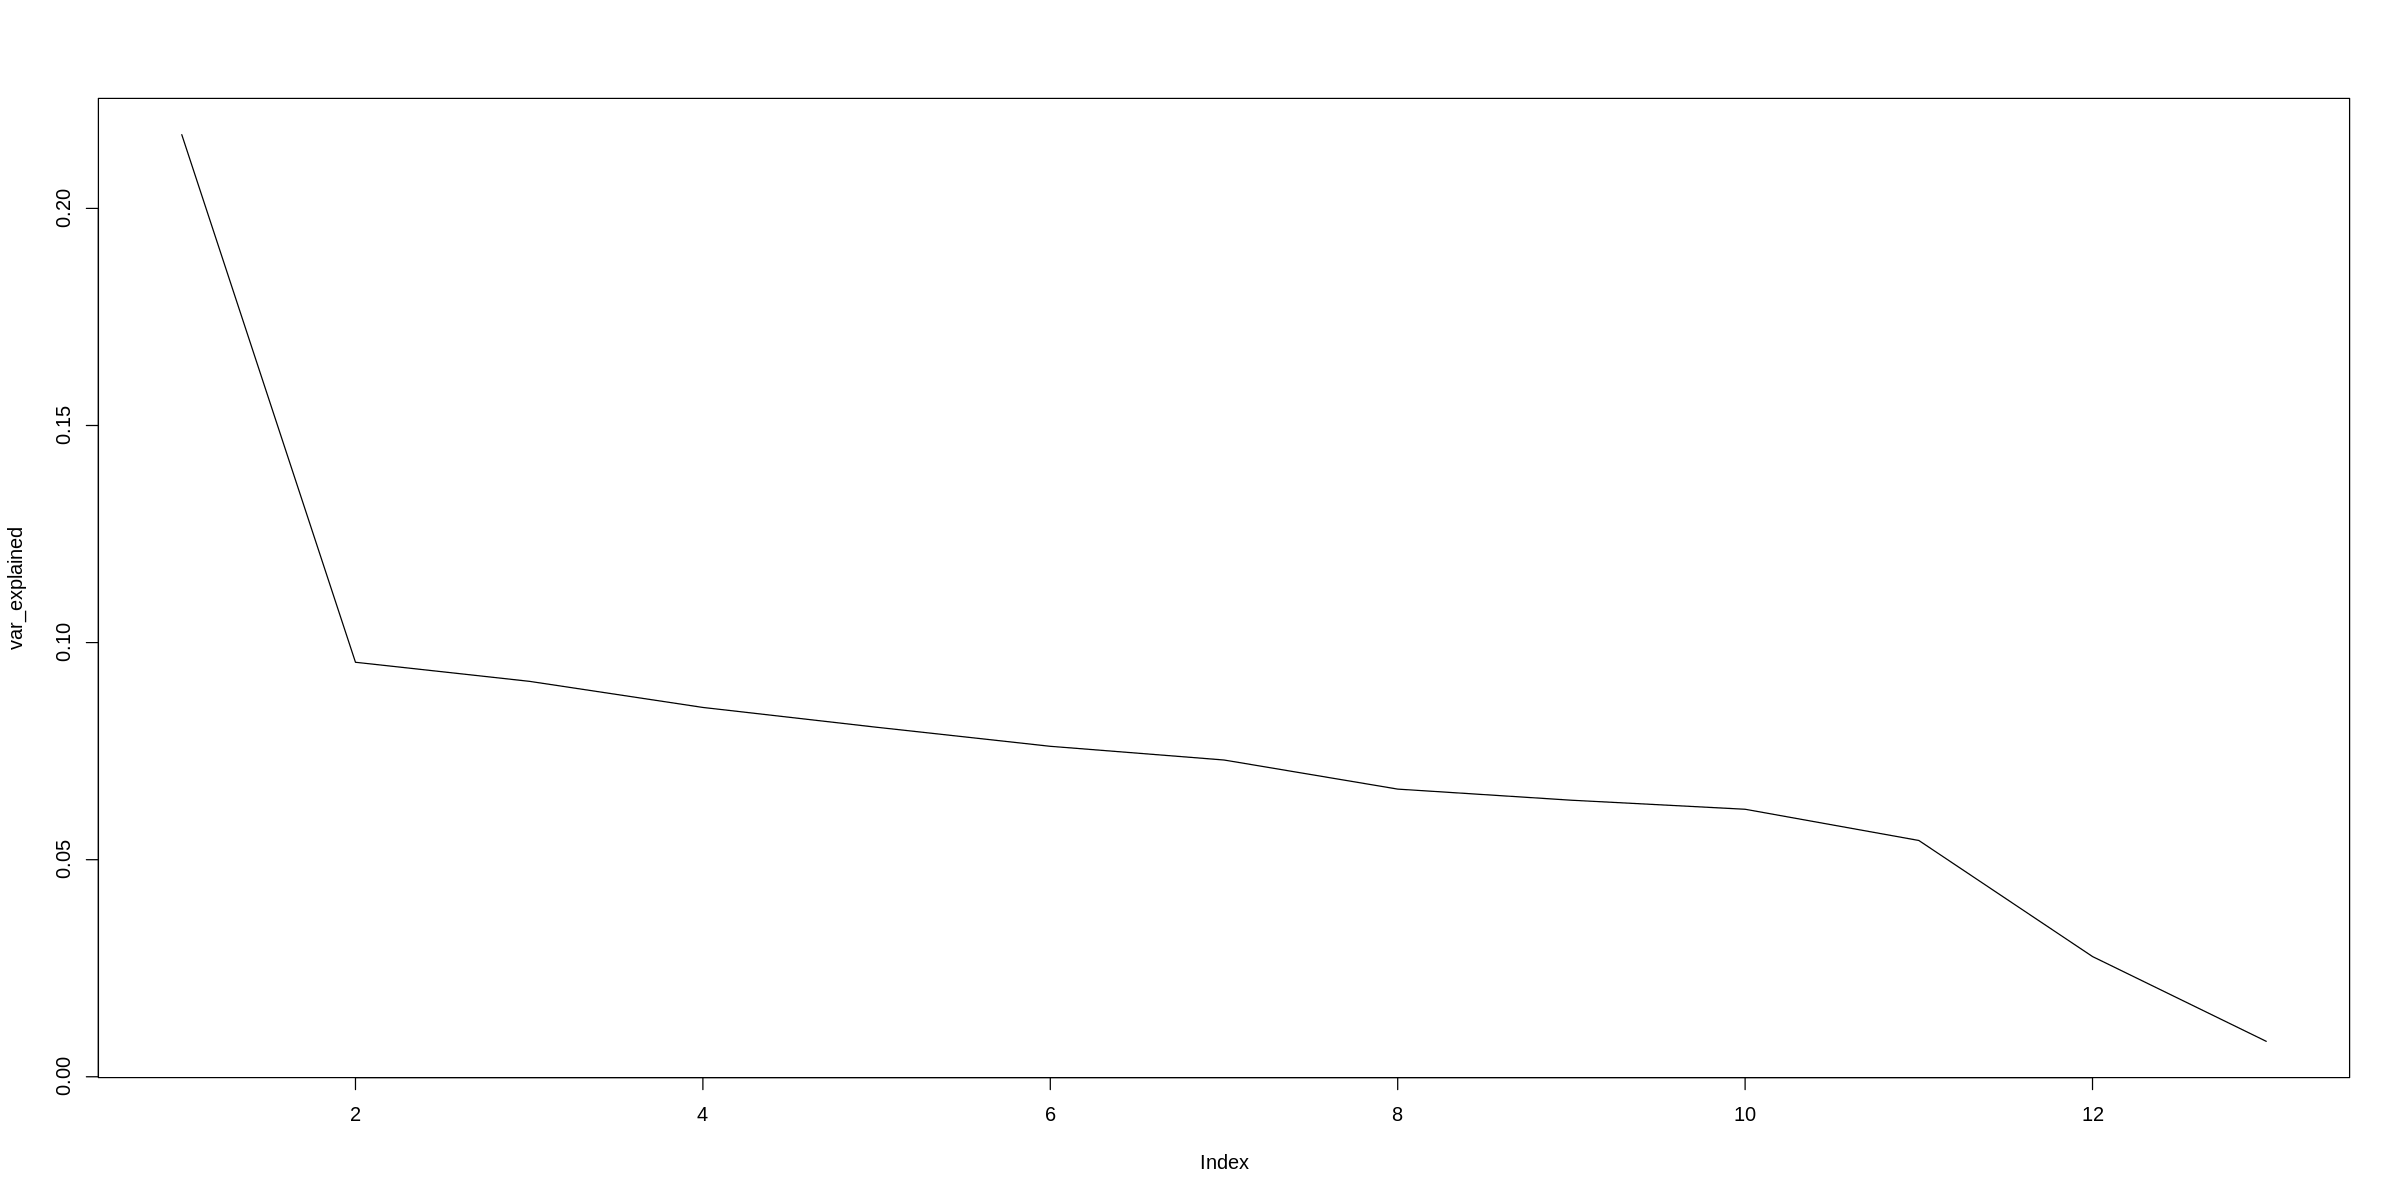

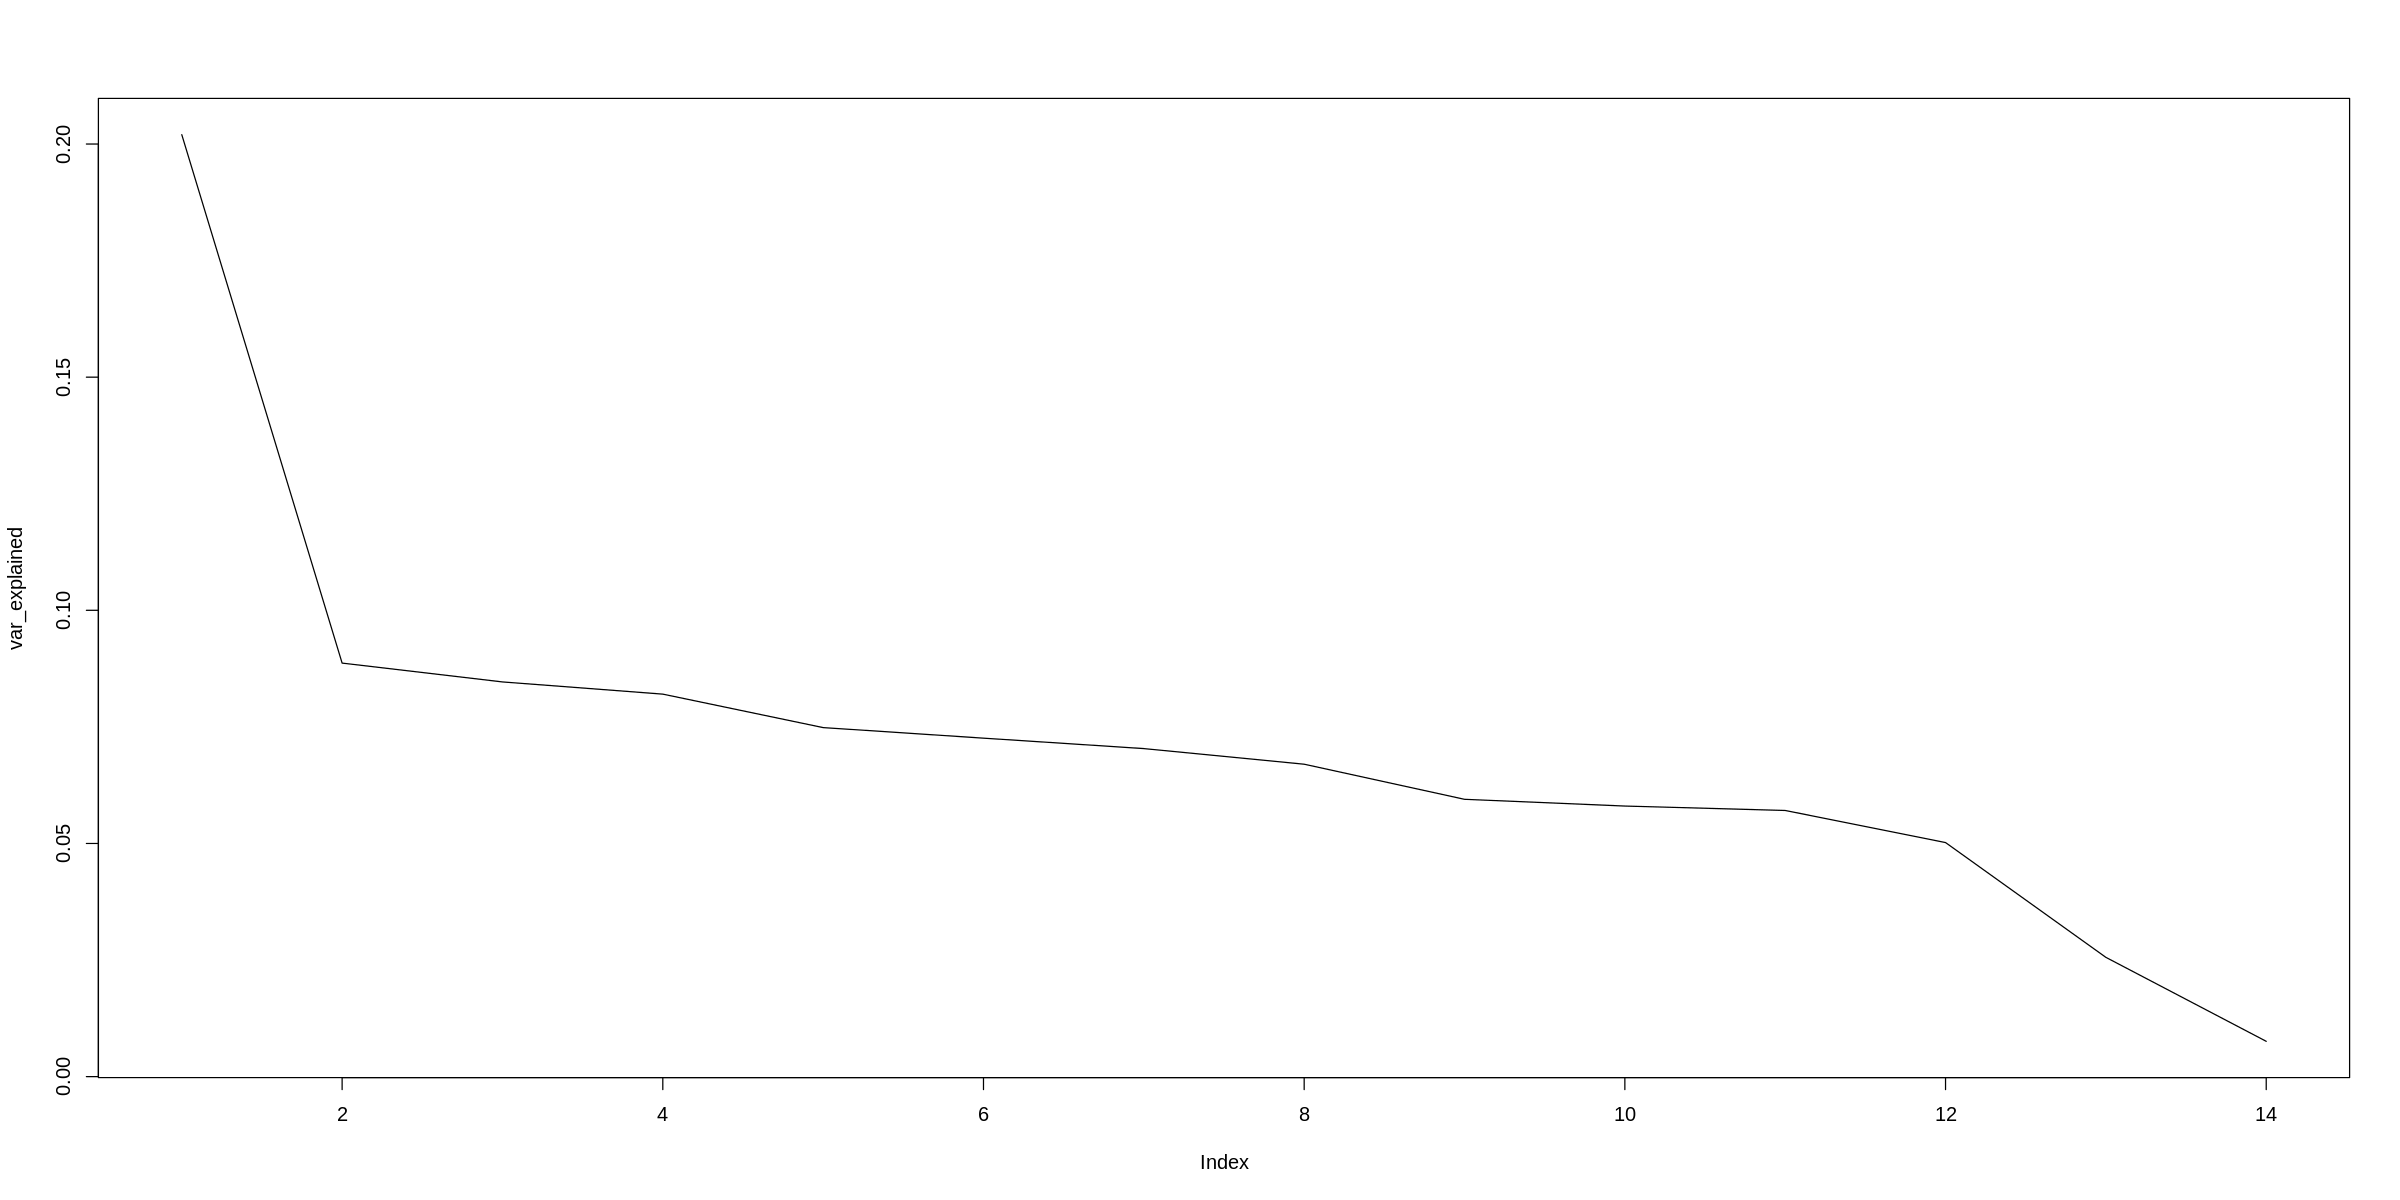

In [32]:

for( i in 2:ncol(train_data_big)){ 
print(i)
pca_out<-prcomp(train_data_big[,1:i],scale=TRUE)
#calculate total variance explained by each principal component
var_explained = pca_out$sdev^2 / sum(pca_out$sdev^2)
#create scree plot
plot(var_explained,type='l')
    }

pca_out$x[, 1]
[1] "1" "2" "M" "F"
umap_out[, 1]
[1] "1" "2" "M" "F"


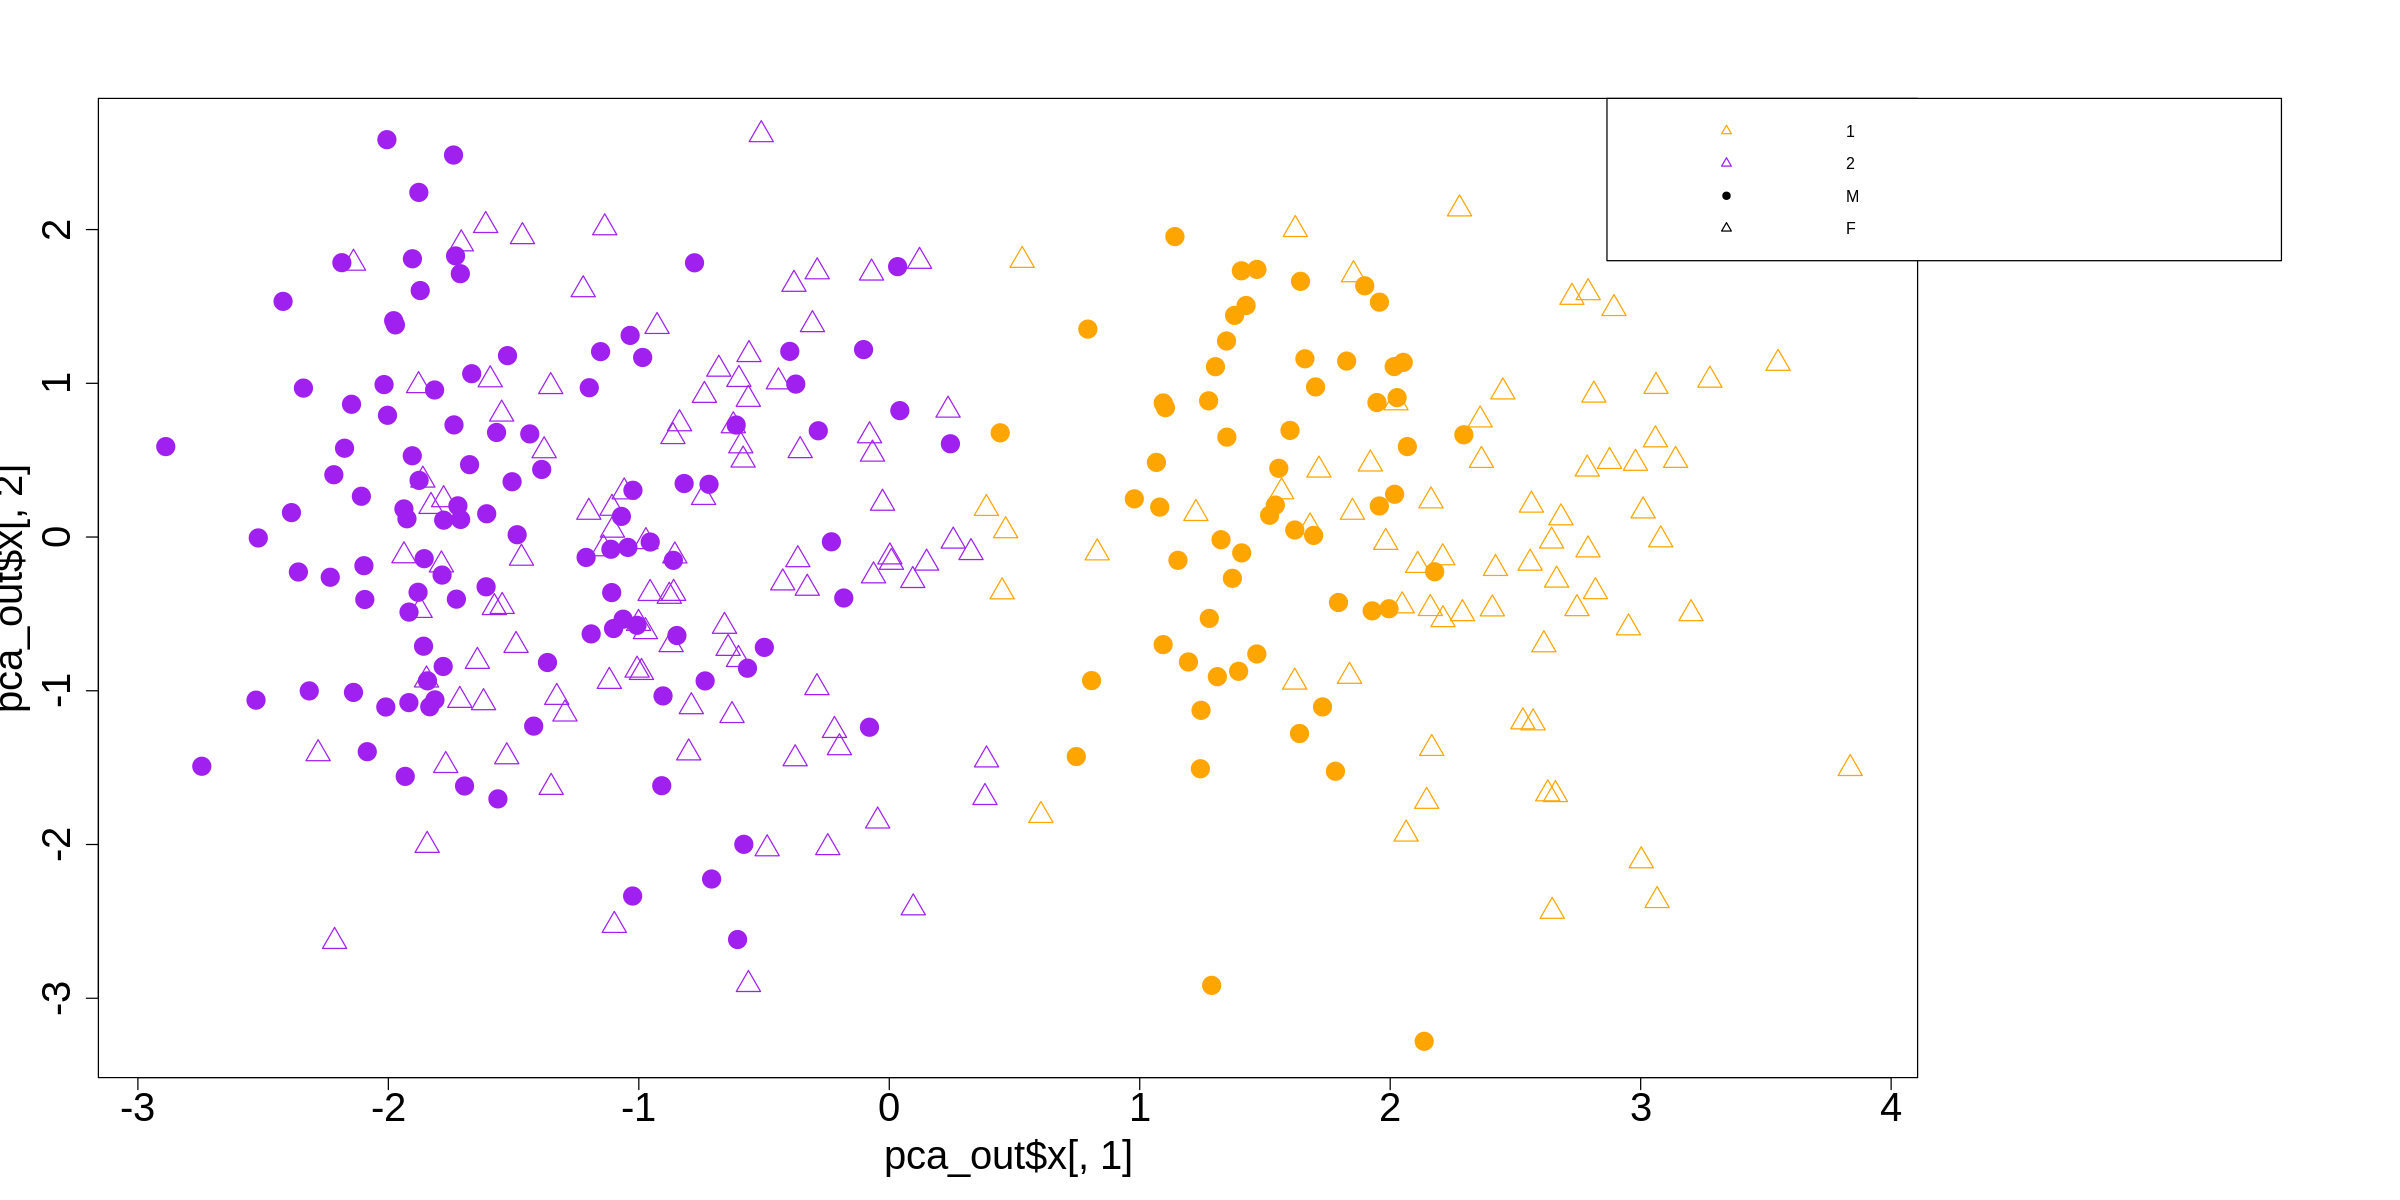

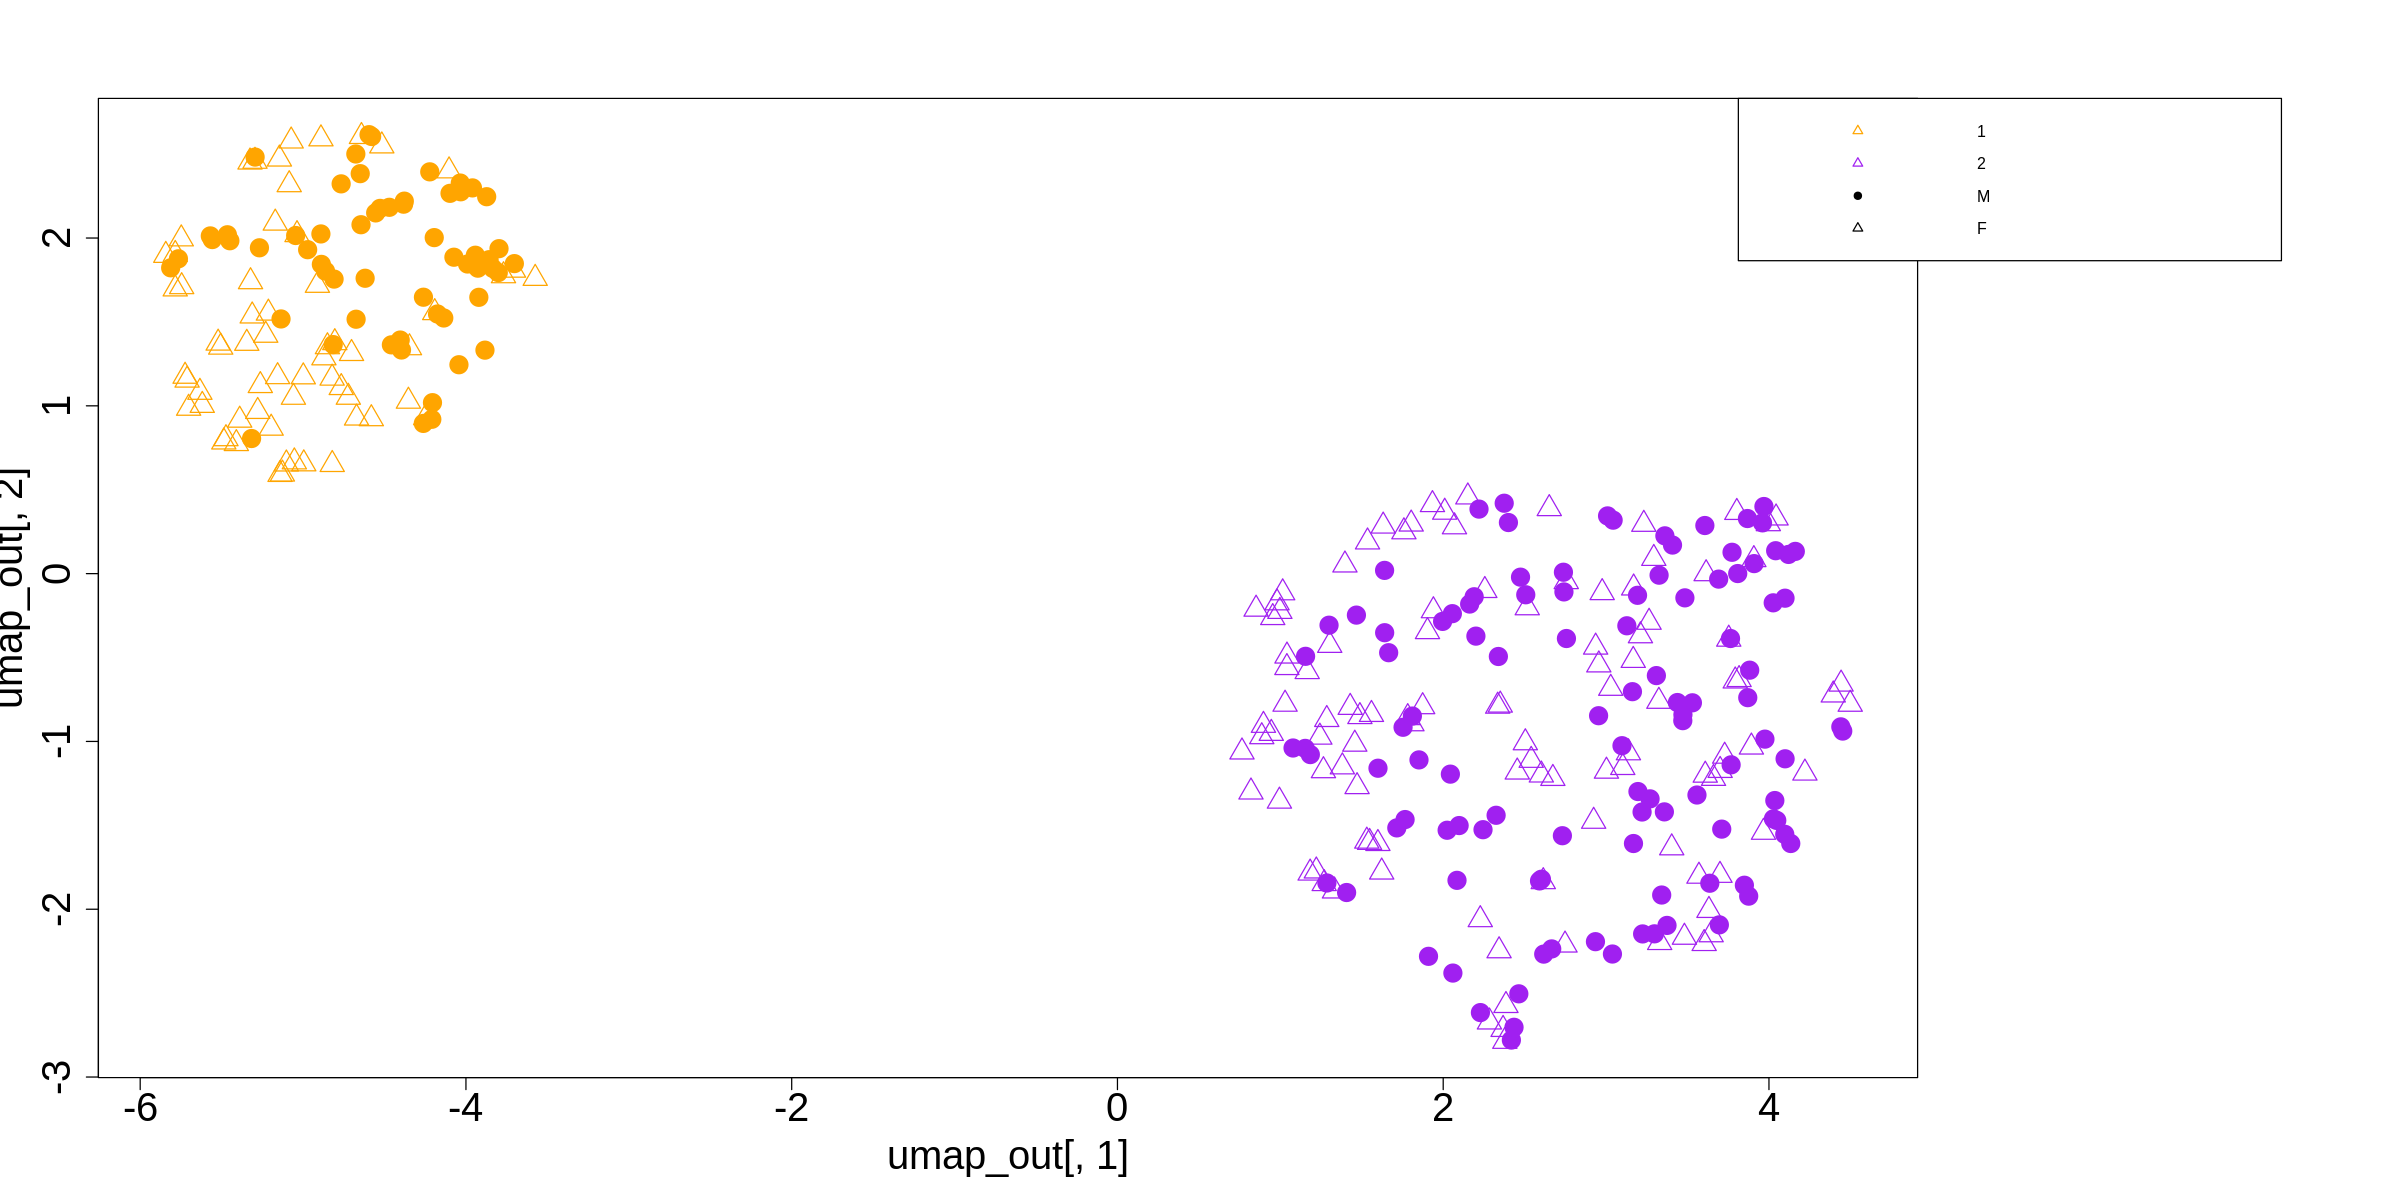

In [33]:
pca_cl<-kmeans(pca_out$x[,1:2],2)
plot_penguins(pca_out$x[,1],pca_out$x[,2],z=pca_cl$cluster)

umap_cl<-kmeans(umap_out,2)
plot_penguins(umap_out[,1],umap_out[,2],z=umap_cl$cluster)


umap_out<-umap(scale(train_data_big),n_components = 2,n_neighbors = 4)
gap_stat_umap <- clusGap(umap_out, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 500)
plot(gap_stat_umap)
umap_cl<-kmeans(umap_out,6)
plot_penguins(umap_out[,1],umap_out[,2],z=umap_cl$cluster)

# Conclusions

* Lots of options when doing unsupervised learning. No **true** answer, but some are more useful than others
* **Suggestion** - make sure your conclusions aren't very sensitive to your parameters
* No free lunch lots of irrelevant features makes life more difficult and can potentially wash out signal


# Bonus - Causal Correlation Analysis

* Makes a graph of whether variables are correlated or not
* Makes **Conditional** Independence checks to check for causality and to simplify the graph
* **Warning** Conditional Independence tests can be a little tricky with lots of assumptions. Check your data types
* **Warning** MRPC has a mechanism for dealing with global false discovery, but many other packages do not

In [34]:
library('MRPC')
# Calculate Pearson correlation
suffStat_C <- list(C = cor(scale(train_data_big)) ,n=nrow(train_data_big))
# Infer the graph by MRPC
addis <- MRPC(data = train_data_big,
    suffStat = suffStat_C,
    GV=0,
    FDR = 0.05,
    indepTest = 'gaussCItest',
    labels = colnames(train_data_big),
    FDRcontrol = 'LOND',
    verbose = FALSE)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Registered S3 methods overwritten by 'sna':
  method   from   
  plot.bn  bnlearn
  print.bn bnlearn



Using the LOND method for online FDR control at FDR =  0.05 


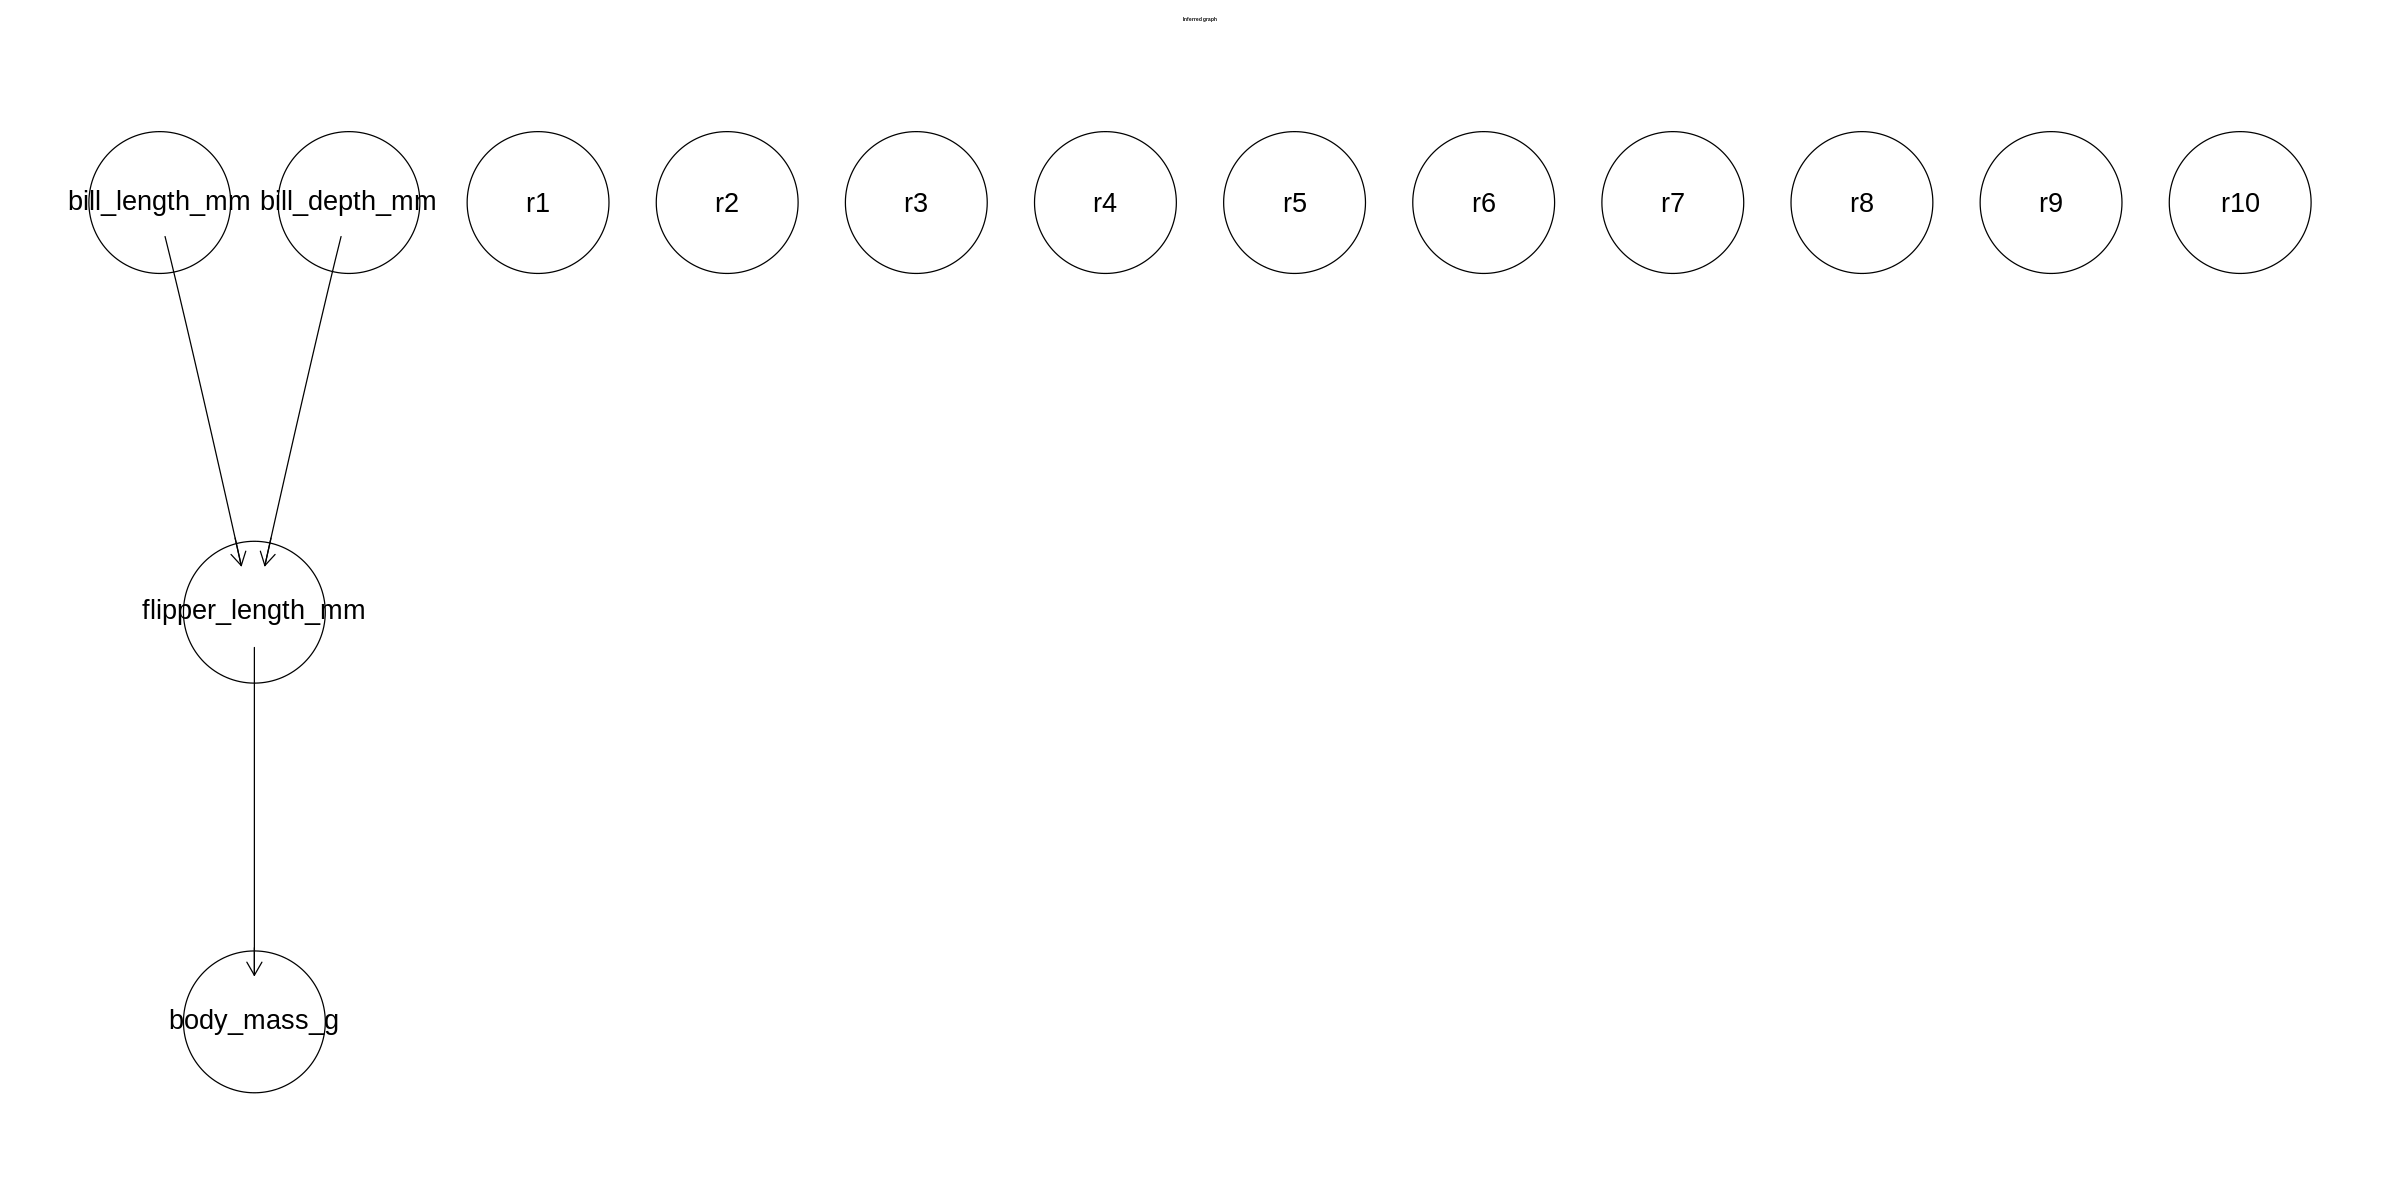

In [35]:
par(cex=0.2)
options(repr.plot.width=20,repr.plot.height=10,repr.plot.cex=1.5)

plot(addis,
main = 'Inferred graph')


# How do I read this?

* r1-r10 are uncorrelated, a sign they might not be relevant and maybe could be dropped
* There is a V structure with "Bill Length" and "Bill Depth"
    * Meaning: "Bill Length","Bill Depth" are un-correlated, however "Bill Length| Flipper Length" and "Bill Depth| Flipper Length" are correlated
    * An example: z=x+y and x+y are normal random variables,  x is independent of y but  x=z-y so  y is not independent of x|z
* Flipper Length 'blocks','Body Mass'
    * Meaning: Body mass is correlated with everything linked above, but Flipper Length is good enough by itself to predict Body Mass and adding anything else provides no additional information

* This method can get expensive with more variables or fewer assumptions but is a powerful way of summarizing relationships in a dataset. Arrows map directly to causality tests, but these tests also make some assumptions about confounders. 
